In [1]:
#Setup environment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

pd.set_option('display.max_columns', 600)

import warnings
warnings.filterwarnings('ignore')

# Outline of this notebook

1.Read dataset

2.Merge dataset

3.Data Preprocessing

4.Predict Herd Immunity

    A)Traditional Mathematics
    
    B)ARIMA
    
    C)LSTM
    
5.Feature Selection

    A)Boruta
    
    B)RFE
    
6.Regression and Classification(Different Features, SMOTE and without SMOTE)

    A)Daily cases
    
    B)Admitted cases
    
    C)ICU cases
    
7.Clustering

    A)cases_new vs hospital admitted in each state
    
    B)cases_new vs death_new in each state

# Read Dataset

### **Cases and Testing**

In [2]:
#cases_malaysia
#cases_mysia_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv'
cases_mysia_url = 'Project dataset/Original/cases_malaysia.csv'
df_cases_mysia = pd.read_csv(cases_mysia_url)
df_cases_mysia.drop('Unnamed: 0',axis=1,inplace=True)
df_cases_mysia.head(5)

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-01-25,4,4,0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-28,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-29,3,3,0,7,0.0,0.0,0.0,1.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#test_malaysia
#test_mysia_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_malaysia.csv'
test_mysia_url = 'Project dataset/Original/tests_malaysia.csv'
df_test_mysia = pd.read_csv(test_mysia_url)
df_test_mysia.drop('Unnamed: 0',axis=1,inplace=True)
df_test_mysia.tail(5)

,date,rtk-ag,pcr
636,2021-10-21,104199,32533
637,2021-10-22,95869,27971
638,2021-10-23,69350,26648
639,2021-10-24,70615,19683
640,2021-10-25,130924,27173


In [4]:
#cases_state
#cases_state_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv'
cases_state_url = 'Project dataset/Original/cases_state.csv'
df_cases_state = pd.read_csv(cases_state_url)
df_cases_state.drop('Unnamed: 0',axis=1,inplace=True)
df_cases_state.tail(5)

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly
10251,2021-10-26,Selangor,929,6,1237,14342,15.0,35.0,631.0,149.0,53.0,618.0,65.0
10252,2021-10-26,Terengganu,292,0,112,3650,0.0,17.0,206.0,44.0,11.0,195.0,42.0
10253,2021-10-26,W.P. Kuala Lumpur,339,4,229,3576,11.0,27.0,232.0,55.0,25.0,238.0,20.0
10254,2021-10-26,W.P. Labuan,3,0,0,46,0.0,0.0,2.0,1.0,0.0,2.0,0.0
10255,2021-10-26,W.P. Putrajaya,37,0,32,415,1.0,2.0,18.0,16.0,2.0,19.0,0.0


In [5]:
#test_state
#test_state_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_state.csv'
test_state_url = 'Project dataset/Original/tests_state.csv'
df_test_state = pd.read_csv(test_state_url)
df_test_state.drop('Unnamed: 0',axis=1,inplace=True)
df_test_state.head(5)

,date,state,rtk-ag,pcr
0,2021-07-01,Johor,2749,3670
1,2021-07-01,Kedah,2073,1297
2,2021-07-01,Kelantan,1348,1966
3,2021-07-01,Melaka,1049,2132
4,2021-07-01,Negeri Sembilan,2151,3306


In [6]:
#clusters
#clusters_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/clusters.csv'
clusters_url = 'Project dataset/Original/clusters.csv'
df_clusters = pd.read_csv(clusters_url)
df_clusters.drop('Unnamed: 0',axis=1,inplace=True)
df_clusters.head(5)

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
0,Kluster Warga Jepun,WP Kuala Lumpur,Lembah Pantai,2020-03-01,2020-03-09,import,ended,0,3,0,267,0,0,3
1,Kluster UDA,"WP Kuala Lumpur, WP Putrajaya, Selangor, Neger...",Pelbagai,2020-03-04,2020-03-01,import,ended,0,144,0,1864,0,2,142
2,Kluster Keagamaan (Tabligh Sri Petaling),Semua Negeri,Pelbagai,2020-03-13,2020-03-11,religious,ended,0,2022,0,42023,0,34,1988
3,Kluster Tabligh New Delhi,"Selangor, Negeri Sembilan, WP Kuala Lumpur & W...",Pelbagai,2020-03-16,2020-03-20,import,ended,0,24,0,57,0,0,24
4,Kluster AIROD,Pahang,Kuantan,2020-03-31,2020-03-31,workplace,ended,0,65,0,734,0,0,65


### **Health Care**

In [7]:
#pkrc_data
#pkrc_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/pkrc.csv'
pkrc_url = 'Project dataset/Original/pkrc.csv'
df_pkrc = pd.read_csv(pkrc_url)
df_pkrc.drop('Unnamed: 0',axis=1,inplace=True)
df_pkrc.tail(5)

,date,state,beds,admitted_pui,admitted_covid,admitted_total,discharge_pui,discharge_covid,discharge_total,pkrc_covid,pkrc_pui,pkrc_noncovid
6808,2021-10-26,Sabah,3202,13,114,127,4,143,147,984,65,50
6809,2021-10-26,Sarawak,6742,107,127,234,81,252,333,1634,582,11
6810,2021-10-26,Selangor,3156,4,226,230,0,179,179,1488,12,0
6811,2021-10-26,Terengganu,1832,14,109,123,12,83,95,870,53,0
6812,2021-10-26,W.P. Labuan,251,0,0,0,0,1,1,12,10,0


In [8]:
#hospital data
#hosp_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/hospital.csv'
hosp_url = 'Project dataset/Original/hospital.csv'
df_hosp = pd.read_csv(hosp_url)
df_hosp.drop('Unnamed: 0',axis=1,inplace=True)
df_hosp.head(5)

,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
0,2020-03-24,Johor,1440,434,1408,0,0,0,0,0,0,18,9,1
1,2020-03-24,Kedah,1218,143,1183,0,0,0,0,0,0,46,5,12
2,2020-03-24,Kelantan,1463,280,1424,9,6,15,1,0,1,78,58,23
3,2020-03-24,Melaka,1091,82,1065,0,0,0,0,0,0,19,10,12
4,2020-03-24,Negeri Sembilan,1223,253,1205,0,0,0,0,0,0,90,13,8


In [9]:
#icu data
#icu_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/icu.csv'
icu_url = 'Project dataset/Original/icu.csv'
df_icu = pd.read_csv(icu_url)
df_icu.drop('Unnamed: 0',axis=1,inplace=True)
df_icu.tail(5)

,date,state,beds_icu,beds_icu_rep,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid,vent_used,vent_port_used
8914,2021-10-26,Selangor,156,89,245,158,480,17,90,0,76,54,0,42,135,5
8915,2021-10-26,Terengganu,27,30,57,37,66,40,16,0,21,17,0,19,32,17
8916,2021-10-26,W.P. Kuala Lumpur,79,41,120,47,213,28,17,0,67,10,0,19,69,0
8917,2021-10-26,W.P. Labuan,5,7,12,7,15,0,0,0,4,0,0,2,2,0
8918,2021-10-26,W.P. Putrajaya,14,6,20,6,37,0,0,0,11,0,0,9,9,0


### **Deaths**

In [10]:
#Death malaysia
#deathM_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_malaysia.csv'
deathM_url = 'Project dataset/Original/deaths_malaysia.csv'
df_deathM = pd.read_csv(deathM_url)
df_deathM.drop('Unnamed: 0',axis=1,inplace=True)
df_deathM.tail(5)

,date,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax,deaths_tat
584,2021-10-22,78,17,64,8,4,34,3
585,2021-10-23,42,10,52,5,7,23,3
586,2021-10-24,46,12,46,11,4,21,3
587,2021-10-25,92,11,32,5,1,17,3
588,2021-10-26,84,20,11,0,1,6,4


In [11]:
#Death State
#deathS_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_state.csv'
deathS_url = 'Project dataset/Original/deaths_state.csv'
df_deathS = pd.read_csv(deathS_url)
df_deathS.drop('Unnamed: 0',axis=1,inplace=True)
df_deathS.tail(5)

,date,state,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax,deaths_tat
9419,2021-10-26,Selangor,8,1,0,0,0,0,2
9420,2021-10-26,Terengganu,7,0,1,0,0,1,5
9421,2021-10-26,W.P. Kuala Lumpur,1,0,1,0,0,0,4
9422,2021-10-26,W.P. Labuan,0,0,0,0,0,0,0
9423,2021-10-26,W.P. Putrajaya,0,0,0,0,0,0,0


### **Vaccination**

In [12]:
#Vaccination Malaysia
#vax_msia_url = 'https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/vaccination/vax_malaysia.csv'
vax_msia_url = 'Project dataset/Original/vax_malaysia.csv'
df_vax_msia = pd.read_csv(vax_msia_url)
df_vax_msia.drop('Unnamed: 0',axis=1,inplace=True)
df_vax_msia.tail(5)

,date,daily_partial,daily_full,daily,daily_partial_child,daily_full_child,daily_booster,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,cumul_booster,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending
240,2021-10-22,25743,113989,157999,16638,89049,18267,25344167,23565799,48831214,2540794,1456265,84975,41791,102023,1862,2938,3,6693,1388,1301
241,2021-10-23,11015,94354,113547,6368,77509,8178,25355651,23660153,48944761,2547162,1533774,93153,17705,84499,1304,2698,4,6226,469,642
242,2021-10-24,9831,106261,124530,5306,89095,8438,25366352,23766414,49069291,2552468,1622869,101591,17051,95207,1031,1652,10,6345,870,2364
243,2021-10-25,21922,140054,184162,14454,116966,22186,25388929,23906468,49253453,2566922,1739835,123777,41992,128520,1703,2835,7,5788,655,2662
244,2021-10-26,22178,136290,181160,14358,111189,22692,25412086,24042758,49434613,2581280,1851024,146469,42455,122333,1687,4681,7,4427,979,4591


In [13]:
#Vaccination Register Malaysia
#vax_reg_msia_url = 'https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/registration/vaxreg_malaysia.csv'
vax_reg_msia_url = 'Project dataset/Original/vaxreg_malaysia.csv'
df_vax_reg_msia = pd.read_csv(vax_reg_msia_url)
df_vax_reg_msia.drop('Unnamed: 0',axis=1,inplace=True)
df_vax_reg_msia.head(5)

,date,state,total,phase2,mysj,call,web,children,elderly,comorb,oku
0,2021-06-24,Malaysia,16191488,5219793,14910368,10668,1270452,776980,2787690,3938517,298917
1,2021-06-25,Malaysia,16321185,5253580,15031571,10779,1278835,797921,2802744,3964444,301849
2,2021-06-26,Malaysia,16431724,5282795,15136062,10892,1284770,815984,2815665,3986607,304571
3,2021-06-27,Malaysia,16515196,5304420,15231554,10808,1272834,830643,2824735,4003420,306740
4,2021-06-28,Malaysia,16630764,5333905,15335726,10933,1284105,842985,2835474,4027560,309623


In [14]:
#Vaccination State
#vax_state_url = 'https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/vaccination/vax_state.csv'
vax_state_url = 'Project dataset/Original/vax_state.csv'
df_vax_state = pd.read_csv(vax_state_url)
df_vax_state.drop('Unnamed: 0',axis=1,inplace=True)
df_vax_state.tail(5)

,date,state,daily_partial,daily_full,daily,daily_partial_child,daily_full_child,daily_booster,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,cumul_booster,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending
3915,2021-10-26,Selangor,10703,22210,34412,8625,19844,1499,4696246,4333464,9027662,462983,188036,5889,11532,20989,488,856,1,84,36,426
3916,2021-10-26,Terengganu,569,7858,9084,262,7047,657,875218,824296,1700820,120448,89019,5858,1174,7479,34,13,0,177,180,27
3917,2021-10-26,W.P. Kuala Lumpur,1517,8557,12776,1041,6257,2702,3014163,2907370,5933013,147316,97777,12048,4058,6323,131,1979,0,10,53,222
3918,2021-10-26,W.P. Labuan,50,64,245,7,17,131,81719,76182,159224,8137,6720,1323,156,64,0,0,0,0,0,25
3919,2021-10-26,W.P. Putrajaya,189,1026,1530,97,921,315,146871,136792,284348,13889,8102,685,504,1005,0,16,0,0,0,5


In [15]:
#Vaccination State Registration
#vax_reg_state_url = 'https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/registration/vaxreg_state.csv'
vax_reg_state_url = 'Project dataset/Original/vaxreg_state.csv'
df_vax_reg_state = pd.read_csv(vax_reg_state_url)
df_vax_reg_state.drop('Unnamed: 0',axis=1,inplace=True)
df_vax_reg_state.head()

,date,state,total,phase2,mysj,call,web,children,elderly,comorb,oku
0,2021-06-24,Johor,2024149,657731,1880609,1167,142373,94096,373226,477510,39807
1,2021-06-24,Kedah,938187,340264,850376,855,86956,39636,181729,264154,20150
2,2021-06-24,Kelantan,621203,223260,527284,426,93493,26305,119608,173570,12921
3,2021-06-24,Melaka,510641,179964,484164,436,26041,25638,98045,138618,13547
4,2021-06-24,Negeri Sembilan,633026,229995,591847,592,40587,32396,125029,179280,13902


### **Mobility and Contact Tracing**

In [16]:
#Checkin malaysia
#checkinM_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/mysejahtera/checkin_malaysia.csv'
checkinM_url = 'Project dataset/Original/checkin_malaysia.csv'
df_checkinM = pd.read_csv(checkinM_url)
df_checkinM.drop('Unnamed: 0',axis=1,inplace=True)
df_checkinM.head(5)

,date,checkins,unique_ind,unique_loc
0,2020-12-01,17492265,6614474,630363
1,2020-12-02,17695726,6667261,648752
2,2020-12-03,17063123,6549583,645604
3,2020-12-04,18350879,6803979,622383
4,2020-12-05,19711082,6845366,573132


In [17]:
# Checkin Malaysia Time
# 0 = 0000-0030, 1 = 0030-0100
#checkinMT_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/mysejahtera/checkin_malaysia_time.csv'
checkinMT_url = 'Project dataset/Original/checkin_malaysia_time.csv'
df_checkinMT = pd.read_csv(checkinMT_url)
df_checkinMT.drop('Unnamed: 0',axis=1,inplace=True)
df_checkinMT.head(5)

,date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,2020-12-01,6395,4052,2611,2005,1660,1574,1371,1421,1736,3316,7961,25196,52503,130025,260459,487275,589956,622652,607775,601831,622364,615467,627128,669364,801754,831169,848726,696972,649743,613763,587982,549878,528499,497217,541013,591255,630124,602570,533079,499436,484926,400220,287114,165690,95964,58921,34247,15906
1,2020-12-02,6615,3957,2682,1974,1721,1581,1438,1480,1867,3378,8253,26497,56792,139687,277312,508220,612710,645687,613719,601815,619992,617798,631502,674280,811867,837592,851573,696530,652126,618349,595056,556019,527820,502556,550235,596717,639260,611787,539724,503532,483593,397703,287540,165463,96497,60809,35813,16608
2,2020-12-03,6920,3943,2936,2150,1755,1490,1499,1590,1842,3500,8169,25687,55644,135933,268926,487973,584597,610616,589348,586045,608647,604825,617892,659293,792076,818396,836594,682480,636611,594575,568155,538281,507600,475773,515214,556486,589587,570865,521526,492463,468638,381225,275301,159941,95561,61119,36086,17350
3,2020-12-04,7404,4759,3064,2223,1791,1699,1543,1614,2115,3511,8441,27177,57741,136834,269189,483225,586855,625518,608907,608809,635336,631601,644903,683592,825833,923503,884577,689087,647664,620169,607824,582090,555542,522614,559748,603054,645704,636042,587843,562922,552979,464684,347722,211850,128239,81293,48715,23330
4,2020-12-05,9520,5907,3871,2662,2181,1769,1727,1718,2237,3696,8345,25391,53247,121701,223646,373478,470743,537549,589369,627339,695612,710804,743547,780108,852867,843240,845548,792314,771881,749059,731588,706541,692332,659717,681027,704550,726066,699774,638364,607971,597757,501530,375434,229508,138917,89817,53057,26056


In [18]:
#Checkin State
#checkinS_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/mysejahtera/checkin_state.csv'
checkinS_url = 'Project dataset/Original/checkin_state.csv'
df_checkinS = pd.read_csv(checkinS_url)
df_checkinS.drop('Unnamed: 0',axis=1,inplace=True)
df_checkinS.head(5)

,date,state,checkins,unique_ind,unique_loc
0,2020-12-01,Johor,1996696,868521,81635
1,2020-12-01,Kedah,654634,341620,32760
2,2020-12-01,Kelantan,186507,108035,16298
3,2020-12-01,Melaka,544619,241854,21458
4,2020-12-01,Negeri Sembilan,559390,266899,22749


In [19]:
#Tracing Malaysia
#trace_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/mysejahtera/trace_malaysia.csv'
trace_url = 'Project dataset/Original/trace_malaysia.csv'
df_trace = pd.read_csv(trace_url)
df_trace.drop('Unnamed: 0',axis=1,inplace=True)
df_trace.tail(5)

,date,casual_contacts,hide_large,hide_small
232,2021-10-22,29488,29.0,678.0
233,2021-10-23,26803,31.0,567.0
234,2021-10-24,28628,38.0,553.0
235,2021-10-25,32267,42.0,713.0
236,2021-10-26,29291,33.0,642.0


### **Static data**

In [20]:
#static_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/static/population.csv'
static_url = 'Project dataset/Original/population.csv'
df_static = pd.read_csv(static_url)
df_static.drop('Unnamed: 0',axis=1,inplace=True)
df_static

,state,idxs,pop,pop_18,pop_60,pop_12
0,Malaysia,0,32657400,23409600,3502000,3147500
1,Johor,1,3781000,2711900,428700,359900
2,Kedah,2,2185100,1540600,272500,211400
3,Kelantan,3,1906700,1236200,194100,210600
4,Melaka,4,932700,677400,118500,86500
5,Negeri Sembilan,5,1128800,814400,145000,109400
6,Pahang,6,1678700,1175800,190200,173000
7,Pulau Pinang,7,1773600,1367200,239200,141500
8,Perak,8,2510300,1862700,397300,237200
9,Perlis,9,254900,181200,35100,23100


# Merge Related Dataset

In [21]:
#Merged Malaysia cases, test and death
msia_cases = df_cases_mysia.merge(df_test_mysia,left_on=['date'],right_on=['date'],how='left')
msia_cases = msia_cases.merge(df_deathM,left_on=['date'],right_on=['date'],how='left')
msia_cases.tail()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace,rtk-ag,pcr,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax,deaths_tat
636,2021-10-22,6630,15,7630,80512,250.0,457.0,4379.0,1200.0,290.0,4257.0,826.0,0.0,9.0,100.0,4.0,31.0,0.0,106.0,95869.0,27971.0,78.0,17.0,64.0,8.0,4.0,34.0,3.0
637,2021-10-23,5828,7,9178,77123,256.0,397.0,3802.0,1069.0,277.0,3717.0,715.0,0.0,6.0,68.0,12.0,8.0,0.0,162.0,69350.0,26648.0,42.0,10.0,52.0,5.0,7.0,23.0,3.0
638,2021-10-24,5666,20,6978,75779,148.0,355.0,3698.0,1112.0,280.0,3560.0,689.0,0.0,7.0,37.0,10.0,3.0,0.0,91.0,70615.0,19683.0,46.0,12.0,46.0,11.0,4.0,21.0,3.0
639,2021-10-25,4782,15,7414,73139,109.0,262.0,3180.0,962.0,209.0,2957.0,622.0,0.0,5.0,12.0,5.0,21.0,0.0,66.0,130924.0,27173.0,92.0,11.0,32.0,5.0,1.0,17.0,3.0
640,2021-10-26,5726,15,5607,73258,210.0,321.0,3915.0,1030.0,255.0,3645.0,726.0,0.0,0.0,15.0,1.0,25.0,0.0,169.0,NaN,NaN,84.0,20.0,11.0,0.0,1.0,6.0,4.0


In [22]:
#Merged State cases, test and death
state_cases = df_cases_state.merge(df_test_state,left_on=['date','state'],right_on=['date','state'],how='left')
state_cases = state_cases.merge(df_deathS,left_on=['date','state'],right_on=['date','state'],how='left')
state_cases.tail()

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly,rtk-ag,pcr,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax,deaths_tat
10251,2021-10-26,Selangor,929,6,1237,14342,15.0,35.0,631.0,149.0,53.0,618.0,65.0,NaN,NaN,8.0,1.0,0.0,0.0,0.0,0.0,2.0
10252,2021-10-26,Terengganu,292,0,112,3650,0.0,17.0,206.0,44.0,11.0,195.0,42.0,NaN,NaN,7.0,0.0,1.0,0.0,0.0,1.0,5.0
10253,2021-10-26,W.P. Kuala Lumpur,339,4,229,3576,11.0,27.0,232.0,55.0,25.0,238.0,20.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,4.0
10254,2021-10-26,W.P. Labuan,3,0,0,46,0.0,0.0,2.0,1.0,0.0,2.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10255,2021-10-26,W.P. Putrajaya,37,0,32,415,1.0,2.0,18.0,16.0,2.0,19.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Merged Malaysia Vaccination and Registration
vax_msia = df_vax_msia.merge(df_vax_reg_msia,left_on=['date'],right_on=['date'],how='left')
vax_msia.tail()

,date,daily_partial,daily_full,daily,daily_partial_child,daily_full_child,daily_booster,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,cumul_booster,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending,state,total,phase2,mysj,call,web,children,elderly,comorb,oku
240,2021-10-22,25743,113989,157999,16638,89049,18267,25344167,23565799,48831214,2540794,1456265,84975,41791,102023,1862,2938,3,6693,1388,1301,Malaysia,25161659.0,6829926.0,24007857.0,11071.0,1142731.0,2849834.0,3360306.0,5036097.0,604105.0
241,2021-10-23,11015,94354,113547,6368,77509,8178,25355651,23660153,48944761,2547162,1533774,93153,17705,84499,1304,2698,4,6226,469,642,Malaysia,25172551.0,6831196.0,24019372.0,11062.0,1142117.0,2853889.0,3361073.0,5036288.0,604481.0
242,2021-10-24,9831,106261,124530,5306,89095,8438,25366352,23766414,49069291,2552468,1622869,101591,17051,95207,1031,1652,10,6345,870,2364,Malaysia,25181972.0,6832239.0,24029273.0,11057.0,1141642.0,2857657.0,3361716.0,5036508.0,604770.0
243,2021-10-25,21922,140054,184162,14454,116966,22186,25388929,23906468,49253453,2566922,1739835,123777,41992,128520,1703,2835,7,5788,655,2662,Malaysia,25194076.0,6833704.0,24041978.0,11046.0,1141052.0,2862284.0,3362497.0,5037080.0,605111.0
244,2021-10-26,22178,136290,181160,14358,111189,22692,25412086,24042758,49434613,2581280,1851024,146469,42455,122333,1687,4681,7,4427,979,4591,Malaysia,25204546.0,6835280.0,24052851.0,11050.0,1140645.0,2866349.0,3363172.0,5038020.0,605426.0


In [24]:
#Merged State Vaccination and Registration
vax_state = df_vax_state.merge(df_vax_reg_state,left_on=['date','state'],right_on=['date','state'],how='left')
vax_state.tail()

,date,state,daily_partial,daily_full,daily,daily_partial_child,daily_full_child,daily_booster,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,cumul_booster,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending,total,phase2,mysj,call,web,children,elderly,comorb,oku
3915,2021-10-26,Selangor,10703,22210,34412,8625,19844,1499,4696246,4333464,9027662,462983,188036,5889,11532,20989,488,856,1,84,36,426,5789850.0,1390356.0,5689697.0,2336.0,97817.0,606751.0,619509.0,1037690.0,136597.0
3916,2021-10-26,Terengganu,569,7858,9084,262,7047,657,875218,824296,1700820,120448,89019,5858,1174,7479,34,13,0,177,180,27,847155.0,226652.0,790149.0,324.0,56682.0,129171.0,101165.0,176113.0,21094.0
3917,2021-10-26,W.P. Kuala Lumpur,1517,8557,12776,1041,6257,2702,3014163,2907370,5933013,147316,97777,12048,4058,6323,131,1979,0,10,53,222,2151883.0,525664.0,2114759.0,1126.0,35998.0,172869.0,259370.0,372779.0,51418.0
3918,2021-10-26,W.P. Labuan,50,64,245,7,17,131,81719,76182,159224,8137,6720,1323,156,64,0,0,0,0,0,25,73631.0,18600.0,68689.0,15.0,4927.0,9126.0,6765.0,14668.0,1402.0
3919,2021-10-26,W.P. Putrajaya,189,1026,1530,97,921,315,146871,136792,284348,13889,8102,685,504,1005,0,16,0,0,0,5,104084.0,24320.0,102673.0,36.0,1375.0,15052.0,5201.0,21322.0,2041.0


# Data Pre-processing

In [25]:
#Get the shape of the dataset
print("=======================================================")
print("Size of Malaysia cases is {}".format(msia_cases.shape))
print("Size of Malaysia Vaccination is {}".format(vax_msia.shape))
print("Size of State cases is {}".format(state_cases.shape))
print("Size of State Vaccination is {}".format(vax_state.shape))
print("=======================================================")
print("Size of Clusters is {}".format(df_clusters.shape))
print("=======================================================")
print("Size of Hospital data is {}".format(df_hosp.shape))
print("Size of ICU data is {}".format(df_icu.shape))
print("Size of PKRC data is {}".format(df_pkrc.shape))
print("=======================================================")
print("Size of Checkin Malaysia is {}".format(df_checkinM.shape))
print("Size of Checkin Malaysia Time is {}".format(df_checkinMT.shape))
print("Size of Checkin State is {}".format(df_checkinS.shape))
print("Size of Trace Malaysia is {}".format(df_trace.shape))
print("Size of Population Malaysia is {}".format(df_static.shape))
print("=======================================================")

Size of Malaysia cases is (641, 28)
Size of Malaysia Vaccination is (245, 31)
Size of State cases is (10256, 22)
Size of State Vaccination is (3920, 31)
Size of Clusters is (5735, 14)
Size of Hospital data is (8899, 14)
Size of ICU data is (8919, 16)
Size of PKRC data is (6813, 12)
Size of Checkin Malaysia is (330, 4)
Size of Checkin Malaysia Time is (330, 49)
Size of Checkin State is (5280, 5)
Size of Trace Malaysia is (237, 4)
Size of Population Malaysia is (17, 6)


In [26]:
#Fill NaN value to 0 for msia_cases,state_cases,vax_msia,vac_state
msia_cases.fillna(0,inplace=True)
vax_msia.fillna(0,inplace=True)
state_cases.fillna(0,inplace=True)
vax_state.fillna(0,inplace=True)

In [27]:
#set a column with only year and month
msia_cases["year_month"] = pd.to_datetime(msia_cases["date"], format='%Y-%m-%d').apply(lambda x: x.strftime('%Y-%m'))
vax_msia["year_month"] = pd.to_datetime(vax_msia["date"], format='%Y-%m-%d').apply(lambda x: x.strftime('%Y-%m'))
state_cases["year_month"] = pd.to_datetime(state_cases["date"], format='%Y-%m-%d').apply(lambda x: x.strftime('%Y-%m'))
vax_state["year_month"] = pd.to_datetime(vax_state["date"], format='%Y-%m-%d').apply(lambda x: x.strftime('%Y-%m'))

#set a column with only year
msia_cases["year"] = pd.to_datetime(msia_cases["date"], format='%Y-%m-%d').apply(lambda x: x.strftime('%Y'))
vax_msia["year"] = pd.to_datetime(vax_msia["date"], format='%Y-%m-%d').apply(lambda x: x.strftime('%Y'))
state_cases["year"] = pd.to_datetime(state_cases["date"], format='%Y-%m-%d').apply(lambda x: x.strftime('%Y'))
vax_state["year"] = pd.to_datetime(vax_state["date"], format='%Y-%m-%d').apply(lambda x: x.strftime('%Y'))

#set a column with only month
msia_cases["month"] = pd.to_datetime(msia_cases["date"], format='%Y-%m-%d').apply(lambda x: x.strftime('%m'))
vax_msia["month"] = pd.to_datetime(vax_msia["date"], format='%Y-%m-%d').apply(lambda x: x.strftime('%m'))
state_cases["month"] = pd.to_datetime(state_cases["date"], format='%Y-%m-%d').apply(lambda x: x.strftime('%m'))
vax_state["month"] = pd.to_datetime(vax_state["date"], format='%Y-%m-%d').apply(lambda x: x.strftime('%m'))

# Predict herd Immunity

### 1. Basics Mathematics(Calculate using current rate)

In this method, we are grouping the vaccination data into weekly manner.After that, we calculate the change of vaccine per week
to obtain the weekly rate.From the weekly rate, we predict the total vaccine given for next week, so on until 30/11/2021. Since we are predicting in weekly manner, the data we use is until 26/10/2021, which is 5 weeks before 30/11/2021. 

For the weekly change rate, we take the average of 4 weeks.For example, to predict next week, we take the average of this week, last week, last 2 week and last 3 week; to predict next next week, we take last week, last 2 week, last 3 week and last 4 week.

For the algorithm, we use back the basics mathematics, which are:
i)  next_week = this_week * average_rate
ii) next_2week = next_week * average_rate
and so on...

In [36]:
import math
from datetime import *
from dateutil.relativedelta import *

df_vax_msia_short = df_vax_msia[['date','daily_full']]

vax_msia_trad_math = df_vax_msia_short.copy()
vax_msia_trad_math['date'] = pd.to_datetime(vax_msia_trad_math['date'],errors='coerce')

week_vacc_list = []

#Calculate the accumulate vaccine in past 12 weeks
for i in range(12):
    index = i*7
    end_day = vax_msia_trad_math['date'].iloc[-(index+1)]
    start_day = vax_msia_trad_math['date'].iloc[-(index+1)]+relativedelta(weeks=-1)
    df = vax_msia_trad_math.loc[vax_msia_trad_math['date'] > start_day]
    df = df[df['date'] <= end_day]
    acc = df['daily_full'].sum()
    week_vacc_list.append(acc)
    acc = 0
    index = index+1

print("Grouping vaccine into weekly manner for past 12 weeks:")
print("======================================================")
print(week_vacc_list)
print(" ")

#Calculate vaccine list in percentage
week_vacc_list_percentage = []

for i in range(11):
    pct = (week_vacc_list[i] - week_vacc_list[i+1])/week_vacc_list[i]
    week_vacc_list_percentage.append(pct)

print("Calculate percentage change in past 12 weeks(Weekly rate):")  
print("==========================================================")
print(week_vacc_list_percentage)
print(" ")

def predict_vaccine(a,r,n):
    total = 0
    new = a
    for i in range(0,n):
        new = math.floor(new+(new*r))
        print("Week {}:".format(i+1),new)
        total = total+new
    
    return total

a = week_vacc_list[0]
r = (week_vacc_list_percentage[0] + week_vacc_list_percentage[1]+week_vacc_list_percentage[2]+week_vacc_list_percentage[3])/ 4
n = 5

print("Predicted value for each week: ")
print("==========================================================")
predict5_week = predict_vaccine(a,r,n)
print("==========================================================")
print("Total vaccine for next 5 weeks: ", predict5_week)
print("==========================================================")

#
print("Forecasting number for next 5 weeks: ", predict5_week)

current_cum = df_vax_msia.iloc[-1]['cumul_full']
print("Current cummulative of fully vaccinated person: ", current_cum)

malaysia_pop = df_static.iloc[0]['pop']
print("Current Malaysia population: ", malaysia_pop)

total_percentage = 100*(predict5_week+current_cum)/malaysia_pop

print("Predicted percentage by 30/11/2021: ",total_percentage,"%")

if total_percentage > 80:
    print("Herd immunity is reached by 30 November 2021")
else:
    print("Herd immunity is not reached by 30 November 2021")

Grouping vaccine into weekly manner for past 12 weeks:
[989806, 960406, 794307, 915558, 1214327, 1206966, 1313227, 1388726, 1488554, 2223681, 2171802, 1810067]
 
Calculate percentage change in past 12 weeks(Weekly rate):
[0.029702790243744732, 0.17294664964608716, -0.152650045889058, -0.32632449282295606, 0.006061793899007434, -0.08803976251195146, -0.05749120296795603, -0.07188459062478847, -0.4938530950170434, 0.02333023486732135, 0.16655984293227466]
 
Predicted value for each week: 
Week 1: 921428
Week 2: 857774
Week 3: 798517
Week 4: 743354
Week 5: 692002
Total vaccine for next 5 weeks:  4013075
Forecasting number for next 5 weeks:  4013075
Current cummulative of fully vaccinated person:  24042758
Current Malaysia population:  32657400
Predicted percentage by 30/11/2021:  85.90957332794405 %
Herd immunity is reached by 30 November 2021


In [42]:
print("Forecasting number for next 5 weeks: ", predict5_week)

current_cum = df_vax_msia.iloc[-1]['cumul_full']
print("Current cummulative of fully vaccinated person: ", current_cum)

malaysia_pop = df_static.iloc[0]['pop']
print("Current Malaysia population: ", malaysia_pop)

total_percentage = 100*(predict5_week+current_cum)/malaysia_pop

print("Predicted percentage by 30/11/2021: ",total_percentage,"%")

if total_percentage > 80:
    print("Herd immunity is reached by 30 November 2021")
else:
    print("Herd immunity is not reached by 30 November 2021")

Forecasting number for next 5 weeks:  4013075
Current cummulative of fully vaccinated person:  24042758
Current Malaysia population:  32657400
Predicted percentage by 30/11/2021:  85.90957332794405 %
Herd immunity is reached by 30 November 2021


### 2. ARIMA

In [38]:
#ARIMA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

df_arima = df_vax_msia_short.copy()
df_arima['date'] = pd.to_datetime(df_arima['date'],errors='coerce')
df_arima.set_index('date',inplace=True)
df_arima.head()

# Fit auto_arima function to vacccine dataset
stepwise_fit = auto_arima(df_arima['daily_full'], start_p = 2, start_q = 2,
                          max_p = 5, max_q = 5, m = 12,
                          start_P = 1, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=5716.473, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5446.409, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=5599.906, Time=0.07 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5719.118, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=5477.873, Time=0.01 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5425.023, Time=0.27 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=5411.648, Time=0.41 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=5410.542, Time=0.17 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=5408.737, Time=0.12 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=5410.059, Time=0.26 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=5718.473, Time=0.06 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=5403.087, Time=0.12 sec
 ARIMA(2,0,0)(0,1,0)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  245
Model:             SARIMAX(2, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -2683.324
Date:                                 Sun, 31 Oct 2021   AIC                           5380.649
Time:                                         22:41:42   BIC                           5404.806
Sample:                                              0   HQIC                          5390.390
                                                 - 245                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4810      0.154      9.589      0.000       1.178       1.784
ar.L2         -0.4818      0.154     -3.132      0.002      -0.783      -0.180
ma.L1         -0.7157      0.121     -5.912      0.000      -0.953      -0.478
ar.S.L12       0.8412      1.995      0.422      0.673      -3.068       4.751
ma.S.L12      -1.7257      1.947     -0.886      0.375      -5.542       2.091
ma.S.L24       0.7514      1.689      0.445      0.656      -2.560       4.063
sigma2      6.209e+08   2.08e-08   2.99e+16      0.000    6.21e+08    6.21e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):                28.95
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):              22.24   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.47e+32. Standard errors may be unstable.
"""

In [39]:
train = df_arima.iloc[:len(df_arima)-25]
test = df_arima.iloc[len(df_arima)-25:]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

model = SARIMAX(train['daily_full'],order=(2,0,1),seasonal_order=(0,1,[1],12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         daily_full   No. Observations:                  220
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -2398.406
Date:                            Sun, 31 Oct 2021   AIC                           4806.812
Time:                                    22:41:49   BIC                           4823.500
Sample:                                02-24-2021   HQIC                          4813.560
                                     - 10-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2690      0.254      5.001      0.000       0.772       1.766
ar.L2         -0.2763      0.250     -1.104      0.270      -0.767       0.214
ma.L1         -0.5785      0.223     -2.592      0.010      -1.016      -0.141
ma.S.L12      -0.8735      0.106     -8.222      0.000      -1.082      -0.665
sigma2      8.859e+08    3.1e-10   2.85e+18      0.000    8.86e+08    8.86e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                18.03
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              31.20   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.77e+34. Standard errors may be unstable.
"""

Test RMSE: 37344.487


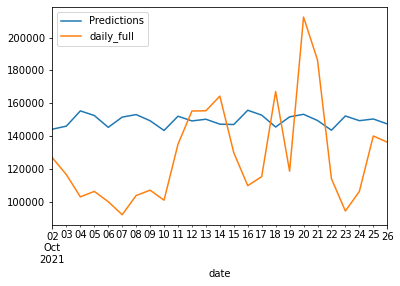

In [40]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

start = len(train)
end = len(train)+len(test)-1

predictions=result.predict(start,end,typ='levels').rename("Predictions")

predictions.plot(legend=True)
test['daily_full'].plot(legend=True)

# Calculate root mean squared error
rmse(test["daily_full"], predictions)

print('Test RMSE: %.3f' %rmse(test["daily_full"], predictions))

Forecasting number for next 5 weeks:  4980740
Current cummulative of fully vaccinated person:  24042758
Current Malaysia population:  32657400
Predicted percentage by 30/11/2021:  88.87265414380927 %
Herd immunity is reached by 30 November 2021


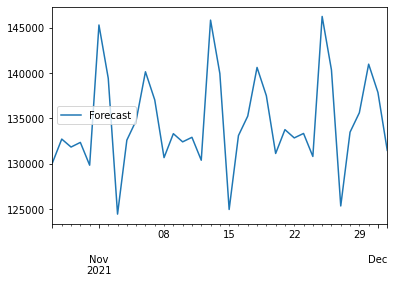

In [41]:
# Train the model on the full dataset
model = SARIMAX(df_arima['daily_full'], order = (2,0,0),seasonal_order=(0,1,[1],12))
result = model.fit()

# Forecast for the next 1 month
forecast_arima2 = result.predict(start = len(df_arima), 
                          end = (len(df_arima)-1) + 3*12 +1, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
#df_arima['daily_full'].plot(figsize = (12, 5), legend = True)
forecast_arima2.plot(legend = True)

print("Forecasting number for next 5 weeks: ", int(forecast_arima2.sum()))

current_cum = df_vax_msia.iloc[-1]['cumul_full']
print("Current cummulative of fully vaccinated person: ", current_cum)

malaysia_pop = df_static.iloc[0]['pop']
print("Current Malaysia population: ", malaysia_pop)

total_percentage_a2 = 100*(forecast_arima2.sum()+current_cum)/malaysia_pop

print("Predicted percentage by 30/11/2021: ",total_percentage_a2,"%")

if total_percentage_a2 > 80:
    print("Herd immunity is reached by 30 November 2021")
else:
    print("Herd immunity is not reached by 30 November 2021")

In [69]:
arima2_test = test
arima2_test = arima2_test.to_csv('Project dataset/Herd Immunity/arima2_test.csv')

arima2_predictions = pd.DataFrame(predictions)
arima2_predictions = arima2_predictions.to_csv('Project dataset/Herd Immunity/arima2_predictions.csv')

arima2_full = df_arima
arima2_full = arima2_full.to_csv('Project dataset/Herd Immunity/arima2_full.csv')

arima2_forecast = pd.DataFrame(forecast_arima2)
arima2_forecast = arima2_forecast.to_csv('Project dataset/Herd Immunity/arima2_forecast.csv')

### 4.Long Short Term Memory(LSTM)

In [43]:
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

#### 4.1 Construct Model and Training

In [44]:
lstm_data = df_vax_msia.copy()

lstm_data_train = lstm_data[:215]
lstm_data_test = lstm_data[215:]

daily_full_train = lstm_data_train[['daily_full']].values
daily_full_train.shape

(215, 1)

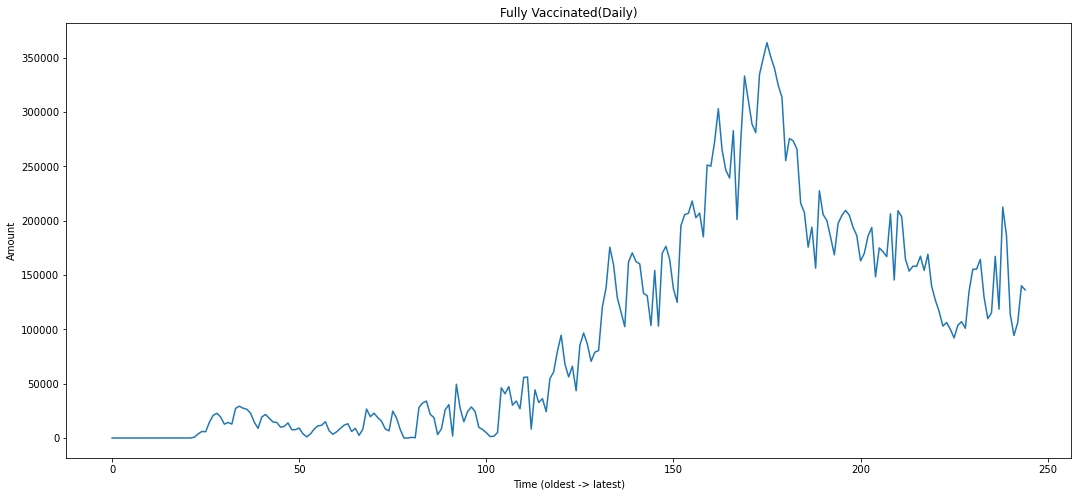

In [45]:
plt.figure(figsize=(18, 8))
plt.plot(lstm_data['daily_full'])
plt.title("Fully Vaccinated(Daily)")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Amount")
plt.show()

In [46]:
#Normalization
sc = MinMaxScaler(feature_range=(0,1))
daily_full_train_scaled = sc.fit_transform(daily_full_train)

#Data structure creation
#Take the past 7 days of data to predict the future fully vaccine number
lookup = 7

X_train = []
y_train = []

for i in range(lookup, len(daily_full_train_scaled)):
    X_train.append(daily_full_train_scaled[i-lookup:i,0])
    y_train.append(daily_full_train_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape,y_train.shape

((208, 7), (208,))

In [47]:
#Data reshaping
X_train = np.reshape(X_train,newshape=(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(208, 7, 1)

In [48]:
#Create model
regressor = Sequential()

#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 50)             10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [49]:
#Compile Model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
7/7 [==============================] - 4s 10ms/step - loss: 0.1199
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0595
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0415
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 9/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 10/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 11/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 12/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 13/100
7/7 [==============================] - 0s 9ms/s

In [50]:
#Test data
lstm_data_test.head()

daily_full_test = lstm_data_test[['daily_full']].values
daily_full_test.shape

dataset_total = pd.concat((lstm_data_train['daily_full'], lstm_data_test['daily_full']),axis=0)

In [51]:
#Creat the input for prediction
inputs = dataset_total[len(dataset_total) - len(lstm_data_test) - 7:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

37

In [53]:
lookup = 7

X_test = []
for i in range(lookup,len(inputs)):
    X_test.append(inputs[i-lookup:i,0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(30, 7, 1)

In [54]:
#Model prediction
predicted_daily_full = regressor.predict(X_test)
predicted_daily_full = sc.inverse_transform(predicted_daily_full)

MAE:  33708.92526041667
Test RMSE: 37396.462


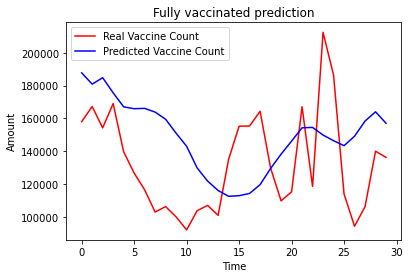

In [56]:
#Visualization
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

print("MAE: ",mean_absolute_error(daily_full_test,predicted_daily_full))
print('Test RMSE: %.3f' %rmse(daily_full_test, predicted_daily_full))

plt.plot(daily_full_test, color = 'red', label = 'Real Vaccine Count')
plt.plot(predicted_daily_full, color = 'blue', label = 'Predicted Vaccine Count')

plt.title('Fully vaccinated prediction')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [73]:
lstm_test = pd.DataFrame(daily_full_test)
lstm_test = lstm_test.to_csv('Project dataset/Herd Immunity/lstm_test.csv')

lstm_predictions = pd.DataFrame(predicted_daily_full)
lstm_predictions = lstm_predictions.to_csv('Project dataset/Herd Immunity/lstm_predictions.csv')

#### 4.2 Forecasting

In [29]:
#Forecasting
lstm_data = df_vax_msia.copy()
lstm_data_train = lstm_data[:244]
lstm_data_test = lstm_data[244:]
daily_full_train = lstm_data_train[['daily_full']].values

#Normalization
sc = MinMaxScaler(feature_range=(0,1))
daily_full_train_scaled = sc.fit_transform(daily_full_train)

#Preprocess Train data
lookup = 7

X_train = []
y_train = []

for i in range(lookup, len(daily_full_train_scaled)):
    X_train.append(daily_full_train_scaled[i-lookup:i,0])
    y_train.append(daily_full_train_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,newshape=(X_train.shape[0],X_train.shape[1],1))

In [30]:
#Create model
regressor = Sequential()

#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 7, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [31]:
#Compile Model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8/8 [==============================] - 6s 9ms/step - loss: 0.1107
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0454
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0264
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 9/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 11/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 12/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 13/100
8/8 [==============================] - 0s 9ms/s

In [32]:
#Forecasting
forecast = []
days = 35
lookup = 7

dataset_total = pd.concat((lstm_data_train['daily_full'], lstm_data_test['daily_full']),axis=0)

for i in range(days):
    inputs = dataset_total[(237+i):].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test = []
    for j in range(lookup,len(inputs)):
        X_test.append(inputs[j-lookup:j,0])
    X_test = np.array(X_test)
    #print(X_test.shape)
    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    predicted_daily_full = regressor.predict(X_test)
    predicted_daily_full = sc.inverse_transform(predicted_daily_full)
    pre_reshp = predicted_daily_full.reshape(-1).astype(int)
    #dataset_total = pd.concat((lstm_data_train['daily_full'], lstm_data_test['daily_full'],pd.DataFrame(pre_reshp)),axis=0,ignore_index=True)
    dataset_total = pd.concat((dataset_total,pd.DataFrame(pre_reshp)),axis=0,ignore_index=True)

Forecasting number for next 5 weeks:  4493483
Current cummulative of fully vaccinated person:  24042758
Current Malaysia population:  32657400
Predicted percentage by 30/11/2021:  87.38062736163933 %
Herd immunity is reached by 30 November 2021


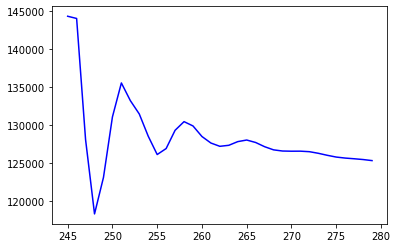

In [33]:
plt.plot(dataset_total[245:],color='blue')

lstm_total = int(dataset_total[245:].sum())

print("Forecasting number for next 5 weeks: ", lstm_total)

current_cum = df_vax_msia.iloc[-1]['cumul_full']
print("Current cummulative of fully vaccinated person: ", current_cum)

malaysia_pop = df_static.iloc[0]['pop']
print("Current Malaysia population: ", malaysia_pop)

total_percentage_lstm = 100*(lstm_total+current_cum)/malaysia_pop

print("Predicted percentage by 30/11/2021: ",total_percentage_lstm,"%")

if total_percentage_lstm > 80:
    print("Herd immunity is reached by 30 November 2021")
else:
    print("Herd immunity is not reached by 30 November 2021")

In [35]:
lstm_forecast = dataset_total[245:]
lstm_forecast = lstm_forecast.to_csv('Project dataset/Herd Immunity/lstm_forecast.csv')

# Feature Selection

### 1. Prepare casesNew dataset

In [71]:
#Prepare msia daily cases with state daily cases
msia_cases_feat = msia_cases.copy()
state_pivot = df_cases_state.pivot_table(values=['cases_new'],index='date',columns=['state'])

msia_state_cases_feat = msia_cases_feat.merge(state_pivot,left_on=['date'],right_on=['date'],how='left')

#Drop unnecessary column
msia_state_cases_feat.drop(['year_month','year','month','deaths_new_dod','deaths_bid_dod','deaths_pvax','deaths_fvax','deaths_tat'],axis=1,inplace=True)
msia_state_cases_feat = msia_state_cases_feat[msia_state_cases_feat['date'] >= '2021-02-24' ]

#Prepare state vaccine
df_vax_state_re = df_vax_state.copy()
df_vax_state_re.rename(columns={'daily':'daily_vacc'},inplace=True)
vax_state_pivot = df_vax_state_re.pivot_table(values=['daily_vacc'],index='date',columns=['state'])

#Merge all in one
msia_state_vacc_cases_feat = msia_state_cases_feat.merge(vax_state_pivot,left_on=['date'],right_on=['date'],how='left')

#Change date to datetime
msia_state_vacc_cases_feat['date'] = pd.to_datetime(msia_state_vacc_cases_feat['date'],errors='coerce')

msia_state_vacc_cases_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             245 non-null    datetime64[ns]
 1   cases_new                        245 non-null    int64         
 2   cases_import                     245 non-null    int64         
 3   cases_recovered                  245 non-null    int64         
 4   cases_active                     245 non-null    int64         
 5   cases_cluster                    245 non-null    float64       
 6   cases_pvax                       245 non-null    float64       
 7   cases_fvax                       245 non-null    float64       
 8   cases_child                      245 non-null    float64       
 9   cases_adolescent                 245 non-null    float64       
 10  cases_adult                      245 non-null    float64      

C:\Users\User\anaconda3\envs\ml_env\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


In [72]:
from datetime import timedelta
from dateutil.relativedelta import *

df_cases_state['date'] = pd.to_datetime(df_cases_state['date'],errors='coerce')

#Accumulate state daily cases
def accmulateStateCases(df,name):
    df_read = (df['state'] == name)
    df_read_cases = df[df_read]
    df_read_cases = df_read_cases.reset_index()
    df_read_cases = df_read_cases[['date','state','cases_new']]
    
    df_read_cases['cases_1_day_before'] = 0
    df_read_cases['cases_2_day_before'] = 0
    df_read_cases['cases_3_day_before'] = 0
    df_read_cases['cases_4_day_before'] = 0
    df_read_cases['cases_5_day_before'] = 0
    df_read_cases['cases_6_day_before'] = 0
    df_read_cases['cases_1_week_before'] = 0
    df_read_cases['cases_2_week_before'] = 0
    
    for i in range(3,9):
        for j in range(len(df_read_cases)):
            date = df_read_cases['date'][j] - relativedelta(days=+(i-2))
            yesterday = df_read_cases[df_read_cases['date'] == date]
            if yesterday.empty:
                df_read_cases.iloc[[j],[i]] = 0
            else:
                df_read_cases.iloc[[j],[i]] = yesterday.cases_new.values[0]
                
    for i in range(9,11):
        for j in range(len(df_read_cases)):
            date = df_read_cases['date'][j] - relativedelta(weeks=+(i-8))
            yesterday = df_read_cases[df_read_cases['date'] == date]
            if yesterday.empty:
                df_read_cases.iloc[[j],[i]] = 0
            else:
                df_read_cases.iloc[[j],[i]] = yesterday.cases_new.values[0]
                
    return df_read_cases

In [73]:
#Apply the function on all states and Wilayah Persekutuan
Johor = accmulateStateCases(df_cases_state,'Johor')
Melaka = accmulateStateCases(df_cases_state,'Melaka')
NegeriSembilan = accmulateStateCases(df_cases_state,'Negeri Sembilan')
Selangor = accmulateStateCases(df_cases_state,'Selangor')
Pahang = accmulateStateCases(df_cases_state,'Pahang')
Perak = accmulateStateCases(df_cases_state,'Perak')
Kelantan = accmulateStateCases(df_cases_state,'Kelantan')
Kedah = accmulateStateCases(df_cases_state,'Kedah')
Terengganu = accmulateStateCases(df_cases_state,'Terengganu')
Perlis = accmulateStateCases(df_cases_state,'Perlis')
Sarawak = accmulateStateCases(df_cases_state,'Sarawak')
Sabah = accmulateStateCases(df_cases_state,'Sabah')
KL = accmulateStateCases(df_cases_state,'W.P. Kuala Lumpur')
Putrajaya = accmulateStateCases(df_cases_state,'W.P. Putrajaya')
Labuan = accmulateStateCases(df_cases_state,'W.P. Labuan')

#Concat all states
All_State = [Johor, Melaka, NegeriSembilan, Selangor, Pahang, Perak, Kelantan, Kedah, Terengganu, Perlis, Sarawak, Sabah, KL, Putrajaya, Labuan]
df_allState_accumulate = pd.concat(All_State)

#Create pivot table from all states
allStateAcc_pivot = df_allState_accumulate.pivot_table(values=['cases_1_day_before','cases_2_day_before','cases_3_day_before','cases_4_day_before','cases_5_day_before','cases_6_day_before','cases_1_week_before', 'cases_2_week_before'],index='date',columns=['state'])
#allStateAcc_pivot.tail()

In [74]:
#Accumulate state daily vaccine

df_vax_state_re['date'] = pd.to_datetime(df_vax_state_re['date'],errors='coerce')

def accmulateStateVaccine(df,name):
    df_read = (df['state'] == name)
    df_read_cases = df[df_read]
    df_read_cases = df_read_cases.reset_index()
    df_read_cases = df_read_cases[['date','state','daily_vacc']]
    
    df_read_cases['vacc_1_week_before'] = 0
    df_read_cases['vacc_2_week_before'] = 0
    df_read_cases['vacc_3_week_before'] = 0
    df_read_cases['vacc_4_week_before'] = 0
    
    for i in range(len(df_read_cases)):
        week1 = df_read_cases['date'][i]+relativedelta(days=-7)
        week2 = df_read_cases['date'][i]+relativedelta(days=-14)
        week3 = df_read_cases['date'][i]+relativedelta(days=-21)
        week4 = df_read_cases['date'][i]+relativedelta(days=-28)
        
        before_w1 = df_read_cases[df_read_cases['date']==week1]
        before_w2 = df_read_cases[df_read_cases['date']==week2]
        before_w3 = df_read_cases[df_read_cases['date']==week3]
        before_w4 = df_read_cases[df_read_cases['date']==week4]
        
        if before_w1.empty:
            df_read_cases['vacc_1_week_before'][i] = 0
        else:
            df_read_cases['vacc_1_week_before'][i] = before_w1.daily_vacc.values[0]

        if before_w2.empty:
            df_read_cases['vacc_2_week_before'][i] = 0
        else:
            df_read_cases['vacc_2_week_before'][i] = before_w2.daily_vacc.values[0]

        if before_w3.empty:
            df_read_cases['vacc_3_week_before'][i] = 0
        else:
            df_read_cases['vacc_3_week_before'][i] = before_w3.daily_vacc.values[0]

        if before_w4.empty:
            df_read_cases['vacc_4_week_before'][i] = 0
        else:
            df_read_cases['vacc_4_week_before'][i] = before_w4.daily_vacc.values[0]
                
    return df_read_cases

In [76]:
#Apply the function on all states and Wilayah Persekutuan
Johor_v = accmulateStateVaccine(df_vax_state_re,'Johor')
Melaka_v = accmulateStateVaccine(df_vax_state_re,'Melaka')
NegeriSembilan_v = accmulateStateVaccine(df_vax_state_re,'Negeri Sembilan')
Selangor_v = accmulateStateVaccine(df_vax_state_re,'Selangor')
Pahang_v = accmulateStateVaccine(df_vax_state_re,'Pahang')
Perak_v = accmulateStateVaccine(df_vax_state_re,'Perak')
Kelantan_v = accmulateStateVaccine(df_vax_state_re,'Kelantan')
Kedah_v = accmulateStateVaccine(df_vax_state_re,'Kedah')
Terengganu_v = accmulateStateVaccine(df_vax_state_re,'Terengganu')
Perlis_v = accmulateStateVaccine(df_vax_state_re,'Perlis')
Sarawak_v = accmulateStateVaccine(df_vax_state_re,'Sarawak')
Sabah_v = accmulateStateVaccine(df_vax_state_re,'Sabah')
KL_v = accmulateStateVaccine(df_vax_state_re,'W.P. Kuala Lumpur')
Putrajaya_v = accmulateStateVaccine(df_vax_state_re,'W.P. Putrajaya')
Labuan_v = accmulateStateVaccine(df_vax_state_re,'W.P. Labuan')

#Concat all states
All_State_v = [Johor_v, Melaka_v, NegeriSembilan_v, Selangor_v, Pahang_v, Perak_v, Kelantan_v, Kedah_v, Terengganu_v, Perlis_v, Sarawak_v, Sabah_v, KL_v, Putrajaya_v, Labuan_v]
df_allState_accumulate_v = pd.concat(All_State_v)

#Create pivot table from all states
allStateAcc_pivot_v = df_allState_accumulate_v.pivot_table(values=['vacc_1_week_before', 'vacc_2_week_before', 'vacc_3_week_before', 'vacc_4_week_before'],index='date',columns=['state'])
allStateAcc_pivot_v.tail()

<ipython-input-74-f924184caa9e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read_cases['vacc_1_week_before'][i] = 0
<ipython-input-74-f924184caa9e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read_cases['vacc_2_week_before'][i] = 0
<ipython-input-74-f924184caa9e>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read_cases['vacc_3_week_before'][i] = 0
<ipython-input-74-f924184caa9e>:43: SettingWithCopyWarning: 
A v

vacc_1_week_before                                                \
state                   Johor  Kedah Kelantan Melaka Negeri Sembilan Pahang   
date                                                                          
2021-10-22              16934   7196     4087   5465            6513  14237   
2021-10-23              19518   7105     4496   4230            2776   4008   
2021-10-24              21479  12116    15391   2358            1068   3589   
2021-10-25              24665  17248    19477   7195            6349  10185   
2021-10-26              19793  10283     6721   5899             543   9841   

                                                                               \
state       Perak Perlis  Sabah Sarawak Selangor Terengganu W.P. Kuala Lumpur   
date                                                                            
2021-10-22  21001   1628  28558    6587    37394       2770             11085   
2021-10-23  12660    479  14738   21285    13735       4490              7903   
2021-10-24   6015    663  12747   20995    11703       8029              7371   
2021-10-25  15149   2404  15875   17286    37183       9083             12209   
2021-10-26   6734   2090  11902   14325    21497       4007              8386   

                                      vacc_2_week_before                  \
state      W.P. Labuan W.P. Putrajaya              Johor  Kedah Kelantan   
date                                                                       
2021-10-22         825           1092              34235   4380     1373   
2021-10-23         767              0              24050   4091     2028   
2021-10-24         819              0              20773   9959     9597   
2021-10-25         319           1265              23534  15721    12214   
2021-10-26          14              0              29420  19326    13258   

                                                                       \
state      Melaka Negeri Sembilan Pahang  Perak Perlis  Sabah Sarawak   
date                                                                    
2021-10-22   3469            3953   7494  18911    767  41041    5806   
2021-10-23   1833            1927   6055  18501    266  42933    6043   
2021-10-24    151             594   2332  12832    444  40414    3580   
2021-10-25   1794            6114  10168  17249   2929  39638    2172   
2021-10-26   1719            6101  18506  23395   1902  31626    1061   

                                                                             \
state      Selangor Terengganu W.P. Kuala Lumpur W.P. Labuan W.P. Putrajaya   
date                                                                          
2021-10-22    28816       4073             10572         122            966   
2021-10-23    12785       6932              5346         442             12   
2021-10-24     9003       7633              3980           2              2   
2021-10-25    31758       7519              4391         158           1232   
2021-10-26    34930      10541              6770         100           1313   

           vacc_3_week_before                                                \
state                   Johor  Kedah Kelantan Melaka Negeri Sembilan Pahang   
date                                                                          
2021-10-22              33045  21986     5646   8026            9399  21469   
2021-10-23              31572  18037     6651   7639            3922  17585   
2021-10-24              43122  20889    15037   1527            1958  13436   
2021-10-25              41406  20430    17005   5809            8590   8784   
2021-10-26              44065  16943    13895   5416            7470  16658   

                                                                               \
state       Perak Perlis  Sabah Sarawak Selangor Terengganu W.P. Kuala Lumpur   
date                                                                            
2021-10-22  30629   1389  

In [77]:
msia_state_vacc_cases_feat_merge = msia_state_vacc_cases_feat.merge(allStateAcc_pivot,left_on=['date'],right_on=['date'],how='left')
msia_state_vacc_cases_feat_merge = msia_state_vacc_cases_feat_merge.merge(allStateAcc_pivot_v,left_on=['date'],right_on=['date'],how='left')
msia_state_vacc_cases_feat_merge = msia_state_vacc_cases_feat_merge.dropna()

#Cases_new dataset
msia_state_vacc_cases_feat_merge.tail()

C:\Users\User\anaconda3\envs\ml_env\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace,rtk-ag,pcr,deaths_new,deaths_bid,"(cases_new, Johor)","(cases_new, Kedah)","(cases_new, Kelantan)","(cases_new, Melaka)","(cases_new, Negeri Sembilan)","(cases_new, Pahang)","(cases_new, Perak)","(cases_new, Perlis)","(cases_new, Pulau Pinang)","(cases_new, Sabah)","(cases_new, Sarawak)","(cases_new, Selangor)","(cases_new, Terengganu)","(cases_new, W.P. Kuala Lumpur)","(cases_new, W.P. Labuan)","(cases_new, W.P. Putrajaya)","(daily_vacc, Johor)","(daily_vacc, Kedah)","(daily_vacc, Kelantan)","(daily_vacc, Melaka)","(daily_vacc, Negeri Sembilan)","(daily_vacc, Pahang)","(daily_vacc, Perak)","(daily_vacc, Perlis)","(daily_vacc, Pulau Pinang)","(daily_vacc, Sabah)","(daily_vacc, Sarawak)","(daily_vacc, Selangor)","(daily_vacc, Terengganu)","(daily_vacc, W.P. Kuala Lumpur)","(daily_vacc, W.P. Labuan)","(daily_vacc, W.P. Putrajaya)","(cases_1_day_before, Johor)","(cases_1_day_before, Kedah)","(cases_1_day_before, Kelantan)","(cases_1_day_before, Melaka)","(cases_1_day_before, Negeri Sembilan)","(cases_1_day_before, Pahang)","(cases_1_day_before, Perak)","(cases_1_day_before, Perlis)","(cases_1_day_before, Sabah)","(cases_1_day_before, Sarawak)","(cases_1_day_before, Selangor)","(cases_1_day_before, Terengganu)","(cases_1_day_before, W.P. Kuala Lumpur)","(cases_1_day_before, W.P. Labuan)","(cases_1_day_before, W.P. Putrajaya)","(cases_1_week_before, Johor)","(cases_1_week_before, Kedah)","(cases_1_week_before, Kelantan)","(cases_1_week_before, Melaka)","(cases_1_week_before, Negeri Sembilan)","(cases_1_week_before, Pahang)","(cases_1_week_before, Perak)","(cases_1_week_before, Perlis)","(cases_1_week_before, Sabah)","(cases_1_week_before, Sarawak)","(cases_1_week_before, Selangor)","(cases_1_week_before, Terengganu)","(cases_1_week_before, W.P. Kuala Lumpur)","(cases_1_week_before, W.P. Labuan)","(cases_1_week_before, W.P. Putrajaya)","(cases_2_day_before, Johor)","(cases_2_day_before, Kedah)","(cases_2_day_before, Kelantan)","(cases_2_day_before, Melaka)","(cases_2_day_before, Negeri Sembilan)","(cases_2_day_before, Pahang)","(cases_2_day_before, Perak)","(cases_2_day_before, Perlis)","(cases_2_day_before, Sabah)","(cases_2_day_before, Sarawak)","(cases_2_day_before, Selangor)","(cases_2_day_before, Terengganu)","(cases_2_day_before, W.P. Kuala Lumpur)","(cases_2_day_before, W.P. Labuan)","(cases_2_day_before, W.P. Putrajaya)","(cases_2_week_before, Johor)","(cases_2_week_before, Kedah)","(cases_2_week_before, Kelantan)","(cases_2_week_before, Melaka)","(cases_2_week_before, Negeri Sembilan)","(cases_2_week_before, Pahang)","(cases_2_week_before, Perak)","(cases_2_week_before, Perlis)","(cases_2_week_before, Sabah)","(cases_2_week_before, Sarawak)","(cases_2_week_before, Selangor)","(cases_2_week_before, Terengganu)","(cases_2_week_before, W.P. Kuala Lumpur)","(cases_2_week_before, W.P. Labuan)","(cases_2_week_before, W.P. Putrajaya)","(cases_3_day_before, Johor)","(cases_3_day_before, Kedah)","(cases_3_day_before, Kelantan)","(cases_3_day_before, Melaka)","(cases_3_day_before, Negeri Sembilan)","(cases_3_day_before, Pahang)","(cases_3_day_before, Perak)","(cases_3_day_before, Perlis)","(cases_3_day_before, Sabah)","(cases_3_day_before, Sarawak)","(cases_3_day_before, Selangor)","(cases_3_day_before, Terengganu)","(cases_3_day_before, W.P. Kuala Lumpur)","(cases_3_day_before, W.P. Labuan)","(cases_3_day_before, W.P. Putrajaya)","(cases_4_day_before, Johor)","(cases_4_day_before, Kedah)","(cases_4_day_before, Kelantan)","(cases_4_day_before, Melaka)","(cases_4_day_before, Negeri Sembilan)","(cases_4_day_before, Pahang)","(cases_4_day_before, Perak)","(cases_4_day_before, Perlis)","(cases_4_day_before, Sabah)","(cases_4_day_before, Sarawak)","(cases_4_day_befor

### 2. Prepare admitted cases dataset

In [84]:
# 2. Prepare admitted rate dataset
hosp_feat = df_hosp.copy()
hosp_feat.head()

hosp_pivot = hosp_feat.pivot_table(values=['admitted_total'],index='date',columns=['state'])
hosp_pivot['overall_admitted'] = hosp_pivot.sum(axis=1)
hosp_pivot.tail()

admitted_total                                                      \
state               Johor Kedah Kelantan Melaka Negeri Sembilan Pahang  Perak   
date                                                                            
2021-10-22          156.0  28.0    120.0   25.0            49.0   34.0  124.0   
2021-10-23          168.0  67.0    121.0   14.0            41.0   42.0   79.0   
2021-10-24          156.0  41.0     96.0   24.0            44.0   73.0   55.0   
2021-10-25          206.0  38.0    116.0   27.0            33.0   57.0   47.0   
2021-10-26          192.0  49.0    128.0   18.0            42.0   37.0   61.0   

                                                                   \
state      Perlis Pulau Pinang  Sabah Sarawak Selangor Terengganu   
date                                                                
2021-10-22   19.0         31.0  128.0   220.0    298.0       39.0   
2021-10-23   12.0         24.0  127.0   186.0    299.0       85.0   
2021-10-24   23.0         34.0   96.0   199.0    288.0       80.0   
2021-10-25   21.0         21.0  117.0   166.0    273.0      107.0   
2021-10-26   14.0         21.0  142.0   180.0    349.0       56.0   

                                                        overall_admitted  
state      W.P. Kuala Lumpur W.P. Labuan W.P. Putrajaya                   
date                                                                      
2021-10-22              17.0         0.0           29.0           1317.0  
2021-10-23              27.0         2.0           20.0           1314.0  
2021-10-24              26.0         0.0           22.0           1257.0  
2021-10-25              21.0         4.0           26.0           1280.0  
2021-10-26              23.0         2.0           26.0           1340.0

In [79]:
df_hosp['date'] = pd.to_datetime(df_hosp['date'],errors='coerce')

#Accumulate state daily cases
def accmulateAdmitted(df,name):
    df_read = (df['state'] == name)
    df_read_cases = df[df_read]
    df_read_cases = df_read_cases.reset_index()
    df_read_cases = df_read_cases[['date','state','admitted_total']]
    
    df_read_cases['admitted_1_day_before'] = 0
    df_read_cases['admitted_2_day_before'] = 0
    df_read_cases['admitted_3_day_before'] = 0
    df_read_cases['admitted_4_day_before'] = 0
    df_read_cases['admitted_5_day_before'] = 0
    df_read_cases['admitted_6_day_before'] = 0
    df_read_cases['admitted_1_week_before'] = 0
    df_read_cases['admitted_2_week_before'] = 0
    
    for i in range(3,9):
        for j in range(len(df_read_cases)):
            date = df_read_cases['date'][j] - relativedelta(days=+(i-2))
            yesterday = df_read_cases[df_read_cases['date'] == date]
            if yesterday.empty:
                df_read_cases.iloc[[j],[i]] = 0
            else:
                df_read_cases.iloc[[j],[i]] = yesterday.admitted_total.values[0]
                
    for i in range(9,11):
        for j in range(len(df_read_cases)):
            date = df_read_cases['date'][j] - relativedelta(weeks=+(i-8))
            yesterday = df_read_cases[df_read_cases['date'] == date]
            if yesterday.empty:
                df_read_cases.iloc[[j],[i]] = 0
            else:
                df_read_cases.iloc[[j],[i]] = yesterday.admitted_total.values[0]
                
    return df_read_cases

In [80]:
#Apply the function on all states and Wilayah Persekutuan
Johor = accmulateAdmitted(df_hosp,'Johor')
Melaka = accmulateAdmitted(df_hosp,'Melaka')
NegeriSembilan = accmulateAdmitted(df_hosp,'Negeri Sembilan')
Selangor = accmulateAdmitted(df_hosp,'Selangor')
Pahang = accmulateAdmitted(df_hosp,'Pahang')
Perak = accmulateAdmitted(df_hosp,'Perak')
Kelantan = accmulateAdmitted(df_hosp,'Kelantan')
Kedah = accmulateAdmitted(df_hosp,'Kedah')
Terengganu = accmulateAdmitted(df_hosp,'Terengganu')
Perlis = accmulateAdmitted(df_hosp,'Perlis')
Sarawak = accmulateAdmitted(df_hosp,'Sarawak')
Sabah = accmulateAdmitted(df_hosp,'Sabah')
KL = accmulateAdmitted(df_hosp,'W.P. Kuala Lumpur')
Putrajaya = accmulateAdmitted(df_hosp,'W.P. Putrajaya')
Labuan = accmulateAdmitted(df_hosp,'W.P. Labuan')

#Concat all states
All_State_admitted = [Johor, Melaka, NegeriSembilan, Selangor, Pahang, Perak, Kelantan, Kedah, Terengganu, Perlis, Sarawak, Sabah, KL, Putrajaya, Labuan]
df_allState_accumulate_admitted = pd.concat(All_State_admitted)

#Create pivot table from all states
allStateAcc_admitted_pivot = df_allState_accumulate_admitted.pivot_table(values=['admitted_1_day_before','admitted_2_day_before','admitted_3_day_before','admitted_4_day_before','admitted_5_day_before','admitted_6_day_before','admitted_1_week_before', 'admitted_2_week_before'],index='date',columns=['state'])
#allStateAcc_admitted_pivot.tail()

In [81]:
# state_pivot
# tmpo = date.merge(hosp_pivot,left_on=['date'],right_on=['date'],how='left')

tmp = msia_state_cases_feat[[
    'date',
    ('cases_new', 'Johor'),
    ('cases_new', 'Kedah'),
    ('cases_new', 'Kelantan'),
    ('cases_new', 'Melaka'),
    ('cases_new', 'Negeri Sembilan'),
    ('cases_new', 'Pahang'),
    ('cases_new', 'Perak'),
    ('cases_new', 'Perlis'),
    ('cases_new', 'Pulau Pinang'),
    ('cases_new', 'Sabah'),
    ('cases_new', 'Sarawak'),
    ('cases_new', 'Selangor'),
    ('cases_new', 'Terengganu'),
    ('cases_new', 'W.P. Kuala Lumpur'),
    ('cases_new', 'W.P. Labuan'),
    ('cases_new', 'W.P. Putrajaya')
]]
tmp['date'] = pd.to_datetime(tmp['date'],errors='coerce')

C:\Users\User\anaconda3\envs\ml_env\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<ipython-input-81-0802e718c69b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['date'] = pd.to_datetime(tmp['date'],errors='coerce')


In [85]:
#d + hosp_pivot + allStateAcc_admitted_pivot + allStateAcc_pivot_v + state_pivot

date = df_hosp[['date']].drop_duplicates(['date'])

admitted_state_vacc_feat_merge = date.merge(hosp_pivot,left_on=['date'],right_on=['date'],how='left')
admitted_state_vacc_feat_merge = admitted_state_vacc_feat_merge[admitted_state_vacc_feat_merge['date'] >= '2021-02-24']
admitted_state_vacc_feat_merge = admitted_state_vacc_feat_merge.merge(allStateAcc_admitted_pivot,left_on=['date'],right_on=['date'],how='left')
admitted_state_vacc_feat_merge = admitted_state_vacc_feat_merge.merge(tmp,left_on=['date'],right_on=['date'],how='left')
admitted_state_vacc_feat_merge = admitted_state_vacc_feat_merge.merge(allStateAcc_pivot_v,left_on=['date'],right_on=['date'],how='left')
admitted_state_vacc_feat_merge

C:\Users\User\anaconda3\envs\ml_env\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,date,"(admitted_total, Johor)","(admitted_total, Kedah)","(admitted_total, Kelantan)","(admitted_total, Melaka)","(admitted_total, Negeri Sembilan)","(admitted_total, Pahang)","(admitted_total, Perak)","(admitted_total, Perlis)","(admitted_total, Pulau Pinang)","(admitted_total, Sabah)","(admitted_total, Sarawak)","(admitted_total, Selangor)","(admitted_total, Terengganu)","(admitted_total, W.P. Kuala Lumpur)","(admitted_total, W.P. Labuan)","(admitted_total, W.P. Putrajaya)","(overall_admitted, )","(admitted_1_day_before, Johor)","(admitted_1_day_before, Kedah)","(admitted_1_day_before, Kelantan)","(admitted_1_day_before, Melaka)","(admitted_1_day_before, Negeri Sembilan)","(admitted_1_day_before, Pahang)","(admitted_1_day_before, Perak)","(admitted_1_day_before, Perlis)","(admitted_1_day_before, Sabah)","(admitted_1_day_before, Sarawak)","(admitted_1_day_before, Selangor)","(admitted_1_day_before, Terengganu)","(admitted_1_day_before, W.P. Kuala Lumpur)","(admitted_1_day_before, W.P. Labuan)","(admitted_1_day_before, W.P. Putrajaya)","(admitted_1_week_before, Johor)","(admitted_1_week_before, Kedah)","(admitted_1_week_before, Kelantan)","(admitted_1_week_before, Melaka)","(admitted_1_week_before, Negeri Sembilan)","(admitted_1_week_before, Pahang)","(admitted_1_week_before, Perak)","(admitted_1_week_before, Perlis)","(admitted_1_week_before, Sabah)","(admitted_1_week_before, Sarawak)","(admitted_1_week_before, Selangor)","(admitted_1_week_before, Terengganu)","(admitted_1_week_before, W.P. Kuala Lumpur)","(admitted_1_week_before, W.P. Labuan)","(admitted_1_week_before, W.P. Putrajaya)","(admitted_2_day_before, Johor)","(admitted_2_day_before, Kedah)","(admitted_2_day_before, Kelantan)","(admitted_2_day_before, Melaka)","(admitted_2_day_before, Negeri Sembilan)","(admitted_2_day_before, Pahang)","(admitted_2_day_before, Perak)","(admitted_2_day_before, Perlis)","(admitted_2_day_before, Sabah)","(admitted_2_day_before, Sarawak)","(admitted_2_day_before, Selangor)","(admitted_2_day_before, Terengganu)","(admitted_2_day_before, W.P. Kuala Lumpur)","(admitted_2_day_before, W.P. Labuan)","(admitted_2_day_before, W.P. Putrajaya)","(admitted_2_week_before, Johor)","(admitted_2_week_before, Kedah)","(admitted_2_week_before, Kelantan)","(admitted_2_week_before, Melaka)","(admitted_2_week_before, Negeri Sembilan)","(admitted_2_week_before, Pahang)","(admitted_2_week_before, Perak)","(admitted_2_week_before, Perlis)","(admitted_2_week_before, Sabah)","(admitted_2_week_before, Sarawak)","(admitted_2_week_before, Selangor)","(admitted_2_week_before, Terengganu)","(admitted_2_week_before, W.P. Kuala Lumpur)","(admitted_2_week_before, W.P. Labuan)","(admitted_2_week_before, W.P. Putrajaya)","(admitted_3_day_before, Johor)","(admitted_3_day_before, Kedah)","(admitted_3_day_before, Kelantan)","(admitted_3_day_before, Melaka)","(admitted_3_day_before, Negeri Sembilan)","(admitted_3_day_before, Pahang)","(admitted_3_day_before, Perak)","(admitted_3_day_before, Perlis)","(admitted_3_day_before, Sabah)","(admitted_3_day_before, Sarawak)","(admitted_3_day_before, Selangor)","(admitted_3_day_before, Terengganu)","(admitted_3_day_before, W.P. Kuala Lumpur)","(admitted_3_day_before, W.P. Labuan)","(admitted_3_day_before, W.P. Putrajaya)","(admitted_4_day_before, Johor)","(admitted_4_day_before, Kedah)","(admitted_4_day_before, Kelantan)","(admitted_4_day_before, Melaka)","(admitted_4_day_before, Negeri Sembilan)","(admitted_4_day_before, Pahang)","(admitted_4_day_before, Perak)","(admitted_4_day_before, Perlis)","(admitted_4_day_before, Sabah)","(admitted_4_day_before, Sarawak)","(admitted_4_day_before, Selangor)","(admitted_4_day_before, Terengganu)","(admitted_4_day_before, W.P. Kuala Lumpur)","(admitted_4_day_before, W.P. Labuan)","(admitted_4_day_before, W.P. Putrajaya)","(admitted_5_day_before, Johor)","(admitted_5_day_before, Kedah)","(admitted_5_day_before, Kelantan)","(admitted_5_day_before, Melaka)","(admitted_5_day_before, Negeri Sembilan)

### 3. Prepare ICU cases dataset

In [90]:
#3. ICU Utilisation
icu_feat = df_icu.copy()
icu_feat.head()

icu_pivot = icu_feat.pivot_table(values=['icu_covid'],index='date',columns=['state'])
icu_pivot['overall_icu'] = icu_pivot.sum(axis=1)
icu_pivot.tail()

icu_covid                                                     \
state          Johor Kedah Kelantan Melaka Negeri Sembilan Pahang Perak   
date                                                                      
2021-10-22      38.0  36.0     55.0   12.0            13.0   29.0  65.0   
2021-10-23      37.0  38.0     55.0   13.0            13.0   28.0  66.0   
2021-10-24      33.0  34.0     55.0   12.0            13.0   27.0  63.0   
2021-10-25      33.0  34.0     49.0   11.0            13.0   26.0  58.0   
2021-10-26      32.0  33.0     54.0   15.0            14.0   19.0  63.0   

                                                                  \
state      Perlis Pulau Pinang Sabah Sarawak Selangor Terengganu   
date                                                               
2021-10-22    4.0         45.0  89.0   111.0    103.0       17.0   
2021-10-23    8.0         38.0  79.0   107.0    101.0       15.0   
2021-10-24    6.0         39.0  76.0   105.0    104.0       16.0   
2021-10-25    5.0         44.0  80.0   112.0    102.0       16.0   
2021-10-26    6.0         40.0  78.0   107.0     90.0       16.0   

                                                        overall_icu  
state      W.P. Kuala Lumpur W.P. Labuan W.P. Putrajaya              
date                                                                 
2021-10-22              26.0         0.0            0.0       643.0  
2021-10-23              21.0         0.0            0.0       619.0  
2021-10-24              20.0         0.0            0.0       603.0  
2021-10-25              19.0         0.0            0.0       602.0  
2021-10-26              17.0         0.0            0.0       584.0

In [87]:
df_icu['date'] = pd.to_datetime(df_icu['date'],errors='coerce')

#Accumulate state daily cases
def accmulateICU(df,name):
    df_read = (df['state'] == name)
    df_read_cases = df[df_read]
    df_read_cases = df_read_cases.reset_index()
    df_read_cases = df_read_cases[['date','state','icu_covid']]
    
    df_read_cases['ICU_1_day_before'] = 0
    df_read_cases['ICU_2_day_before'] = 0
    df_read_cases['ICU_3_day_before'] = 0
    df_read_cases['ICU_4_day_before'] = 0
    df_read_cases['ICU_5_day_before'] = 0
    df_read_cases['ICU_6_day_before'] = 0
    df_read_cases['ICU_1_week_before'] = 0
    df_read_cases['ICU_2_week_before'] = 0
    
    for i in range(3,9):
        for j in range(len(df_read_cases)):
            date = df_read_cases['date'][j] - relativedelta(days=+(i-2))
            yesterday = df_read_cases[df_read_cases['date'] == date]
            if yesterday.empty:
                df_read_cases.iloc[[j],[i]] = 0
            else:
                df_read_cases.iloc[[j],[i]] = yesterday.icu_covid.values[0]
                
    for i in range(9,11):
        for j in range(len(df_read_cases)):
            date = df_read_cases['date'][j] - relativedelta(weeks=+(i-8))
            yesterday = df_read_cases[df_read_cases['date'] == date]
            if yesterday.empty:
                df_read_cases.iloc[[j],[i]] = 0
            else:
                df_read_cases.iloc[[j],[i]] = yesterday.icu_covid.values[0]
                
    return df_read_cases

In [88]:
#Apply the function on all states and Wilayah Persekutuan
Johor = accmulateICU(df_icu,'Johor')
Melaka = accmulateICU(df_icu,'Melaka')
NegeriSembilan = accmulateICU(df_icu,'Negeri Sembilan')
Selangor = accmulateICU(df_icu,'Selangor')
Pahang = accmulateICU(df_icu,'Pahang')
Perak = accmulateICU(df_icu,'Perak')
Kelantan = accmulateICU(df_icu,'Kelantan')
Kedah = accmulateICU(df_icu,'Kedah')
Terengganu = accmulateICU(df_icu,'Terengganu')
Perlis = accmulateICU(df_icu,'Perlis')
Sarawak = accmulateICU(df_icu,'Sarawak')
Sabah = accmulateICU(df_icu,'Sabah')
KL = accmulateICU(df_icu,'W.P. Kuala Lumpur')
Putrajaya = accmulateICU(df_icu,'W.P. Putrajaya')
Labuan = accmulateICU(df_icu,'W.P. Labuan')

#Concat all states
All_State_ICU = [Johor, Melaka, NegeriSembilan, Selangor, Pahang, Perak, Kelantan, Kedah, Terengganu, Perlis, Sarawak, Sabah, KL, Putrajaya, Labuan]
df_allState_accumulate_ICU = pd.concat(All_State_ICU)

#Create pivot table from all states
allStateAcc_ICU_pivot = df_allState_accumulate_ICU.pivot_table(values=['ICU_1_day_before','ICU_2_day_before','ICU_3_day_before','ICU_4_day_before','ICU_5_day_before','ICU_6_day_before','ICU_1_week_before', 'ICU_2_week_before'],index='date',columns=['state'])
#allStateAcc_ICU_pivot.tail()

In [91]:
#date + icu_pivot + allStateAcc_ICU_pivot + admitted_state_vacc_feat_merge

date = df_icu[['date']].drop_duplicates(['date'])

ICU_state_vacc_feat_merge = date.merge(icu_pivot,left_on=['date'],right_on=['date'],how='left')
ICU_state_vacc_feat_merge = ICU_state_vacc_feat_merge[ICU_state_vacc_feat_merge['date'] >= '2021-02-24']
ICU_state_vacc_feat_merge = ICU_state_vacc_feat_merge.merge(allStateAcc_ICU_pivot,left_on=['date'],right_on=['date'],how='left')
ICU_state_vacc_feat_merge = ICU_state_vacc_feat_merge.merge(admitted_state_vacc_feat_merge,left_on=['date'],right_on=['date'],how='left')

ICU_state_vacc_feat_merge

C:\Users\User\anaconda3\envs\ml_env\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,date,"(icu_covid, Johor)","(icu_covid, Kedah)","(icu_covid, Kelantan)","(icu_covid, Melaka)","(icu_covid, Negeri Sembilan)","(icu_covid, Pahang)","(icu_covid, Perak)","(icu_covid, Perlis)","(icu_covid, Pulau Pinang)","(icu_covid, Sabah)","(icu_covid, Sarawak)","(icu_covid, Selangor)","(icu_covid, Terengganu)","(icu_covid, W.P. Kuala Lumpur)","(icu_covid, W.P. Labuan)","(icu_covid, W.P. Putrajaya)","(overall_icu, )","(ICU_1_day_before, Johor)","(ICU_1_day_before, Kedah)","(ICU_1_day_before, Kelantan)","(ICU_1_day_before, Melaka)","(ICU_1_day_before, Negeri Sembilan)","(ICU_1_day_before, Pahang)","(ICU_1_day_before, Perak)","(ICU_1_day_before, Perlis)","(ICU_1_day_before, Sabah)","(ICU_1_day_before, Sarawak)","(ICU_1_day_before, Selangor)","(ICU_1_day_before, Terengganu)","(ICU_1_day_before, W.P. Kuala Lumpur)","(ICU_1_day_before, W.P. Labuan)","(ICU_1_day_before, W.P. Putrajaya)","(ICU_1_week_before, Johor)","(ICU_1_week_before, Kedah)","(ICU_1_week_before, Kelantan)","(ICU_1_week_before, Melaka)","(ICU_1_week_before, Negeri Sembilan)","(ICU_1_week_before, Pahang)","(ICU_1_week_before, Perak)","(ICU_1_week_before, Perlis)","(ICU_1_week_before, Sabah)","(ICU_1_week_before, Sarawak)","(ICU_1_week_before, Selangor)","(ICU_1_week_before, Terengganu)","(ICU_1_week_before, W.P. Kuala Lumpur)","(ICU_1_week_before, W.P. Labuan)","(ICU_1_week_before, W.P. Putrajaya)","(ICU_2_day_before, Johor)","(ICU_2_day_before, Kedah)","(ICU_2_day_before, Kelantan)","(ICU_2_day_before, Melaka)","(ICU_2_day_before, Negeri Sembilan)","(ICU_2_day_before, Pahang)","(ICU_2_day_before, Perak)","(ICU_2_day_before, Perlis)","(ICU_2_day_before, Sabah)","(ICU_2_day_before, Sarawak)","(ICU_2_day_before, Selangor)","(ICU_2_day_before, Terengganu)","(ICU_2_day_before, W.P. Kuala Lumpur)","(ICU_2_day_before, W.P. Labuan)","(ICU_2_day_before, W.P. Putrajaya)","(ICU_2_week_before, Johor)","(ICU_2_week_before, Kedah)","(ICU_2_week_before, Kelantan)","(ICU_2_week_before, Melaka)","(ICU_2_week_before, Negeri Sembilan)","(ICU_2_week_before, Pahang)","(ICU_2_week_before, Perak)","(ICU_2_week_before, Perlis)","(ICU_2_week_before, Sabah)","(ICU_2_week_before, Sarawak)","(ICU_2_week_before, Selangor)","(ICU_2_week_before, Terengganu)","(ICU_2_week_before, W.P. Kuala Lumpur)","(ICU_2_week_before, W.P. Labuan)","(ICU_2_week_before, W.P. Putrajaya)","(ICU_3_day_before, Johor)","(ICU_3_day_before, Kedah)","(ICU_3_day_before, Kelantan)","(ICU_3_day_before, Melaka)","(ICU_3_day_before, Negeri Sembilan)","(ICU_3_day_before, Pahang)","(ICU_3_day_before, Perak)","(ICU_3_day_before, Perlis)","(ICU_3_day_before, Sabah)","(ICU_3_day_before, Sarawak)","(ICU_3_day_before, Selangor)","(ICU_3_day_before, Terengganu)","(ICU_3_day_before, W.P. Kuala Lumpur)","(ICU_3_day_before, W.P. Labuan)","(ICU_3_day_before, W.P. Putrajaya)","(ICU_4_day_before, Johor)","(ICU_4_day_before, Kedah)","(ICU_4_day_before, Kelantan)","(ICU_4_day_before, Melaka)","(ICU_4_day_before, Negeri Sembilan)","(ICU_4_day_before, Pahang)","(ICU_4_day_before, Perak)","(ICU_4_day_before, Perlis)","(ICU_4_day_before, Sabah)","(ICU_4_day_before, Sarawak)","(ICU_4_day_before, Selangor)","(ICU_4_day_before, Terengganu)","(ICU_4_day_before, W.P. Kuala Lumpur)","(ICU_4_day_before, W.P. Labuan)","(ICU_4_day_before, W.P. Putrajaya)","(ICU_5_day_before, Johor)","(ICU_5_day_before, Kedah)","(ICU_5_day_before, Kelantan)","(ICU_5_day_before, Melaka)","(ICU_5_day_before, Negeri Sembilan)","(ICU_5_day_before, Pahang)","(ICU_5_day_before, Perak)","(ICU_5_day_before, Perlis)","(ICU_5_day_before, Sabah)","(ICU_5_day_before, Sarawak)","(ICU_5_day_before, Selangor)","(ICU_5_day_before, Terengganu)","(ICU_5_day_before, W.P. Kuala Lumpur)","(ICU_5_day_before, W.P. Labuan)","(ICU_5_day_before, W.P. Putrajaya)","(ICU_6_day_before, Johor)","(ICU_6_day_before, Kedah)","(ICU_6_day_before, Kelantan)","(ICU_6_day_before, Melaka)","(ICU_6_day_before, Negeri Sembilan)","(ICU_6_day_before, Pahang)","(ICU_6_day_before, Perak)","(ICU_6_day_before, Perlis)"

### Summary of 3 datasets

In [92]:
#Total 3 datasets to be used in BORUTA and RFE
# 1. msia_state_vacc_cases_feat_merge (235)
# 2. admitted_state_vacc_feat_merge (214)
# 3. ICU_state_vacc_feat_merge (351)

In [93]:
#Import libraries
import sklearn
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from tqdm import tqdm_notebook, tqdm

#Define ranking function to calculate the feature importance score. The code is taken from lab tutorial.
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

#Scenario 1
msia_state_vacc_cases_feat_merge_encode = msia_state_vacc_cases_feat_merge.drop('date',1)
msia_state_vacc_cases_feat_merge_encode = pd.get_dummies(msia_state_vacc_cases_feat_merge_encode)
msia_state_vacc_cases_feat_merge_encode = msia_state_vacc_cases_feat_merge_encode.dropna()

#Secenario 2
admitted_state_vacc_feat_merge_encode = admitted_state_vacc_feat_merge.drop('date',1)
admitted_state_vacc_feat_merge_encode = pd.get_dummies(admitted_state_vacc_feat_merge_encode)
admitted_state_vacc_feat_merge_encode = admitted_state_vacc_feat_merge_encode.dropna()

#Scenario 3
ICU_state_vacc_feat_merge_encode = ICU_state_vacc_feat_merge.drop('date',1)
ICU_state_vacc_feat_merge_encode = pd.get_dummies(ICU_state_vacc_feat_merge_encode)
ICU_state_vacc_feat_merge_encode = ICU_state_vacc_feat_merge_encode.dropna()

<ipython-input-93-2148f66bcc84>:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  msia_state_vacc_cases_feat_merge_encode = msia_state_vacc_cases_feat_merge.drop('date',1)
<ipython-input-93-2148f66bcc84>:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  admitted_state_vacc_feat_merge_encode = admitted_state_vacc_feat_merge.drop('date',1)
<ipython-input-93-2148f66bcc84>:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ICU_state_vacc_feat_merge_encode = ICU_state_vacc_feat_merge.drop('date',1)


In [95]:
ICU_state_vacc_feat_merge_encode.head()

,"(icu_covid, Johor)","(icu_covid, Kedah)","(icu_covid, Kelantan)","(icu_covid, Melaka)","(icu_covid, Negeri Sembilan)","(icu_covid, Pahang)","(icu_covid, Perak)","(icu_covid, Perlis)","(icu_covid, Pulau Pinang)","(icu_covid, Sabah)","(icu_covid, Sarawak)","(icu_covid, Selangor)","(icu_covid, Terengganu)","(icu_covid, W.P. Kuala Lumpur)","(icu_covid, W.P. Labuan)","(icu_covid, W.P. Putrajaya)","(overall_icu, )","(ICU_1_day_before, Johor)","(ICU_1_day_before, Kedah)","(ICU_1_day_before, Kelantan)","(ICU_1_day_before, Melaka)","(ICU_1_day_before, Negeri Sembilan)","(ICU_1_day_before, Pahang)","(ICU_1_day_before, Perak)","(ICU_1_day_before, Perlis)","(ICU_1_day_before, Sabah)","(ICU_1_day_before, Sarawak)","(ICU_1_day_before, Selangor)","(ICU_1_day_before, Terengganu)","(ICU_1_day_before, W.P. Kuala Lumpur)","(ICU_1_day_before, W.P. Labuan)","(ICU_1_day_before, W.P. Putrajaya)","(ICU_1_week_before, Johor)","(ICU_1_week_before, Kedah)","(ICU_1_week_before, Kelantan)","(ICU_1_week_before, Melaka)","(ICU_1_week_before, Negeri Sembilan)","(ICU_1_week_before, Pahang)","(ICU_1_week_before, Perak)","(ICU_1_week_before, Perlis)","(ICU_1_week_before, Sabah)","(ICU_1_week_before, Sarawak)","(ICU_1_week_before, Selangor)","(ICU_1_week_before, Terengganu)","(ICU_1_week_before, W.P. Kuala Lumpur)","(ICU_1_week_before, W.P. Labuan)","(ICU_1_week_before, W.P. Putrajaya)","(ICU_2_day_before, Johor)","(ICU_2_day_before, Kedah)","(ICU_2_day_before, Kelantan)","(ICU_2_day_before, Melaka)","(ICU_2_day_before, Negeri Sembilan)","(ICU_2_day_before, Pahang)","(ICU_2_day_before, Perak)","(ICU_2_day_before, Perlis)","(ICU_2_day_before, Sabah)","(ICU_2_day_before, Sarawak)","(ICU_2_day_before, Selangor)","(ICU_2_day_before, Terengganu)","(ICU_2_day_before, W.P. Kuala Lumpur)","(ICU_2_day_before, W.P. Labuan)","(ICU_2_day_before, W.P. Putrajaya)","(ICU_2_week_before, Johor)","(ICU_2_week_before, Kedah)","(ICU_2_week_before, Kelantan)","(ICU_2_week_before, Melaka)","(ICU_2_week_before, Negeri Sembilan)","(ICU_2_week_before, Pahang)","(ICU_2_week_before, Perak)","(ICU_2_week_before, Perlis)","(ICU_2_week_before, Sabah)","(ICU_2_week_before, Sarawak)","(ICU_2_week_before, Selangor)","(ICU_2_week_before, Terengganu)","(ICU_2_week_before, W.P. Kuala Lumpur)","(ICU_2_week_before, W.P. Labuan)","(ICU_2_week_before, W.P. Putrajaya)","(ICU_3_day_before, Johor)","(ICU_3_day_before, Kedah)","(ICU_3_day_before, Kelantan)","(ICU_3_day_before, Melaka)","(ICU_3_day_before, Negeri Sembilan)","(ICU_3_day_before, Pahang)","(ICU_3_day_before, Perak)","(ICU_3_day_before, Perlis)","(ICU_3_day_before, Sabah)","(ICU_3_day_before, Sarawak)","(ICU_3_day_before, Selangor)","(ICU_3_day_before, Terengganu)","(ICU_3_day_before, W.P. Kuala Lumpur)","(ICU_3_day_before, W.P. Labuan)","(ICU_3_day_before, W.P. Putrajaya)","(ICU_4_day_before, Johor)","(ICU_4_day_before, Kedah)","(ICU_4_day_before, Kelantan)","(ICU_4_day_before, Melaka)","(ICU_4_day_before, Negeri Sembilan)","(ICU_4_day_before, Pahang)","(ICU_4_day_before, Perak)","(ICU_4_day_before, Perlis)","(ICU_4_day_before, Sabah)","(ICU_4_day_before, Sarawak)","(ICU_4_day_before, Selangor)","(ICU_4_day_before, Terengganu)","(ICU_4_day_before, W.P. Kuala Lumpur)","(ICU_4_day_before, W.P. Labuan)","(ICU_4_day_before, W.P. Putrajaya)","(ICU_5_day_before, Johor)","(ICU_5_day_before, Kedah)","(ICU_5_day_before, Kelantan)","(ICU_5_day_before, Melaka)","(ICU_5_day_before, Negeri Sembilan)","(ICU_5_day_before, Pahang)","(ICU_5_day_before, Perak)","(ICU_5_day_before, Perlis)","(ICU_5_day_before, Sabah)","(ICU_5_day_before, Sarawak)","(ICU_5_day_before, Selangor)","(ICU_5_day_before, Terengganu)","(ICU_5_day_before, W.P. Kuala Lumpur)","(ICU_5_day_before, W.P. Labuan)","(ICU_5_day_before, W.P. Putrajaya)","(ICU_6_day_before, Johor)","(ICU_6_day_before, Kedah)","(ICU_6_day_before, Kelantan)","(ICU_6_day_before, Melaka)","(ICU_6_day_before, Negeri Sembilan)","(ICU_6_day_before, Pahang)","(ICU_6_day_before, Perak)","(ICU_6_day_before, Perlis)","(IC

# BORUTA

## 1. Daily cases

In [193]:
y_cases_new = msia_state_vacc_cases_feat_merge_encode['cases_new']
X_cases_new = msia_state_vacc_cases_feat_merge_encode.drop('cases_new',1)
colnames_cases_new = X_cases_new.columns

<ipython-input-193-1aebe3543a18>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_cases_new = msia_state_vacc_cases_feat_merge_encode.drop('cases_new',1)


In [95]:
rf = RandomForestClassifier(n_jobs=1,class_weight="balanced",max_depth=5)
feat_selector_casesNew = BorutaPy(rf,n_estimators="auto",random_state=1)
feat_selector_casesNew.fit(X_cases_new.values, y_cases_new.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=431, n_jobs=1,
                                          random_state=RandomState(MT19937) at 0x23D02126440),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x23D02126440)

In [96]:
boruta_score_casesNew = ranking(list(map(float,feat_selector_casesNew.ranking_)),colnames_cases_new,order=-1)
boruta_score_casesNew = pd.DataFrame(list(boruta_score_casesNew.items()),columns=['Features','Score'])
boruta_score_casesNew = boruta_score_casesNew.sort_values('Score',ascending=False)

#Display Top 15 and Bottom 15 boruta score of Pahang
print('---------Top 15----------')
display(boruta_score_casesNew.head(15))

print('---------Bottom 15----------')
display(boruta_score_casesNew.tail(15))

---------Top 15----------


,Features,Score
47,"(daily_vacc, Sarawak)",1.00
93,"(cases_2_day_before, Selangor)",1.00
31,"(cases_new, Sarawak)",0.99
138,"(cases_4_day_before, Selangor)",0.99
3,cases_cluster,0.98
16,cluster_workplace,0.98
55,"(cases_1_day_before, Kelantan)",0.97
77,"(cases_1_week_before, Sarawak)",0.97
86,"(cases_2_day_before, Melaka)",0.97
168,"(cases_6_day_before, Selangor)",0.96


---------Bottom 15----------


,Features,Score
75,"(cases_1_week_before, Perlis)",0.06
193,"(vacc_2_week_before, Pahang)",0.06
184,"(vacc_1_week_before, Terengganu)",0.05
44,"(daily_vacc, Perlis)",0.05
196,"(vacc_2_week_before, Sabah)",0.04
226,"(vacc_4_week_before, Sabah)",0.04
230,"(vacc_4_week_before, W.P. Kuala Lumpur)",0.03
198,"(vacc_2_week_before, Selangor)",0.03
199,"(vacc_2_week_before, Terengganu)",0.03
127,"(cases_3_day_before, W.P. Putrajaya)",0.02


In [154]:
#Get top 100 ranking
casesNew_feat_bo = pd.DataFrame({'Feature':list(X_cases_new.columns), 'Ranking':feat_selector_casesNew.ranking_})
casesNew_feat_bo.sort_values(by='Ranking')
casesNew_top_rank_bo = casesNew_feat_bo['Ranking'] <= 100
casesNew_feat_bo[casesNew_top_rank_bo].sort_values(["Ranking"],ascending=True).to_csv('Project dataset/Feature Selection/boruta_casesNew_100.csv')
casesNew_feat_bo[casesNew_top_rank_bo].sort_values(["Ranking"],ascending=True)

,Feature,Ranking
93,"(cases_2_day_before, Selangor)",2
47,"(daily_vacc, Sarawak)",3
138,"(cases_4_day_before, Selangor)",4
31,"(cases_new, Sarawak)",5
16,cluster_workplace,6
...,...,...
122,"(cases_3_day_before, Sarawak)",96
108,"(cases_2_week_before, Selangor)",97
133,"(cases_4_day_before, Pahang)",97
71,"(cases_1_week_before, Melaka)",99


In [180]:
casesNew_top_30 = casesNew_feat_bo['Ranking'] <=30
casesNew_top_50 = casesNew_feat_bo['Ranking'] <=50
casesNew_top_100 = casesNew_feat_bo['Ranking'] <=100

## 2. Admitted cases

In [99]:
y_admitted = admitted_state_vacc_feat_merge_encode[('overall_admitted','' )]
X_admitted = admitted_state_vacc_feat_merge_encode.drop(('overall_admitted',''),1)
colnames_admitted = X_admitted.columns


<ipython-input-99-281c88e60adf>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_admitted = admitted_state_vacc_feat_merge_encode.drop(('overall_admitted',''),1)


In [100]:
rf = RandomForestClassifier(n_jobs=1,class_weight="balanced",max_depth=5)
feat_selector_admitted = BorutaPy(rf,n_estimators="auto",random_state=1)
feat_selector_admitted.fit(X_admitted.values, y_admitted.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=28, n_jobs=1,
                                          random_state=RandomState(MT19937) at 0x23D031A6340),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x23D031A6340)

In [101]:
boruta_score_admitted = ranking(list(map(float,feat_selector_admitted.ranking_)),colnames_admitted,order=-1)
boruta_score_admitted = pd.DataFrame(list(boruta_score_admitted.items()),columns=['Features','Score'])
boruta_score_admitted = boruta_score_admitted.sort_values('Score',ascending=False)

#Display Top 15 and Bottom 15 boruta score of Pahang
print('---------Top 15----------')
display(boruta_score_admitted.head(15))

print('---------Bottom 15----------')
display(boruta_score_admitted.tail(15))

---------Top 15----------


,Features,Score
40,"(admitted_1_week_before, Sarawak)",1.00
107,"(admitted_5_day_before, Kedah)",1.00
147,"(cases_new, Selangor)",0.99
49,"(admitted_2_day_before, Melaka)",0.99
161,"(vacc_1_week_before, Sarawak)",0.98
63,"(admitted_2_week_before, Kelantan)",0.98
122,"(admitted_6_day_before, Kedah)",0.97
141,"(cases_new, Pahang)",0.97
24,"(admitted_1_day_before, Sabah)",0.96
3,"(admitted_total, Melaka)",0.96


---------Bottom 15----------


,Features,Score
157,"(vacc_1_week_before, Pahang)",0.07
170,"(vacc_2_week_before, Melaka)",0.06
120,"(admitted_5_day_before, W.P. Putrajaya)",0.06
201,"(vacc_4_week_before, Negeri Sembilan)",0.05
134,"(admitted_6_day_before, W.P. Labuan)",0.05
155,"(vacc_1_week_before, Melaka)",0.04
166,"(vacc_1_week_before, W.P. Putrajaya)",0.04
135,"(admitted_6_day_before, W.P. Putrajaya)",0.03
204,"(vacc_4_week_before, Perlis)",0.03
14,"(admitted_total, W.P. Labuan)",0.02


In [156]:
#Get top 30 ranking
admitted_feat_bo = pd.DataFrame({'Feature':list(X_admitted.columns), 'Ranking':feat_selector_admitted.ranking_})
admitted_feat_bo.sort_values(by='Ranking')
admitted_top_rank_bo = admitted_feat_bo['Ranking'] <= 100
admitted_feat_bo[admitted_top_rank_bo].sort_values(["Ranking"],ascending=True).to_csv('Project dataset/Feature Selection/boruta_admitted_100.csv')
admitted_feat_bo[admitted_top_rank_bo].sort_values(["Ranking"],ascending=True)

,Feature,Ranking
40,"(admitted_1_week_before, Sarawak)",2
107,"(admitted_5_day_before, Kedah)",3
147,"(cases_new, Selangor)",4
49,"(admitted_2_day_before, Melaka)",5
63,"(admitted_2_week_before, Kelantan)",6
...,...,...
37,"(admitted_1_week_before, Perak)",95
23,"(admitted_1_day_before, Perlis)",97
61,"(admitted_2_week_before, Johor)",98
27,"(admitted_1_day_before, Terengganu)",99


In [181]:
admitted_top_30 = admitted_feat_bo['Ranking'] <=30
admitted_top_50 = admitted_feat_bo['Ranking'] <=50
admitted_top_100 = admitted_feat_bo['Ranking'] <=100

## 3. ICU cases

In [103]:
y_ICU = ICU_state_vacc_feat_merge_encode[('overall_icu','' )]
X_ICU = ICU_state_vacc_feat_merge_encode.drop(('overall_icu',''),1)
colnames_ICU = X_ICU.columns


<ipython-input-103-0b87783240a2>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_ICU = ICU_state_vacc_feat_merge_encode.drop(('overall_icu',''),1)


In [104]:
rf = RandomForestClassifier(n_jobs=1,class_weight="balanced",max_depth=5)
feat_selector_ICU = BorutaPy(rf,n_estimators="auto",random_state=1)
feat_selector_ICU.fit(X_ICU.values, y_ICU.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=28, n_jobs=1,
                                          random_state=RandomState(MT19937) at 0x23D031A6840),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x23D031A6840)

In [105]:
boruta_score_ICU = ranking(list(map(float,feat_selector_ICU.ranking_)),colnames_ICU,order=-1)
boruta_score_ICU = pd.DataFrame(list(boruta_score_ICU.items()),columns=['Features','Score'])
boruta_score_ICU = boruta_score_ICU.sort_values('Score',ascending=False)

#Display Top 15 and Bottom 15 boruta score of Pahang
print('---------Top 15----------')
display(boruta_score_ICU.head(15))

print('---------Bottom 15----------')
display(boruta_score_ICU.tail(15))

---------Top 15----------


,Features,Score
213,"(admitted_3_day_before, Johor)",1.00
247,"(admitted_5_day_before, Negeri Sembilan)",1.00
130,"(ICU_6_day_before, Sarawak)",0.99
215,"(admitted_3_day_before, Kelantan)",0.99
230,"(admitted_4_day_before, Kelantan)",0.99
185,"(admitted_2_day_before, Kelantan)",0.99
184,"(admitted_2_day_before, Kedah)",0.98
313,"(vacc_2_week_before, Sarawak)",0.98
219,"(admitted_3_day_before, Perak)",0.98
61,"(ICU_2_week_before, Johor)",0.97


---------Bottom 15----------


,Features,Score
75,"(ICU_2_week_before, W.P. Putrajaya)",0.04
14,"(icu_covid, W.P. Labuan)",0.04
113,"(ICU_5_day_before, Perlis)",0.03
125,"(ICU_6_day_before, Negeri Sembilan)",0.03
128,"(ICU_6_day_before, Perlis)",0.03
241,"(admitted_4_day_before, W.P. Labuan)",0.03
348,"(vacc_4_week_before, W.P. Putrajaya)",0.02
38,"(ICU_1_week_before, Perlis)",0.02
332,"(vacc_3_week_before, W.P. Labuan)",0.02
53,"(ICU_2_day_before, Perlis)",0.01


In [159]:
#Get top 30 ranking
ICU_feat_bo = pd.DataFrame({'Feature':list(X_ICU.columns), 'Ranking':feat_selector_ICU.ranking_})
ICU_feat_bo.sort_values(by='Ranking')
ICU_top_rank_bo = ICU_feat_bo['Ranking'] <= 100
ICU_feat_bo[ICU_top_rank_bo].sort_values(["Ranking"],ascending=True).to_csv('Project dataset/Feature Selection/boruta_ICU_100.csv')
ICU_feat_bo[ICU_top_rank_bo].sort_values(["Ranking"],ascending=True)

,Feature,Ranking
247,"(admitted_5_day_before, Negeri Sembilan)",2
213,"(admitted_3_day_before, Johor)",3
230,"(admitted_4_day_before, Kelantan)",4
185,"(admitted_2_day_before, Kelantan)",4
215,"(admitted_3_day_before, Kelantan)",6
...,...,...
91,"(ICU_4_day_before, Johor)",96
240,"(admitted_4_day_before, W.P. Kuala Lumpur)",96
285,"(cases_new, Terengganu)",98
76,"(ICU_3_day_before, Johor)",99


In [182]:
ICU_top_30 = ICU_feat_bo['Ranking'] <=30
ICU_top_50 = ICU_feat_bo['Ranking'] <=50
ICU_top_100 = ICU_feat_bo['Ranking'] <=100

# RFE

## 1. Daily cases

In [108]:
from sklearn.model_selection import RepeatedKFold

rf_casesNew = RandomForestClassifier(n_jobs=-1,class_weight="balanced",max_depth=5,n_estimators=100)
rf_casesNew.fit(X_cases_new,y_cases_new)
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
rfe_casesNew = RFECV(rf_casesNew,min_features_to_select=1,cv=cv)
rfe_casesNew.fit(X_cases_new,y_cases_new)

RFECV(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=1),
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [109]:
#Get feature importance score
rfe_score_casesNew = ranking(list(map(float, rfe_casesNew.ranking_)), colnames_cases_new, order=-1)
rfe_score_casesNew = pd.DataFrame(list(rfe_score_casesNew.items()), columns=['Features', 'Score'])
rfe_score_casesNew = rfe_score_casesNew.sort_values("Score", ascending = False)

#Display Top 15 and Bottom 15 RFE score of Pahang
print('---------Top 15----------')
display(rfe_score_casesNew.head(15))

print('---------Bottom 15----------')
display(rfe_score_casesNew.tail(15))

---------Top 15----------


,Features,Score
122,"(cases_3_day_before, Sarawak)",1.00
18,pcr,1.00
16,cluster_workplace,0.99
140,"(cases_4_day_before, W.P. Kuala Lumpur)",0.99
72,"(cases_1_week_before, Negeri Sembilan)",0.98
115,"(cases_3_day_before, Kelantan)",0.98
9,cases_elderly,0.97
147,"(cases_5_day_before, Negeri Sembilan)",0.97
91,"(cases_2_day_before, Sabah)",0.97
108,"(cases_2_week_before, Selangor)",0.96


---------Bottom 15----------


,Features,Score
196,"(vacc_2_week_before, Sabah)",0.06
229,"(vacc_4_week_before, Terengganu)",0.06
0,cases_import,0.05
193,"(vacc_2_week_before, Pahang)",0.05
215,"(vacc_3_week_before, W.P. Kuala Lumpur)",0.04
114,"(cases_3_day_before, Kedah)",0.04
206,"(vacc_3_week_before, Melaka)",0.03
41,"(daily_vacc, Negeri Sembilan)",0.03
231,"(vacc_4_week_before, W.P. Labuan)",0.03
207,"(vacc_3_week_before, Negeri Sembilan)",0.02


In [162]:
#Get the top 30 ranking using RFE build in ranking's function
casesNew_feat_rfe = pd.DataFrame({'Feature':list(X_cases_new.columns), 'Ranking':rfe_casesNew.ranking_})
casesNew_feat_rfe.sort_values(by='Ranking')
casesNew_top_rank_rfe = casesNew_feat_rfe['Ranking'] <= 100
casesNew_feat_rfe[casesNew_top_rank_rfe].sort_values(["Ranking"],ascending=True).to_csv('Project dataset/Feature Selection/RFE_casesNew_100.csv')
casesNew_feat_rfe[casesNew_top_rank_rfe].sort_values(["Ranking"],ascending=True)

,Feature,Ranking
18,pcr,1
122,"(cases_3_day_before, Sarawak)",2
16,cluster_workplace,3
140,"(cases_4_day_before, W.P. Kuala Lumpur)",4
72,"(cases_1_week_before, Negeri Sembilan)",5
...,...,...
149,"(cases_5_day_before, Perak)",96
208,"(vacc_3_week_before, Pahang)",97
197,"(vacc_2_week_before, Sarawak)",98
7,cases_adolescent,99


## 2. Admitted cases

In [111]:
rf_admitted = RandomForestClassifier(n_jobs=-1,class_weight="balanced",max_depth=5,n_estimators=100)
rf_admitted.fit(X_admitted,y_admitted)
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
rfe_admitted = RFECV(rf_admitted,min_features_to_select=1,cv=cv)
rfe_admitted.fit(X_admitted,y_admitted)

RFECV(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=1),
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [112]:
#Get feature importance score
rfe_score_admitted = ranking(list(map(float, rfe_admitted.ranking_)), colnames_admitted, order=-1)
rfe_score_admitted = pd.DataFrame(list(rfe_score_admitted.items()), columns=['Features', 'Score'])
rfe_score_admitted = rfe_score_admitted.sort_values("Score", ascending = False)

#Display Top 15 and Bottom 15 RFE score of Pahang
print('---------Top 15----------')
display(rfe_score_admitted.head(15))

print('---------Bottom 15----------')
display(rfe_score_admitted.tail(15))

---------Top 15----------


,Features,Score
106,"(admitted_5_day_before, Johor)",1.0
139,"(cases_new, Melaka)",1.0
137,"(cases_new, Kedah)",1.0
61,"(admitted_2_week_before, Johor)",1.0
109,"(admitted_5_day_before, Melaka)",1.0
107,"(admitted_5_day_before, Kedah)",1.0
35,"(admitted_1_week_before, Negeri Sembilan)",1.0
103,"(admitted_4_day_before, W.P. Kuala Lumpur)",1.0
102,"(admitted_4_day_before, Terengganu)",1.0
101,"(admitted_4_day_before, Selangor)",1.0


---------Bottom 15----------


,Features,Score
66,"(admitted_2_week_before, Pahang)",0.08
1,"(admitted_total, Kedah)",0.07
26,"(admitted_1_day_before, Selangor)",0.07
188,"(vacc_3_week_before, Perak)",0.06
104,"(admitted_4_day_before, W.P. Labuan)",0.06
75,"(admitted_2_week_before, W.P. Putrajaya)",0.05
165,"(vacc_1_week_before, W.P. Labuan)",0.04
13,"(admitted_total, W.P. Kuala Lumpur)",0.04
44,"(admitted_1_week_before, W.P. Labuan)",0.03
2,"(admitted_total, Kelantan)",0.03


In [164]:
#Get the top 30 ranking using RFE build in ranking's function
admitted_feat_rfe = pd.DataFrame({'Feature':list(X_admitted.columns), 'Ranking':rfe_admitted.ranking_})
admitted_feat_rfe.sort_values(by='Ranking')
admitted_top_rank_rfe = admitted_feat_rfe['Ranking'] <= 100
admitted_feat_rfe[admitted_top_rank_rfe].sort_values(["Ranking"],ascending=True).to_csv('Project dataset/Feature Selection/RFE_admitted_100.csv')
admitted_feat_rfe[admitted_top_rank_rfe].sort_values(["Ranking"],ascending=True)

,Feature,Ranking
106,"(admitted_5_day_before, Johor)",1
41,"(admitted_1_week_before, Selangor)",1
43,"(admitted_1_week_before, W.P. Kuala Lumpur)",1
48,"(admitted_2_day_before, Kelantan)",1
49,"(admitted_2_day_before, Melaka)",1
...,...,...
155,"(vacc_1_week_before, Melaka)",96
73,"(admitted_2_week_before, W.P. Kuala Lumpur)",97
175,"(vacc_2_week_before, Sabah)",98
178,"(vacc_2_week_before, Terengganu)",99


## 3. ICU cases

In [114]:
rf_ICU = RandomForestClassifier(n_jobs=-1,class_weight="balanced",max_depth=5,n_estimators=100)
rf_ICU.fit(X_ICU,y_ICU)
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
rfe_ICU = RFECV(rf_ICU,min_features_to_select=1,cv=cv)
rfe_ICU.fit(X_ICU,y_ICU)

RFECV(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=1),
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [115]:
#Get feature importance score
rfe_score_ICU = ranking(list(map(float, rfe_ICU.ranking_)), colnames_ICU, order=-1)
rfe_score_ICU = pd.DataFrame(list(rfe_score_ICU.items()), columns=['Features', 'Score'])
rfe_score_ICU = rfe_score_ICU.sort_values("Score", ascending = False)

#Display Top 15 and Bottom 15 RFE score of Pahang
print('---------Top 15----------')
display(rfe_score_ICU.head(15))

print('---------Bottom 15----------')
display(rfe_score_ICU.tail(15))

---------Top 15----------


,Features,Score
171,"(admitted_1_week_before, Melaka)",1.0
161,"(admitted_1_day_before, Sabah)",1.0
260,"(admitted_6_day_before, Kelantan)",1.0
259,"(admitted_6_day_before, Kedah)",1.0
139,"(admitted_total, Melaka)",1.0
140,"(admitted_total, Negeri Sembilan)",1.0
258,"(admitted_6_day_before, Johor)",1.0
142,"(admitted_total, Perak)",1.0
257,"(admitted_5_day_before, W.P. Putrajaya)",1.0
256,"(admitted_5_day_before, W.P. Labuan)",1.0


---------Bottom 15----------


,Features,Score
285,"(cases_new, Terengganu)",0.09
216,"(admitted_3_day_before, Melaka)",0.09
120,"(ICU_5_day_before, W.P. Putrajaya)",0.08
134,"(ICU_6_day_before, W.P. Labuan)",0.07
82,"(ICU_3_day_before, Perak)",0.07
47,"(ICU_2_day_before, Kedah)",0.06
289,"(vacc_1_week_before, Johor)",0.05
300,"(vacc_1_week_before, Terengganu)",0.05
138,"(admitted_total, Kelantan)",0.04
0,"(icu_covid, Johor)",0.03


In [207]:
#Get the top 30 ranking using RFE build in ranking's function
ICU_feat_rfe = pd.DataFrame({'Feature':list(X_ICU.columns), 'Ranking':rfe_ICU.ranking_})
ICU_feat_rfe.sort_values(by='Ranking')
ICU_top_rank_rfe = ICU_feat_rfe['Ranking'] <= 100
ICU_feat_rfe[ICU_top_rank_rfe].sort_values(["Ranking"],ascending=True).to_csv('Project dataset/Feature Selection/RFE_ICU_100.csv')
ICU_feat_rfe[ICU_top_rank_rfe].sort_values(["Ranking"],ascending=True)

,Feature,Ranking
10,"(icu_covid, Sarawak)",1
237,"(admitted_4_day_before, Sarawak)",1
238,"(admitted_4_day_before, Selangor)",1
240,"(admitted_4_day_before, W.P. Kuala Lumpur)",1
243,"(admitted_5_day_before, Johor)",1
...,...,...
235,"(admitted_4_day_before, Perlis)",6
35,"(ICU_1_week_before, Negeri Sembilan)",7
111,"(ICU_5_day_before, Pahang)",8
263,"(admitted_6_day_before, Pahang)",9


# Regression

Since the RFE model seems to be overfit as it has too many ranking one in each variable,thus we decide to use the feature importance generated by BORUTA algorithm. We will do comparison on no feature selection, top 50 and top 100 feature.In total 5 regression technique will be used in each scenario, and comparison will be performed to select the best model in each scenario

## 1.Daily cases

### A) No Feature Selection

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_casesNew_FI = X_cases_new.copy()

X_casesNew_NFS_train, X_casesNew_NFS_test, y_casesNew_NFS_train, y_casesNew_NFS_test = train_test_split(X_casesNew_FI, y_cases_new, test_size=0.25, random_state=0)

#Apply Standardization to transform our data such that the mean is 0 and standard deviation is 1
sdc = StandardScaler()

X_casesNew_NFS_train = sdc.fit_transform(X_casesNew_NFS_train)
X_casesNew_NFS_test = sdc.transform(X_casesNew_NFS_test)

In [124]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

LR_casesNew_NFS = LinearRegression()
LR_casesNew_NFS.fit(X_casesNew_NFS_train,y_casesNew_NFS_train)
LR_casesNew_NFS_ypred = LR_casesNew_NFS.predict(X_casesNew_NFS_test)

print('R-Squared: ',r2_score(y_casesNew_NFS_test,LR_casesNew_NFS_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_NFS_test,LR_casesNew_NFS_ypred))
print('MSE: ',mean_squared_error(y_casesNew_NFS_test,LR_casesNew_NFS_ypred))

R-Squared:  0.9980880218419051
MAE:  218.17540140316112
MSE:  85686.5555280889


In [194]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

DTR_casesNew_NFS = DecisionTreeRegressor(random_state=0)
DTR_casesNew_NFS.fit(X_casesNew_NFS_train,y_casesNew_NFS_train)
DTR_casesNew_NFS_ypred = DTR_casesNew_NFS.predict(X_casesNew_NFS_test)

print('R-Squared: ',r2_score(y_casesNew_NFS_test,DTR_casesNew_NFS_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_NFS_test,DTR_casesNew_NFS_ypred))
print('MSE: ',mean_squared_error(y_casesNew_NFS_test,DTR_casesNew_NFS_ypred))

R-Squared:  0.9846146350088486
MAE:  579.516129032258
MSE:  689505.2258064516


In [189]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

RFR_casesNew_NFS = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_casesNew_NFS.fit(X_casesNew_NFS_train,y_casesNew_NFS_train)
RFR_casesNew_NFS_ypred = RFR_casesNew_NFS.predict(X_casesNew_NFS_test)

print('R-Squared: ',r2_score(y_casesNew_NFS_test,RFR_casesNew_NFS_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_NFS_test,RFR_casesNew_NFS_ypred))
print('MSE: ',mean_squared_error(y_casesNew_NFS_test,RFR_casesNew_NFS_ypred))

R-Squared:  0.9941147974162531
MAE:  334.6806451612905
MSE:  263749.21483870974


In [195]:
#Bayesian Linear Regression
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

BR_casesNew_NFS = BayesianRidge()
BR_casesNew_NFS.fit(X_casesNew_NFS_train,y_casesNew_NFS_train)
BR_casesNew_NFS_ypred = BR_casesNew_NFS.predict(X_casesNew_NFS_test)

print('R-Squared: ',r2_score(y_casesNew_NFS_test,BR_casesNew_NFS_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_NFS_test,BR_casesNew_NFS_ypred))
print('MSE: ',mean_squared_error(y_casesNew_NFS_test,BR_casesNew_NFS_ypred))

R-Squared:  0.9980880218419425
MAE:  218.1754013884751
MSE:  85686.55552641649


In [200]:
#Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

SVR_casesNew_NFS = SVR(kernel='linear')
SVR_casesNew_NFS.fit(X_casesNew_NFS_train,y_casesNew_NFS_train)
SVR_casesNew_NFS_ypred = SVR_casesNew_NFS.predict(X_casesNew_NFS_test)

print('R-Squared: ',r2_score(y_casesNew_NFS_test,SVR_casesNew_NFS_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_NFS_test,SVR_casesNew_NFS_ypred))
print('MSE: ',mean_squared_error(y_casesNew_NFS_test,SVR_casesNew_NFS_ypred))

R-Squared:  0.9811285321196775
MAE:  673.4509098360687
MSE:  845737.213878547


### B) Top 30 Feature

In [183]:
casesNew_boruta_30 = casesNew_feat_bo[casesNew_top_30].reset_index().drop(['index','Ranking'],axis='columns')
X_casesNew_FI_30 = X_cases_new[casesNew_boruta_30['Feature']]
X_casesNew_FI_30

X_casesNew_T30_train, X_casesNew_T30_test, y_casesNew_T30_train, y_casesNew_T30_test = train_test_split(X_casesNew_FI_30, y_cases_new, test_size=0.25, random_state=0)

#Apply Standardization to transform our data such that the mean is 0 and standard deviation is 1
sdc = StandardScaler()

X_casesNew_T30_train = sdc.fit_transform(X_casesNew_T30_train)
X_casesNew_T30_test = sdc.transform(X_casesNew_T30_test)

In [184]:
#Linear Regression
LR_casesNew_T30 = LinearRegression()
LR_casesNew_T30.fit(X_casesNew_T30_train,y_casesNew_T30_train)
LR_casesNew_T30_ypred = LR_casesNew_T30.predict(X_casesNew_T30_test)

print('R-Squared: ',r2_score(y_casesNew_T30_test,LR_casesNew_T30_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T30_test,LR_casesNew_T30_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T30_test,LR_casesNew_T30_ypred))

R-Squared:  0.9793516825864409
MAE:  671.6629735634201
MSE:  925367.8914310774


In [186]:
#Decision Tree
DTR_casesNew_T30 = DecisionTreeRegressor(random_state=0)
DTR_casesNew_T30.fit(X_casesNew_T30_train,y_casesNew_T30_train)
DTR_casesNew_T30_ypred = DTR_casesNew_T30.predict(X_casesNew_T30_test)

print('R-Squared: ',r2_score(y_casesNew_T30_test,DTR_casesNew_T30_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T30_test,DTR_casesNew_T30_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T30_test,DTR_casesNew_T30_ypred))

R-Squared:  0.9617558585326877
MAE:  952.3548387096774
MSE:  1713936.2903225806


In [190]:
#Random Forest Regression
RFR_casesNew_T30 = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_casesNew_T30.fit(X_casesNew_T30_train,y_casesNew_T30_train)
RFR_casesNew_T30_ypred = RFR_casesNew_T30.predict(X_casesNew_T30_test)

print('R-Squared: ',r2_score(y_casesNew_T30_test,RFR_casesNew_T30_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T30_test,RFR_casesNew_T30_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T30_test,RFR_casesNew_T30_ypred))

R-Squared:  0.9670111059113066
MAE:  901.5580645161292
MSE:  1478418.9312903227


In [197]:
#Bayesian Linear Regression
BR_casesNew_T30 = BayesianRidge()
BR_casesNew_T30.fit(X_casesNew_T30_train,y_casesNew_T30_train)
BR_casesNew_T30_ypred = BR_casesNew_T30.predict(X_casesNew_T30_test)

print('R-Squared: ',r2_score(y_casesNew_T30_test,BR_casesNew_T30_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T30_test,BR_casesNew_T30_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T30_test,BR_casesNew_T30_ypred))

R-Squared:  0.9804109923119835
MAE:  642.2064278600676
MSE:  877894.2311097762


In [201]:
#Support Vector Regression
SVR_casesNew_T30 = SVR(kernel='linear')
SVR_casesNew_T30.fit(X_casesNew_T30_train,y_casesNew_T30_train)
SVR_casesNew_T30_ypred = SVR_casesNew_T30.predict(X_casesNew_T30_test)

print('R-Squared: ',r2_score(y_casesNew_T30_test,SVR_casesNew_T30_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T30_test,SVR_casesNew_T30_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T30_test,SVR_casesNew_T30_ypred))

R-Squared:  0.5389558670026495
MAE:  3453.9377113207534
MSE:  20661995.293053277


### C) Top 50 Feature

In [169]:
casesNew_boruta_50 = casesNew_feat_bo[casesNew_top_50].reset_index().drop(['index','Ranking'],axis='columns')
X_casesNew_FI_50 = X_cases_new[casesNew_boruta_50['Feature']]
X_casesNew_FI_50

X_casesNew_T50_train, X_casesNew_T50_test, y_casesNew_T50_train, y_casesNew_T50_test = train_test_split(X_casesNew_FI_50, y_cases_new, test_size=0.25, random_state=0)

#Apply Standardization to transform our data such that the mean is 0 and standard deviation is 1
sdc = StandardScaler()

X_casesNew_T50_train = sdc.fit_transform(X_casesNew_T50_train)
X_casesNew_T50_test = sdc.transform(X_casesNew_T50_test)

In [173]:
#Linear Regression
LR_casesNew_T50 = LinearRegression()
LR_casesNew_T50.fit(X_casesNew_T50_train,y_casesNew_T50_train)
LR_casesNew_T50_ypred = LR_casesNew_T50.predict(X_casesNew_T50_test)

print('R-Squared: ',r2_score(y_casesNew_T50_test,LR_casesNew_T50_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T50_test,LR_casesNew_T50_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T50_test,LR_casesNew_T50_ypred))

R-Squared:  0.9993154436375834
MAE:  132.50960579428997
MSE:  30678.84249198963


In [187]:
#Decision Tree
DTR_casesNew_T50 = DecisionTreeRegressor(random_state=0)
DTR_casesNew_T50.fit(X_casesNew_T50_train,y_casesNew_T50_train)
DTR_casesNew_T50_ypred = DTR_casesNew_T50.predict(X_casesNew_T50_test)

print('R-Squared: ',r2_score(y_casesNew_T50_test,DTR_casesNew_T50_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T50_test,DTR_casesNew_T50_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T50_test,DTR_casesNew_T50_ypred))

R-Squared:  0.9920267527497445
MAE:  431.69354838709677
MSE:  357326.3064516129


In [191]:
#Random Forest Regression
RFR_casesNew_T50 = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_casesNew_T50.fit(X_casesNew_T50_train,y_casesNew_T50_train)
RFR_casesNew_T50_ypred = RFR_casesNew_T50.predict(X_casesNew_T50_test)

print('R-Squared: ',r2_score(y_casesNew_T50_test,RFR_casesNew_T50_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T50_test,RFR_casesNew_T50_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T50_test,RFR_casesNew_T50_ypred))

R-Squared:  0.9964649627573798
MAE:  276.3161290322582
MSE:  158425.01322580656


In [198]:
#Bayesian Linear Regression
BR_casesNew_T50 = BayesianRidge()
BR_casesNew_T50.fit(X_casesNew_T50_train,y_casesNew_T50_train)
BR_casesNew_T50_ypred = BR_casesNew_T50.predict(X_casesNew_T50_test)

print('R-Squared: ',r2_score(y_casesNew_T50_test,BR_casesNew_T50_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T50_test,BR_casesNew_T50_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T50_test,BR_casesNew_T50_ypred))

R-Squared:  0.9992818615995023
MAE:  133.67224343828616
MSE:  32183.84356043853


In [205]:
#Support Vector Regression
SVR_casesNew_T50 = SVR(kernel='linear')
SVR_casesNew_T50.fit(X_casesNew_T50_train,y_casesNew_T50_train)
SVR_casesNew_T50_ypred = SVR_casesNew_T50.predict(X_casesNew_T50_test)

print('R-Squared: ',r2_score(y_casesNew_T50_test,SVR_casesNew_T50_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T50_test,SVR_casesNew_T50_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T50_test,SVR_casesNew_T50_ypred))

R-Squared:  0.8323362075434754
MAE:  1990.152546020788
MSE:  7513962.856506148


### D) Top 100 Feature

In [171]:
casesNew_boruta_100 = casesNew_feat_bo[casesNew_top_100].reset_index().drop(['index','Ranking'],axis='columns')
X_casesNew_FI_100 = X_cases_new[casesNew_boruta_100['Feature']]
X_casesNew_FI_100

X_casesNew_T100_train, X_casesNew_T100_test, y_casesNew_T100_train, y_casesNew_T100_test = train_test_split(X_casesNew_FI_100, y_cases_new, test_size=0.25, random_state=0)

#Apply Standardization to transform our data such that the mean is 0 and standard deviation is 1
sdc = StandardScaler()

X_casesNew_T100_train = sdc.fit_transform(X_casesNew_T100_train)
X_casesNew_T100_test = sdc.transform(X_casesNew_T100_test)

In [174]:
#Linear Regression
LR_casesNew_T100 = LinearRegression()
LR_casesNew_T100.fit(X_casesNew_T100_train,y_casesNew_T100_train)
LR_casesNew_T100_ypred = LR_casesNew_T100.predict(X_casesNew_T100_test)

print('R-Squared: ',r2_score(y_casesNew_T100_test,LR_casesNew_T100_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T100_test,LR_casesNew_T100_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T100_test,LR_casesNew_T100_ypred))

R-Squared:  0.9990131018074335
MAE:  154.46588813236625
MSE:  44228.4899646458


In [188]:
#Decision Tree
DTR_casesNew_T100 = DecisionTreeRegressor(random_state=0)
DTR_casesNew_T100.fit(X_casesNew_T100_train,y_casesNew_T100_train)
DTR_casesNew_T100_ypred = DTR_casesNew_T100.predict(X_casesNew_T100_test)

print('R-Squared: ',r2_score(y_casesNew_T100_test,DTR_casesNew_T100_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T100_test,DTR_casesNew_T100_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T100_test,DTR_casesNew_T100_ypred))

R-Squared:  0.9908740467819019
MAE:  433.7741935483871
MSE:  408985.5806451613


In [192]:
#Random Forest Regression
RFR_casesNew_T100 = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_casesNew_T100.fit(X_casesNew_T100_train,y_casesNew_T100_train)
RFR_casesNew_T100_ypred = RFR_casesNew_T100.predict(X_casesNew_T100_test)

print('R-Squared: ',r2_score(y_casesNew_T100_test,RFR_casesNew_T100_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T100_test,RFR_casesNew_T100_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T100_test,RFR_casesNew_T100_ypred))

R-Squared:  0.9966031968765813
MAE:  276.0887096774193
MSE:  152229.9604838709


In [199]:
#Bayesian Linear Regression
BR_casesNew_T100 = BayesianRidge()
BR_casesNew_T100.fit(X_casesNew_T100_train,y_casesNew_T100_train)
BR_casesNew_T100_ypred = BR_casesNew_T100.predict(X_casesNew_T100_test)

print('R-Squared: ',r2_score(y_casesNew_T100_test,BR_casesNew_T100_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T100_test,BR_casesNew_T100_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T100_test,BR_casesNew_T100_ypred))

R-Squared:  0.998809582267265
MAE:  154.76004157124837
MSE:  53349.35167839748


In [206]:
#Support Vector Regression
SVR_casesNew_T100 = SVR(kernel='linear')
SVR_casesNew_T100.fit(X_casesNew_T100_train,y_casesNew_T100_train)
SVR_casesNew_T100_ypred = SVR_casesNew_T100.predict(X_casesNew_T100_test)

print('R-Squared: ',r2_score(y_casesNew_T100_test,SVR_casesNew_T100_ypred))
print('MAE: ',mean_absolute_error(y_casesNew_T100_test,SVR_casesNew_T100_ypred))
print('MSE: ',mean_squared_error(y_casesNew_T100_test,SVR_casesNew_T100_ypred))

R-Squared:  0.9685291359532621
MAE:  863.5076296367772
MSE:  1410387.419040763


## 2. Admitted cases

### A) No Feature Selection

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_admitted_FI = X_admitted.copy()

X_admitted_NFS_train, X_admitted_NFS_test, y_admitted_NFS_train, y_admitted_NFS_test = train_test_split(X_admitted_FI, y_admitted, test_size=0.25, random_state=0)

#Apply Standardization to transform our data such that the mean is 0 and standard deviation is 1
sdc = StandardScaler()

X_admitted_NFS_train = sdc.fit_transform(X_admitted_NFS_train)
X_admitted_NFS_test = sdc.transform(X_admitted_NFS_test)

In [255]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

LR_admitted_NFS = LinearRegression()
LR_admitted_NFS.fit(X_admitted_NFS_train,y_admitted_NFS_train)
LR_admitted_NFS_ypred = LR_admitted_NFS.predict(X_admitted_NFS_test)

print('R-Squared: ',r2_score(y_admitted_NFS_test,LR_admitted_NFS_ypred))
print('MAE: ',mean_absolute_error(y_admitted_NFS_test,LR_admitted_NFS_ypred))
print('MSE: ',mean_squared_error(y_admitted_NFS_test,LR_admitted_NFS_ypred))

R-Squared:  0.981624119190569
MAE:  51.64460127002162
MSE:  4118.08014832329


In [274]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

DTR_admitted_NFS = DecisionTreeRegressor(random_state=0)
DTR_admitted_NFS.fit(X_admitted_NFS_train,y_admitted_NFS_train)
DTR_admitted_NFS_ypred = DTR_admitted_NFS.predict(X_admitted_NFS_test)

print('R-Squared: ',r2_score(y_admitted_NFS_test,DTR_admitted_NFS_ypred))
print('MAE: ',mean_absolute_error(y_admitted_NFS_test,DTR_admitted_NFS_ypred))
print('MSE: ',mean_squared_error(y_admitted_NFS_test,DTR_admitted_NFS_ypred))

R-Squared:  0.7816069579970342
MAE:  188.69767441860466
MSE:  48942.41860465116


In [275]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

RFR_admitted_NFS = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_admitted_NFS.fit(X_admitted_NFS_train,y_admitted_NFS_train)
RFR_admitted_NFS_ypred = RFR_admitted_NFS.predict(X_admitted_NFS_test)

print('R-Squared: ',r2_score(y_admitted_NFS_test,RFR_admitted_NFS_ypred))
print('MAE: ',mean_absolute_error(y_admitted_NFS_test,RFR_admitted_NFS_ypred))
print('MSE: ',mean_squared_error(y_admitted_NFS_test,RFR_admitted_NFS_ypred))

R-Squared:  0.8874808958374218
MAE:  125.33488372093022
MSE:  25215.80837209301


In [276]:
#Bayesian Linear Regression
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

BR_admitted_NFS = BayesianRidge()
BR_admitted_NFS.fit(X_admitted_NFS_train,y_admitted_NFS_train)
BR_admitted_NFS_ypred = BR_admitted_NFS.predict(X_admitted_NFS_test)

print('R-Squared: ',r2_score(y_admitted_NFS_test,BR_admitted_NFS_ypred))
print('MAE: ',mean_absolute_error(y_admitted_NFS_test,BR_admitted_NFS_ypred))
print('MSE: ',mean_squared_error(y_admitted_NFS_test,BR_admitted_NFS_ypred))

R-Squared:  0.9818464064202191
MAE:  51.046642561494586
MSE:  4068.2650326756993


In [277]:
#Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

SVR_admitted_NFS = SVR(kernel='linear')
SVR_admitted_NFS.fit(X_admitted_NFS_train,y_admitted_NFS_train)
SVR_admitted_NFS_ypred = SVR_admitted_NFS.predict(X_admitted_NFS_test)

print('R-Squared: ',r2_score(y_admitted_NFS_test,SVR_admitted_NFS_ypred))
print('MAE: ',mean_absolute_error(y_admitted_NFS_test,SVR_admitted_NFS_ypred))
print('MSE: ',mean_squared_error(y_admitted_NFS_test,SVR_admitted_NFS_ypred))

R-Squared:  0.9361196229846414
MAE:  88.5308857659922
MSE:  14315.749823504733


### B) Top 30 Feature

In [256]:
admitted_boruta_30 = admitted_feat_bo[admitted_top_30].reset_index().drop(['index','Ranking'],axis='columns')
X_admitted_FI_30 = X_admitted[admitted_boruta_30['Feature']]
X_admitted_FI_30

X_admitted_T30_train, X_admitted_T30_test, y_admitted_T30_train, y_admitted_T30_test = train_test_split(X_admitted_FI_30, y_admitted, test_size=0.25, random_state=0)

#Apply Standardization to transform our data such that the mean is 0 and standard deviation is 1
sdc = StandardScaler()

X_admitted_T30_train = sdc.fit_transform(X_admitted_T30_train)
X_admitted_T30_test = sdc.transform(X_admitted_T30_test)

In [259]:
#Linear Regression
LR_admitted_T30 = LinearRegression()
LR_admitted_T30.fit(X_admitted_T30_train,y_admitted_T30_train)
LR_admitted_T30_ypred = LR_admitted_T30.predict(X_admitted_T30_test)

print('R-Squared: ',r2_score(y_admitted_T30_test,LR_admitted_T30_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T30_test,LR_admitted_T30_ypred))
print('MSE: ',mean_squared_error(y_admitted_T30_test,LR_admitted_T30_ypred))

R-Squared:  0.9296743548949714
MAE:  103.12611501911886
MSE:  15760.150276791808


In [278]:
#Decision Tree
DTR_admitted_T30 = DecisionTreeRegressor(random_state=0)
DTR_admitted_T30.fit(X_admitted_T30_train,y_admitted_T30_train)
DTR_admitted_T30_ypred = DTR_admitted_T30.predict(X_admitted_T30_test)

print('R-Squared: ',r2_score(y_admitted_T30_test,DTR_admitted_T30_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T30_test,DTR_admitted_T30_ypred))
print('MSE: ',mean_squared_error(y_admitted_T30_test,DTR_admitted_T30_ypred))

R-Squared:  0.7441651977097492
MAE:  188.65116279069767
MSE:  57333.20930232558


In [281]:
#Random Forest Regression
RFR_admitted_T30 = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_admitted_T30.fit(X_admitted_T30_train,y_admitted_T30_train)
RFR_admitted_T30_ypred = RFR_admitted_T30.predict(X_admitted_T30_test)

print('R-Squared: ',r2_score(y_admitted_T30_test,RFR_admitted_T30_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T30_test,RFR_admitted_T30_ypred))
print('MSE: ',mean_squared_error(y_admitted_T30_test,RFR_admitted_T30_ypred))

R-Squared:  0.8627779295761466
MAE:  142.49999999999997
MSE:  30751.803953488372


In [282]:
#Bayesian Linear Regression
BR_admitted_T30 = BayesianRidge()
BR_admitted_T30.fit(X_admitted_T30_train,y_admitted_T30_train)
BR_admitted_T30_ypred = BR_admitted_T30.predict(X_admitted_T30_test)

print('R-Squared: ',r2_score(y_admitted_T30_test,BR_admitted_T30_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T30_test,BR_admitted_T30_ypred))
print('MSE: ',mean_squared_error(y_admitted_T30_test,BR_admitted_T30_ypred))

R-Squared:  0.9286580906806144
MAE:  105.62671158749805
MSE:  15987.897590240143


In [283]:
#Support Vector Regression
SVR_admitted_T30 = SVR(kernel='linear')
SVR_admitted_T30.fit(X_admitted_T30_train,y_admitted_T30_train)
SVR_admitted_T30_ypred = SVR_admitted_T30.predict(X_admitted_T30_test)

print('R-Squared: ',r2_score(y_admitted_T30_test,SVR_admitted_T30_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T30_test,SVR_admitted_T30_ypred))
print('MSE: ',mean_squared_error(y_admitted_T30_test,SVR_admitted_T30_ypred))

R-Squared:  0.8283402685188537
MAE:  157.91967185241256
MSE:  38469.36861476652


### C) Top 50 Feature

In [260]:
admitted_boruta_50 = admitted_feat_bo[admitted_top_50].reset_index().drop(['index','Ranking'],axis='columns')
X_admitted_FI_50 = X_admitted[admitted_boruta_50['Feature']]
X_admitted_FI_50

X_admitted_T50_train, X_admitted_T50_test, y_admitted_T50_train, y_admitted_T50_test = train_test_split(X_admitted_FI_50, y_admitted, test_size=0.25, random_state=0)

#Apply Standardization to transform our data such that the mean is 0 and standard deviation is 1
sdc = StandardScaler()

X_admitted_T50_train = sdc.fit_transform(X_admitted_T50_train)
X_admitted_T50_test = sdc.transform(X_admitted_T50_test)

In [261]:
#Linear Regression
LR_admitted_T50 = LinearRegression()
LR_admitted_T50.fit(X_admitted_T50_train,y_admitted_T50_train)
LR_admitted_T50_ypred = LR_admitted_T50.predict(X_admitted_T50_test)

print('R-Squared: ',r2_score(y_admitted_T50_test,LR_admitted_T50_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T50_test,LR_admitted_T50_ypred))
print('MSE: ',mean_squared_error(y_admitted_T50_test,LR_admitted_T50_ypred))

R-Squared:  0.982287965243331
MAE:  53.91860188142518
MSE:  3969.3106128777404


In [279]:
#Decision Tree
DTR_admitted_T50 = DecisionTreeRegressor(random_state=0)
DTR_admitted_T50.fit(X_admitted_T50_train,y_admitted_T50_train)
DTR_admitted_T50_ypred = DTR_admitted_T50.predict(X_admitted_T50_test)

print('R-Squared: ',r2_score(y_admitted_T50_test,DTR_admitted_T50_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T50_test,DTR_admitted_T50_ypred))
print('MSE: ',mean_squared_error(y_admitted_T50_test,DTR_admitted_T50_ypred))

R-Squared:  0.7961827242480499
MAE:  152.13953488372093
MSE:  45675.95348837209


In [284]:
#Random Forest Regression
RFR_admitted_T50 = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_admitted_T50.fit(X_admitted_T50_train,y_admitted_T50_train)
RFR_admitted_T50_ypred = RFR_admitted_T50.predict(X_admitted_T50_test)

print('R-Squared: ',r2_score(y_admitted_T50_test,RFR_admitted_T50_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T50_test,RFR_admitted_T50_ypred))
print('MSE: ',mean_squared_error(y_admitted_T50_test,RFR_admitted_T50_ypred))

R-Squared:  0.8995186359575236
MAE:  112.78837209302324
MSE:  22518.1211627907


In [286]:
#Bayesian Linear Regression
BR_admitted_T50 = BayesianRidge()
BR_admitted_T50.fit(X_admitted_T50_train,y_admitted_T50_train)
BR_admitted_T50_ypred = BR_admitted_T50.predict(X_admitted_T50_test)

print('R-Squared: ',r2_score(y_admitted_T50_test,BR_admitted_T50_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T50_test,BR_admitted_T50_ypred))
print('MSE: ',mean_squared_error(y_admitted_T50_test,BR_admitted_T50_ypred))

R-Squared:  0.982586934842774
MAE:  52.79797764156685
MSE:  3902.310789294505


In [288]:
#Support Vector Regression
SVR_admitted_T50 = SVR(kernel='linear')
SVR_admitted_T50.fit(X_admitted_T50_train,y_admitted_T50_train)
SVR_admitted_T50_ypred = SVR_admitted_T50.predict(X_admitted_T50_test)

print('R-Squared: ',r2_score(y_admitted_T50_test,SVR_admitted_T50_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T50_test,SVR_admitted_T50_ypred))
print('MSE: ',mean_squared_error(y_admitted_T50_test,SVR_admitted_T50_ypred))

R-Squared:  0.9045445941505241
MAE:  109.54953216298962
MSE:  21391.791553040748


### D) Top 100 Feature

In [262]:
admitted_boruta_100 = admitted_feat_bo[admitted_top_100].reset_index().drop(['index','Ranking'],axis='columns')
X_admitted_FI_100= X_admitted[admitted_boruta_100['Feature']]
X_admitted_FI_100

X_admitted_T100_train, X_admitted_T100_test, y_admitted_T100_train, y_admitted_T100_test = train_test_split(X_admitted_FI_100, y_admitted, test_size=0.25, random_state=0)

#Apply Standardization to transform our data such that the mean is 0 and standard deviation is 1
sdc = StandardScaler()

X_admitted_T100_train = sdc.fit_transform(X_admitted_T100_train)
X_admitted_T100_test = sdc.transform(X_admitted_T100_test)

In [263]:
#Linear Regression
LR_admitted_T100 = LinearRegression()
LR_admitted_T100.fit(X_admitted_T100_train,y_admitted_T100_train)
LR_admitted_T100_ypred = LR_admitted_T100.predict(X_admitted_T100_test)

print('R-Squared: ',r2_score(y_admitted_T100_test,LR_admitted_T100_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T100_test,LR_admitted_T100_ypred))
print('MSE: ',mean_squared_error(y_admitted_T100_test,LR_admitted_T100_ypred))

R-Squared:  0.9753562155786348
MAE:  57.721586486552646
MSE:  5522.732785309403


In [280]:
#Decision Tree
DTR_admitted_T100 = DecisionTreeRegressor(random_state=0)
DTR_admitted_T100.fit(X_admitted_T100_train,y_admitted_T100_train)
DTR_admitted_T100_ypred = DTR_admitted_T100.predict(X_admitted_T100_test)

print('R-Squared: ',r2_score(y_admitted_T100_test,DTR_admitted_T100_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T100_test,DTR_admitted_T100_ypred))
print('MSE: ',mean_squared_error(y_admitted_T100_test,DTR_admitted_T100_ypred))

R-Squared:  0.7688964099791968
MAE:  188.65116279069767
MSE:  51790.88372093023


In [285]:
#Random Forest Regression
RFR_admitted_T100 = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_admitted_T100.fit(X_admitted_T100_train,y_admitted_T100_train)
RFR_admitted_T100_ypred = RFR_admitted_T100.predict(X_admitted_T100_test)

print('R-Squared: ',r2_score(y_admitted_T100_test,RFR_admitted_T100_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T100_test,RFR_admitted_T100_ypred))
print('MSE: ',mean_squared_error(y_admitted_T100_test,RFR_admitted_T100_ypred))

R-Squared:  0.8613798066525111
MAE:  128.96511627906978
MSE:  31065.12674418604


In [287]:
#Bayesian Linear Regression
BR_admitted_T100 = BayesianRidge()
BR_admitted_T100.fit(X_admitted_T100_train,y_admitted_T100_train)
BR_admitted_T100_ypred = BR_admitted_T100.predict(X_admitted_T100_test)

print('R-Squared: ',r2_score(y_admitted_T100_test,BR_admitted_T100_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T100_test,BR_admitted_T100_ypred))
print('MSE: ',mean_squared_error(y_admitted_T100_test,BR_admitted_T100_ypred))

R-Squared:  0.984321194871348
MAE:  48.53193889112661
MSE:  3513.658845490223


In [289]:
#Support Vector Regression
SVR_admitted_T100 = SVR(kernel='linear')
SVR_admitted_T100.fit(X_admitted_T100_train,y_admitted_T100_train)
SVR_admitted_T100_ypred = SVR_admitted_T100.predict(X_admitted_T100_test)

print('R-Squared: ',r2_score(y_admitted_T100_test,SVR_admitted_T100_ypred))
print('MAE: ',mean_absolute_error(y_admitted_T100_test,SVR_admitted_T100_ypred))
print('MSE: ',mean_squared_error(y_admitted_T100_test,SVR_admitted_T100_ypred))

R-Squared:  0.9260228665542313
MAE:  94.72603171659142
MSE:  16578.457807395633


## 3.ICU cases

### A) No Feature Selection

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_ICU_FI = X_ICU.copy()

X_ICU_NFS_train, X_ICU_NFS_test, y_ICU_NFS_train, y_ICU_NFS_test = train_test_split(X_ICU_FI, y_ICU, test_size=0.25, random_state=0)

#Apply Standardization to transform our data such that the mean is 0 and standard deviation is 1
sdc = StandardScaler()

X_ICU_NFS_train = sdc.fit_transform(X_ICU_NFS_train)
X_ICU_NFS_test = sdc.transform(X_ICU_NFS_test)

In [265]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

LR_ICU_NFS = LinearRegression()
LR_ICU_NFS.fit(X_ICU_NFS_train,y_ICU_NFS_train)
LR_ICU_NFS_ypred = LR_ICU_NFS.predict(X_ICU_NFS_test)

print('R-Squared: ',r2_score(y_ICU_NFS_test,LR_ICU_NFS_ypred))
print('MAE: ',mean_absolute_error(y_ICU_NFS_test,LR_ICU_NFS_ypred))
print('MSE: ',mean_squared_error(y_ICU_NFS_test,LR_ICU_NFS_ypred))

R-Squared:  0.9898319816687213
MAE:  18.80175699194961
MSE:  749.3509786742001


In [290]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

DTR_ICU_NFS = DecisionTreeRegressor(random_state=0)
DTR_ICU_NFS.fit(X_ICU_NFS_train,y_ICU_NFS_train)
DTR_ICU_NFS_ypred = DTR_ICU_NFS.predict(X_ICU_NFS_test)

print('R-Squared: ',r2_score(y_ICU_NFS_test,DTR_ICU_NFS_ypred))
print('MAE: ',mean_absolute_error(y_ICU_NFS_test,DTR_ICU_NFS_ypred))
print('MSE: ',mean_squared_error(y_ICU_NFS_test,DTR_ICU_NFS_ypred))

R-Squared:  0.965687217377994
MAE:  39.395348837209305
MSE:  2528.7441860465115


In [291]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

RFR_ICU_NFS = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_ICU_NFS.fit(X_ICU_NFS_train,y_ICU_NFS_train)
RFR_ICU_NFS_ypred = RFR_ICU_NFS.predict(X_ICU_NFS_test)

print('R-Squared: ',r2_score(y_ICU_NFS_test,RFR_ICU_NFS_ypred))
print('MAE: ',mean_absolute_error(y_ICU_NFS_test,RFR_ICU_NFS_ypred))
print('MSE: ',mean_squared_error(y_ICU_NFS_test,RFR_ICU_NFS_ypred))

R-Squared:  0.9838593883560508
MAE:  26.30465116279069
MSE:  1189.512325581395


In [292]:
#Bayesian Linear Regression
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

BR_ICU_NFS = BayesianRidge()
BR_ICU_NFS.fit(X_ICU_NFS_train,y_ICU_NFS_train)
BR_ICU_NFS_ypred = BR_ICU_NFS.predict(X_ICU_NFS_test)

print('R-Squared: ',r2_score(y_ICU_NFS_test,BR_ICU_NFS_ypred))
print('MAE: ',mean_absolute_error(y_ICU_NFS_test,BR_ICU_NFS_ypred))
print('MSE: ',mean_squared_error(y_ICU_NFS_test,BR_ICU_NFS_ypred))

R-Squared:  0.9897873778879954
MAE:  18.88747262806096
MSE:  752.6381370614629


In [293]:
#Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

SVR_ICU_NFS = SVR(kernel='linear')
SVR_ICU_NFS.fit(X_ICU_NFS_train,y_ICU_NFS_train)
SVR_ICU_NFS_ypred = SVR_ICU_NFS.predict(X_ICU_NFS_test)

print('R-Squared: ',r2_score(y_ICU_NFS_test,SVR_ICU_NFS_ypred))
print('MAE: ',mean_absolute_error(y_ICU_NFS_test,SVR_ICU_NFS_ypred))
print('MSE: ',mean_squared_error(y_ICU_NFS_test,SVR_ICU_NFS_ypred))

R-Squared:  0.9876804850403241
MAE:  20.89767942207188
MSE:  907.9095150159573


### B) Top 30 Feature

In [266]:
ICU_boruta_30 = ICU_feat_bo[ICU_top_30].reset_index().drop(['index','Ranking'],axis='columns')
X_ICU_FI_30 = X_ICU[ICU_boruta_30['Feature']]
X_ICU_FI_30

X_ICU_T30_train, X_ICU_T30_test, y_ICU_T30_train, y_ICU_T30_test = train_test_split(X_ICU_FI_30, y_ICU, test_size=0.25, random_state=0)

#Apply Standardization to transform our data such that the mean is 0 and standard deviation is 1
sdc = StandardScaler()

X_ICU_T30_train = sdc.fit_transform(X_ICU_T30_train)
X_ICU_T30_test = sdc.transform(X_ICU_T30_test)

In [269]:
#Linear Regression
LR_ICU_T30 = LinearRegression()
LR_ICU_T30.fit(X_ICU_T30_train,y_ICU_T30_train)
LR_ICU_T30_ypred = LR_ICU_T30.predict(X_ICU_T30_test)

print('R-Squared: ',r2_score(y_ICU_T30_test,LR_ICU_T30_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T30_test,LR_ICU_T30_ypred))
print('MSE: ',mean_squared_error(y_ICU_T30_test,LR_ICU_T30_ypred))

R-Squared:  0.9699233232783739
MAE:  37.67309507288385
MSE:  2216.5565012099833


In [294]:
#Decision Tree
DTR_ICU_T30 = DecisionTreeRegressor(random_state=0)
DTR_ICU_T30.fit(X_ICU_T30_train,y_ICU_T30_train)
DTR_ICU_T30_ypred = DTR_ICU_T30.predict(X_ICU_T30_test)

print('R-Squared: ',r2_score(y_ICU_T30_test,DTR_ICU_T30_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T30_test,DTR_ICU_T30_ypred))
print('MSE: ',mean_squared_error(y_ICU_T30_test,DTR_ICU_T30_ypred))

R-Squared:  0.9434190621093884
MAE:  47.51162790697674
MSE:  4169.837209302325


In [297]:
#Random Forest Regression
RFR_ICU_T30 = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_ICU_T30.fit(X_ICU_T30_train,y_ICU_T30_train)
RFR_ICU_T30_ypred = RFR_ICU_T30.predict(X_ICU_T30_test)

print('R-Squared: ',r2_score(y_ICU_T30_test,RFR_ICU_T30_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T30_test,RFR_ICU_T30_ypred))
print('MSE: ',mean_squared_error(y_ICU_T30_test,RFR_ICU_T30_ypred))

R-Squared:  0.9746126242121207
MAE:  34.590697674418614
MSE:  1870.9697674418617


In [300]:
#Bayesian Linear Regression
BR_ICU_T30 = BayesianRidge()
BR_ICU_T30.fit(X_ICU_T30_train,y_ICU_T30_train)
BR_ICU_T30_ypred = BR_ICU_T30.predict(X_ICU_T30_test)

print('R-Squared: ',r2_score(y_ICU_T30_test,BR_ICU_T30_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T30_test,BR_ICU_T30_ypred))
print('MSE: ',mean_squared_error(y_ICU_T30_test,BR_ICU_T30_ypred))

R-Squared:  0.9661214353727375
MAE:  40.41526816351632
MSE:  2496.7436851900125


In [303]:
#Support Vector Regression
SVR_ICU_T30 = SVR(kernel='linear')
SVR_ICU_T30.fit(X_ICU_T30_train,y_ICU_T30_train)
SVR_ICU_T30_ypred = SVR_ICU_T30.predict(X_ICU_T30_test)

print('R-Squared: ',r2_score(y_ICU_T30_test,SVR_ICU_T30_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T30_test,SVR_ICU_T30_ypred))
print('MSE: ',mean_squared_error(y_ICU_T30_test,SVR_ICU_T30_ypred))

R-Squared:  0.9594511315069658
MAE:  43.07259283831721
MSE:  2988.3241059780394


### C) Top 50 Feature

In [270]:
ICU_boruta_50 = ICU_feat_bo[ICU_top_50].reset_index().drop(['index','Ranking'],axis='columns')
X_ICU_FI_50 = X_ICU[ICU_boruta_50['Feature']]
X_ICU_FI_50

X_ICU_T50_train, X_ICU_T50_test, y_ICU_T50_train, y_ICU_T50_test = train_test_split(X_ICU_FI_50, y_ICU, test_size=0.25, random_state=0)

#Apply Standardization to transform our data such that the mean is 0 and standard deviation is 1
sdc = StandardScaler()

X_ICU_T50_train = sdc.fit_transform(X_ICU_T50_train)
X_ICU_T50_test = sdc.transform(X_ICU_T50_test)

In [271]:
#Linear Regression
LR_ICU_T50 = LinearRegression()
LR_ICU_T50.fit(X_ICU_T50_train,y_ICU_T50_train)
LR_ICU_T50_ypred = LR_ICU_T50.predict(X_ICU_T50_test)

print('R-Squared: ',r2_score(y_ICU_T50_test,LR_ICU_T50_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T50_test,LR_ICU_T50_ypred))
print('MSE: ',mean_squared_error(y_ICU_T50_test,LR_ICU_T50_ypred))

R-Squared:  0.9571946056123357
MAE:  45.89606200477091
MSE:  3154.6229689868815


In [295]:
#Decision Tree
DTR_ICU_T50 = DecisionTreeRegressor(random_state=0)
DTR_ICU_T50.fit(X_ICU_T50_train,y_ICU_T50_train)
DTR_ICU_T50_ypred = DTR_ICU_T50.predict(X_ICU_T50_test)

print('R-Squared: ',r2_score(y_ICU_T50_test,DTR_ICU_T50_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T50_test,DTR_ICU_T50_ypred))
print('MSE: ',mean_squared_error(y_ICU_T50_test,DTR_ICU_T50_ypred))

R-Squared:  0.959891633894734
MAE:  44.04651162790697
MSE:  2955.860465116279


In [298]:
#Random Forest Regression
RFR_ICU_T50 = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_ICU_T50.fit(X_ICU_T50_train,y_ICU_T50_train)
RFR_ICU_T50_ypred = RFR_ICU_T50.predict(X_ICU_T50_test)

print('R-Squared: ',r2_score(y_ICU_T50_test,RFR_ICU_T50_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T50_test,RFR_ICU_T50_ypred))
print('MSE: ',mean_squared_error(y_ICU_T50_test,RFR_ICU_T50_ypred))

R-Squared:  0.9680310111688883
MAE:  38.316279069767454
MSE:  2356.0139534883724


In [301]:
#Bayesian Linear Regression
BR_ICU_T50 = BayesianRidge()
BR_ICU_T50.fit(X_ICU_T50_train,y_ICU_T50_train)
BR_ICU_T50_ypred = BR_ICU_T50.predict(X_ICU_T50_test)

print('R-Squared: ',r2_score(y_ICU_T50_test,BR_ICU_T50_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T50_test,BR_ICU_T50_ypred))
print('MSE: ',mean_squared_error(y_ICU_T50_test,BR_ICU_T50_ypred))

R-Squared:  0.9600282791024533
MAE:  44.392012024097745
MSE:  2945.790142974889


In [304]:
#Support Vector Regression
SVR_ICU_T50 = SVR(kernel='linear')
SVR_ICU_T50.fit(X_ICU_T50_train,y_ICU_T50_train)
SVR_ICU_T50_ypred = SVR_ICU_T50.predict(X_ICU_T50_test)

print('R-Squared: ',r2_score(y_ICU_T50_test,SVR_ICU_T50_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T50_test,SVR_ICU_T50_ypred))
print('MSE: ',mean_squared_error(y_ICU_T50_test,SVR_ICU_T50_ypred))

R-Squared:  0.952839023325795
MAE:  46.702360114360964
MSE:  3475.6156878016313


### D) Top 100 Feature

In [272]:
ICU_boruta_100 = ICU_feat_bo[ICU_top_100].reset_index().drop(['index','Ranking'],axis='columns')
X_ICU_FI_100 = X_ICU[ICU_boruta_100['Feature']]
X_ICU_FI_100

X_ICU_T100_train, X_ICU_T100_test, y_ICU_T100_train, y_ICU_T100_test = train_test_split(X_ICU_FI_100, y_ICU, test_size=0.25, random_state=0)

#Apply Standardization to transform our data such that the mean is 0 and standard deviation is 1
sdc = StandardScaler()

X_ICU_T100_train = sdc.fit_transform(X_ICU_T100_train)
X_ICU_T100_test = sdc.transform(X_ICU_T100_test)

In [273]:
#Linear Regression
LR_ICU_T100 = LinearRegression()
LR_ICU_T100.fit(X_ICU_T100_train,y_ICU_T100_train)
LR_ICU_T100_ypred = LR_ICU_T100.predict(X_ICU_T100_test)

print('R-Squared: ',r2_score(y_ICU_T100_test,LR_ICU_T100_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T100_test,LR_ICU_T100_ypred))
print('MSE: ',mean_squared_error(y_ICU_T100_test,LR_ICU_T100_ypred))

R-Squared:  0.9421024652004405
MAE:  50.801670473736955
MSE:  4266.866261581331


In [296]:
#Decision Tree
DTR_ICU_T100 = DecisionTreeRegressor(random_state=0)
DTR_ICU_T100.fit(X_ICU_T100_train,y_ICU_T100_train)
DTR_ICU_T100_ypred = DTR_ICU_T100.predict(X_ICU_T100_test)

print('R-Squared: ',r2_score(y_ICU_T100_test,DTR_ICU_T100_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T100_test,DTR_ICU_T100_ypred))
print('MSE: ',mean_squared_error(y_ICU_T100_test,DTR_ICU_T100_ypred))

R-Squared:  0.8522233502326481
MAE:  61.651162790697676
MSE:  10890.67441860465


In [299]:
#Random Forest Regression
RFR_ICU_T100 = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_ICU_T100.fit(X_ICU_T100_train,y_ICU_T100_train)
RFR_ICU_T100_ypred = RFR_ICU_T100.predict(X_ICU_T100_test)

print('R-Squared: ',r2_score(y_ICU_T100_test,RFR_ICU_T100_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T100_test,RFR_ICU_T100_ypred))
print('MSE: ',mean_squared_error(y_ICU_T100_test,RFR_ICU_T100_ypred))

R-Squared:  0.9704625497024243
MAE:  37.44186046511629
MSE:  2176.817209302327


In [302]:
#Bayesian Linear Regression
BR_ICU_T100 = BayesianRidge()
BR_ICU_T100.fit(X_ICU_T100_train,y_ICU_T100_train)
BR_ICU_T100_ypred = BR_ICU_T100.predict(X_ICU_T100_test)

print('R-Squared: ',r2_score(y_ICU_T100_test,BR_ICU_T100_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T100_test,BR_ICU_T100_ypred))
print('MSE: ',mean_squared_error(y_ICU_T100_test,BR_ICU_T100_ypred))

R-Squared:  0.9784956540197665
MAE:  32.09088549810567
MSE:  1584.8026804265344


In [306]:
#Support Vector Regression
SVR_ICU_T100 = SVR(kernel='linear')
SVR_ICU_T100.fit(X_ICU_T100_train,y_ICU_T100_train)
SVR_ICU_T100_ypred = SVR_ICU_T100.predict(X_ICU_T100_test)

print('R-Squared: ',r2_score(y_ICU_T100_test,SVR_ICU_T100_ypred))
print('MAE: ',mean_absolute_error(y_ICU_T100_test,SVR_ICU_T100_ypred))
print('MSE: ',mean_squared_error(y_ICU_T100_test,SVR_ICU_T100_ypred))

R-Squared:  0.9699399458869619
MAE:  37.63553158770152
MSE:  2215.3314672252263


# Classification

## 1. Daily cases

In [214]:
#msia_state_vacc_cases_feat_merge_encode['cases_new'].describe()

For classification, we need to discritize the y variable and make it into category
Thus, we set the severity score for the daily cases in malaysia:

Let x = No. new cases for each day
1. If x <= 1000,severity score class = 1
2. If 1000 < x <= 3000, severity score class = 2
3. If 3000 < x <= 6000, severity score class = 3
4. If 6000 < x <= 9000, severity score class 4
5. If x > 9000 severity score class = 5

In [225]:
#PERFORM BINNNING
msia_state_vacc_cases_feat_merge_encode_bin = msia_state_vacc_cases_feat_merge_encode.copy()
msia_state_vacc_cases_feat_merge_encode_bin['cases_sev'] = pd.cut(msia_state_vacc_cases_feat_merge_encode_bin['cases_new'],bins=[-1,1000,3000,6000,9000,1000000],labels=[1,2,3,4,5])
msia_state_vacc_cases_feat_merge_encode_bin['cases_sev'].value_counts()

#Set the y to cases_sev
y_casesNew_class = msia_state_vacc_cases_feat_merge_encode_bin['cases_sev']

### I) NO SMOTE

#### A) No Feature Selection

In [309]:
X_casesNew_NFS_class_train, X_casesNew_NFS_class_test, y_casesNew_NFS_class_train, y_casesNew_NFS_class_test = train_test_split(X_casesNew_FI,y_casesNew_class,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sdc = StandardScaler()

X_casesNew_NFS_class_train = sdc.fit_transform(X_casesNew_NFS_class_train)
X_casesNew_NFS_class_test = sdc.fit_transform(X_casesNew_NFS_class_test)

Accuracy = 0.77
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11
           3       0.72      0.81      0.76        16
           4       0.40      0.44      0.42         9
           5       1.00      0.80      0.89        25

    accuracy                           0.77        62
   macro avg       0.58      0.61      0.59        62
weighted avg       0.79      0.77      0.77        62

Confusion matrix :


<AxesSubplot:>

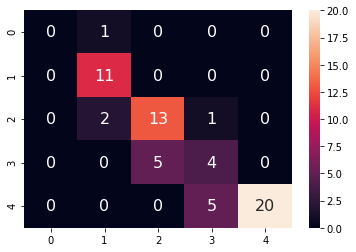

In [310]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

DTC_NSMO_NFS_casesNew = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_NSMO_NFS_casesNew.fit(X_casesNew_NFS_class_train,y_casesNew_NFS_class_train)
DTC_NSMO_NFS_casesNew_ypred = DTC_NSMO_NFS_casesNew.predict(X_casesNew_NFS_class_test)
DTC_NSMO_NFS_casesNew_confmax = confusion_matrix(y_casesNew_NFS_class_test,DTC_NSMO_NFS_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_NFS_class_test, DTC_NSMO_NFS_casesNew_ypred)))
print(classification_report(y_casesNew_NFS_class_test,DTC_NSMO_NFS_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_NSMO_NFS_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.79
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.73      1.00      0.85        11
           3       0.72      0.81      0.76        16
           4       0.50      0.44      0.47         9
           5       1.00      0.84      0.91        25

    accuracy                           0.79        62
   macro avg       0.59      0.62      0.60        62
weighted avg       0.79      0.79      0.78        62

Confusion matrix :


<AxesSubplot:>

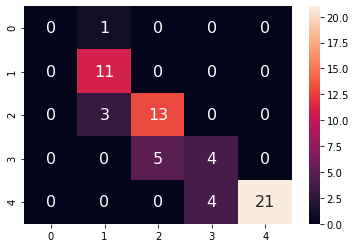

In [346]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

RFC_NSMO_NFS_casesNew = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_NSMO_NFS_casesNew.fit(X_casesNew_NFS_class_train,y_casesNew_NFS_class_train)
RFC_NSMO_NFS_casesNew_ypred = RFC_NSMO_NFS_casesNew.predict(X_casesNew_NFS_class_test)
RFC_NSMO_NFS_casesNew_confmax = confusion_matrix(y_casesNew_NFS_class_test,RFC_NSMO_NFS_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_NFS_class_test, RFC_NSMO_NFS_casesNew_ypred)))
print(classification_report(y_casesNew_NFS_class_test,RFC_NSMO_NFS_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_NSMO_NFS_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.76
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.61      1.00      0.76        11
           3       0.67      0.50      0.57        16
           4       0.56      0.56      0.56         9
           5       1.00      0.92      0.96        25

    accuracy                           0.76        62
   macro avg       0.57      0.60      0.57        62
weighted avg       0.76      0.76      0.75        62

Confusion matrix :


<AxesSubplot:>

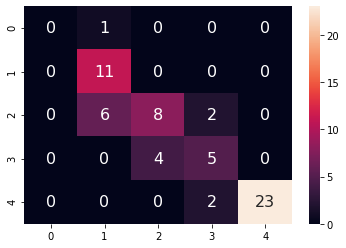

In [317]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

SVC_NSMO_NFS_casesNew = SVC(kernel='linear',random_state=0)
SVC_NSMO_NFS_casesNew.fit(X_casesNew_NFS_class_train,y_casesNew_NFS_class_train)
SVC_NSMO_NFS_casesNew_ypred = SVC_NSMO_NFS_casesNew.predict(X_casesNew_NFS_class_test)
SVC_NSMO_NFS_casesNew_confmax = confusion_matrix(y_casesNew_NFS_class_test,SVC_NSMO_NFS_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_NFS_class_test, SVC_NSMO_NFS_casesNew_ypred)))
print(classification_report(y_casesNew_NFS_class_test,SVC_NSMO_NFS_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_NSMO_NFS_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.73
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.67      0.91      0.77        11
           3       0.62      0.62      0.62        16
           4       0.38      0.33      0.35         9
           5       0.96      0.88      0.92        25

    accuracy                           0.73        62
   macro avg       0.52      0.55      0.53        62
weighted avg       0.72      0.73      0.72        62

Confusion matrix :


<AxesSubplot:>

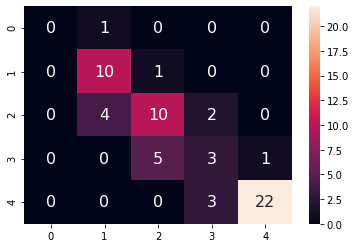

In [321]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

NB_NSMO_NFS_casesNew = GaussianNB()
NB_NSMO_NFS_casesNew.fit(X_casesNew_NFS_class_train,y_casesNew_NFS_class_train)
NB_NSMO_NFS_casesNew_ypred = NB_NSMO_NFS_casesNew.predict(X_casesNew_NFS_class_test)
NB_NSMO_NFS_casesNew_confmax = confusion_matrix(y_casesNew_NFS_class_test,NB_NSMO_NFS_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_NFS_class_test, NB_NSMO_NFS_casesNew_ypred)))
print(classification_report(y_casesNew_NFS_class_test,NB_NSMO_NFS_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(NB_NSMO_NFS_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.73
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.61      1.00      0.76        11
           3       0.70      0.44      0.54        16
           4       0.46      0.67      0.55         9
           5       1.00      0.84      0.91        25

    accuracy                           0.73        62
   macro avg       0.55      0.59      0.55        62
weighted avg       0.76      0.73      0.72        62

Confusion matrix :


<AxesSubplot:>

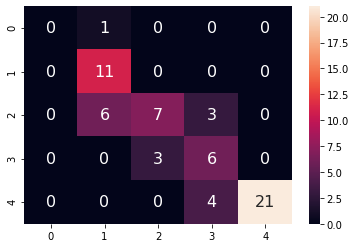

In [325]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

KNN_NSMO_NFS_casesNew = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_NSMO_NFS_casesNew.fit(X_casesNew_NFS_class_train,y_casesNew_NFS_class_train)
KNN_NSMO_NFS_casesNew_ypred = KNN_NSMO_NFS_casesNew.predict(X_casesNew_NFS_class_test)
KNN_NSMO_NFS_casesNew_confmax = confusion_matrix(y_casesNew_NFS_class_test,KNN_NSMO_NFS_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_NFS_class_test, KNN_NSMO_NFS_casesNew_ypred)))
print(classification_report(y_casesNew_NFS_class_test,KNN_NSMO_NFS_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_NSMO_NFS_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### B) Top 30 Feature

In [234]:
X_casesNew_T30_class_train, X_casesNew_T30_class_test, y_casesNew_T30_class_train, y_casesNew_T30_class_test = train_test_split(X_casesNew_FI_30,y_casesNew_class,test_size=0.25,random_state=0)

sdc = StandardScaler()

X_casesNew_T30_class_train = sdc.fit_transform(X_casesNew_T30_class_train)
X_casesNew_T30_class_test = sdc.fit_transform(X_casesNew_T30_class_test)

Accuracy = 0.73
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.65      1.00      0.79        11
           3       0.64      0.56      0.60        16
           4       0.45      0.56      0.50         9
           5       1.00      0.80      0.89        25

    accuracy                           0.73        62
   macro avg       0.55      0.58      0.55        62
weighted avg       0.75      0.73      0.73        62

Confusion matrix :


<AxesSubplot:>

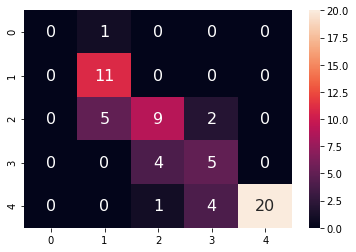

In [235]:
# Decision Tree Classifier
DTC_NSMO_T30_casesNew = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_NSMO_T30_casesNew.fit(X_casesNew_T30_class_train,y_casesNew_T30_class_train)
DTC_NSMO_T30_casesNew_ypred = DTC_NSMO_T30_casesNew.predict(X_casesNew_T30_class_test)
DTC_NSMO_T30_casesNew_confmax = confusion_matrix(y_casesNew_T30_class_test,DTC_NSMO_T30_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T30_class_test, DTC_NSMO_T30_casesNew_ypred)))
print(classification_report(y_casesNew_T30_class_test,DTC_NSMO_T30_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_NSMO_T30_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.74
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.69      1.00      0.81        11
           3       0.67      0.62      0.65        16
           4       0.40      0.44      0.42         9
           5       1.00      0.84      0.91        25

    accuracy                           0.74        62
   macro avg       0.55      0.58      0.56        62
weighted avg       0.76      0.74      0.74        62

Confusion matrix :


<AxesSubplot:>

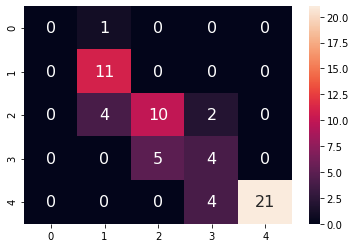

In [347]:
# Random Forest Classifier
RFC_NSMO_T30_casesNew = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_NSMO_T30_casesNew.fit(X_casesNew_T30_class_train,y_casesNew_T30_class_train)
RFC_NSMO_T30_casesNew_ypred = RFC_NSMO_T30_casesNew.predict(X_casesNew_T30_class_test)
RFC_NSMO_T30_casesNew_confmax = confusion_matrix(y_casesNew_T30_class_test,RFC_NSMO_T30_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T30_class_test, RFC_NSMO_T30_casesNew_ypred)))
print(classification_report(y_casesNew_T30_class_test,RFC_NSMO_T30_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_NSMO_T30_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.73
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.61      1.00      0.76        11
           3       0.70      0.44      0.54        16
           4       0.45      0.56      0.50         9
           5       0.96      0.88      0.92        25

    accuracy                           0.73        62
   macro avg       0.54      0.57      0.54        62
weighted avg       0.74      0.73      0.72        62

Confusion matrix :


<AxesSubplot:>

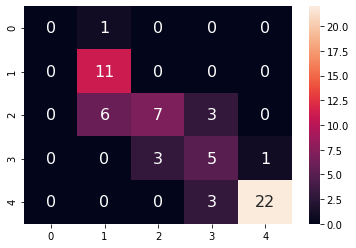

In [318]:
# Support Vector Machine
SVC_NSMO_T30_casesNew = SVC(kernel='linear',random_state=0)
SVC_NSMO_T30_casesNew.fit(X_casesNew_T30_class_train,y_casesNew_T30_class_train)
SVC_NSMO_T30_casesNew_ypred = SVC_NSMO_T30_casesNew.predict(X_casesNew_T30_class_test)
SVC_NSMO_T30_casesNew_confmax = confusion_matrix(y_casesNew_T30_class_test,SVC_NSMO_T30_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T30_class_test, SVC_NSMO_T30_casesNew_ypred)))
print(classification_report(y_casesNew_T30_class_test,SVC_NSMO_T30_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_NSMO_T30_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.71
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.62      0.91      0.74        11
           3       0.60      0.56      0.58        16
           4       0.38      0.33      0.35         9
           5       0.96      0.88      0.92        25

    accuracy                           0.71        62
   macro avg       0.51      0.54      0.52        62
weighted avg       0.71      0.71      0.70        62

Confusion matrix :


<AxesSubplot:>

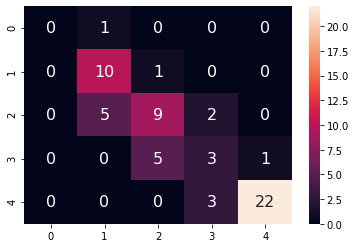

In [322]:
# Naive Bayes
NB_NSMO_T30_casesNew = GaussianNB()
NB_NSMO_T30_casesNew.fit(X_casesNew_T30_class_train,y_casesNew_T30_class_train)
NB_NSMO_T30_casesNew_ypred = NB_NSMO_T30_casesNew.predict(X_casesNew_T30_class_test)
NB_NSMO_T30_casesNew_confmax = confusion_matrix(y_casesNew_T30_class_test,NB_NSMO_T30_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T30_class_test, NB_NSMO_T30_casesNew_ypred)))
print(classification_report(y_casesNew_T30_class_test,NB_NSMO_T30_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(NB_NSMO_T30_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.71
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.61      1.00      0.76        11
           3       0.67      0.38      0.48        16
           4       0.42      0.56      0.48         9
           5       0.96      0.88      0.92        25

    accuracy                           0.71        62
   macro avg       0.53      0.56      0.53        62
weighted avg       0.73      0.71      0.70        62

Confusion matrix :


<AxesSubplot:>

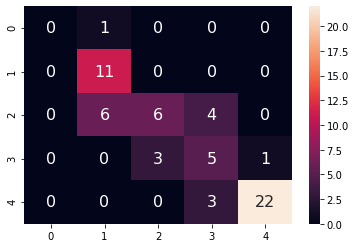

In [326]:
# KNN
KNN_NSMO_T30_casesNew = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_NSMO_T30_casesNew.fit(X_casesNew_T30_class_train,y_casesNew_T30_class_train)
KNN_NSMO_T30_casesNew_ypred = KNN_NSMO_T30_casesNew.predict(X_casesNew_T30_class_test)
KNN_NSMO_T30_casesNew_confmax = confusion_matrix(y_casesNew_T30_class_test,KNN_NSMO_T30_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T30_class_test, KNN_NSMO_T30_casesNew_ypred)))
print(classification_report(y_casesNew_T30_class_test,KNN_NSMO_T30_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_NSMO_T30_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### C) Top 50 Feature

In [238]:
X_casesNew_T50_class_train, X_casesNew_T50_class_test, y_casesNew_T50_class_train, y_casesNew_T50_class_test = train_test_split(X_casesNew_FI_50,y_casesNew_class,test_size=0.25,random_state=0)

sdc = StandardScaler()

X_casesNew_T50_class_train = sdc.fit_transform(X_casesNew_T50_class_train)
X_casesNew_T50_class_test = sdc.fit_transform(X_casesNew_T50_class_test)

Accuracy = 0.77
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11
           3       0.72      0.81      0.76        16
           4       0.40      0.44      0.42         9
           5       1.00      0.80      0.89        25

    accuracy                           0.77        62
   macro avg       0.58      0.61      0.59        62
weighted avg       0.79      0.77      0.77        62

Confusion matrix :


<AxesSubplot:>

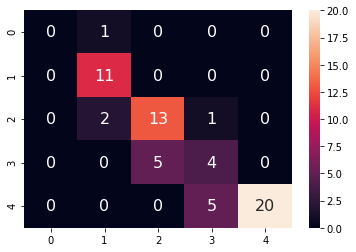

In [239]:
# Decision Tree Classifier
DTC_NSMO_T50_casesNew = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_NSMO_T50_casesNew.fit(X_casesNew_T50_class_train,y_casesNew_T50_class_train)
DTC_NSMO_T50_casesNew_ypred = DTC_NSMO_T50_casesNew.predict(X_casesNew_T50_class_test)
DTC_NSMO_T50_casesNew_confmax = confusion_matrix(y_casesNew_T50_class_test,DTC_NSMO_T50_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T50_class_test, DTC_NSMO_T50_casesNew_ypred)))
print(classification_report(y_casesNew_T50_class_test,DTC_NSMO_T50_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_NSMO_T50_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.79
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.73      1.00      0.85        11
           3       0.72      0.81      0.76        16
           4       0.50      0.44      0.47         9
           5       1.00      0.84      0.91        25

    accuracy                           0.79        62
   macro avg       0.59      0.62      0.60        62
weighted avg       0.79      0.79      0.78        62

Confusion matrix :


<AxesSubplot:>

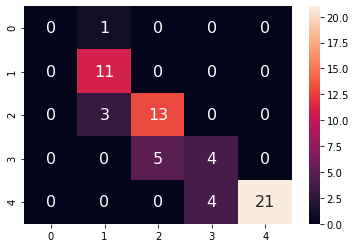

In [348]:
# Random Forest Classifier
RFC_NSMO_T50_casesNew = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_NSMO_T50_casesNew.fit(X_casesNew_T50_class_train,y_casesNew_T50_class_train)
RFC_NSMO_T50_casesNew_ypred = RFC_NSMO_T50_casesNew.predict(X_casesNew_T50_class_test)
RFC_NSMO_T50_casesNew_confmax = confusion_matrix(y_casesNew_T50_class_test,RFC_NSMO_T50_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T50_class_test, RFC_NSMO_T50_casesNew_ypred)))
print(classification_report(y_casesNew_T50_class_test,RFC_NSMO_T50_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_NSMO_T50_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.76
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.61      1.00      0.76        11
           3       0.67      0.50      0.57        16
           4       0.56      0.56      0.56         9
           5       1.00      0.92      0.96        25

    accuracy                           0.76        62
   macro avg       0.57      0.60      0.57        62
weighted avg       0.76      0.76      0.75        62

Confusion matrix :


<AxesSubplot:>

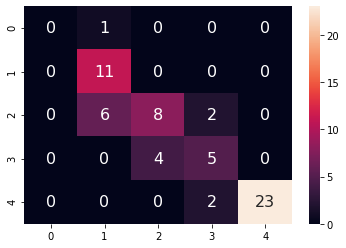

In [319]:
# Support Vector Machine
SVC_NSMO_T50_casesNew = SVC(kernel='linear',random_state=0)
SVC_NSMO_T50_casesNew.fit(X_casesNew_T50_class_train,y_casesNew_T50_class_train)
SVC_NSMO_T50_casesNew_ypred = SVC_NSMO_T50_casesNew.predict(X_casesNew_T50_class_test)
SVC_NSMO_T50_casesNew_confmax = confusion_matrix(y_casesNew_T50_class_test,SVC_NSMO_T50_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T50_class_test, SVC_NSMO_T50_casesNew_ypred)))
print(classification_report(y_casesNew_T50_class_test,SVC_NSMO_T50_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_NSMO_T50_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.73
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.67      0.91      0.77        11
           3       0.62      0.62      0.62        16
           4       0.38      0.33      0.35         9
           5       0.96      0.88      0.92        25

    accuracy                           0.73        62
   macro avg       0.52      0.55      0.53        62
weighted avg       0.72      0.73      0.72        62

Confusion matrix :


<AxesSubplot:>

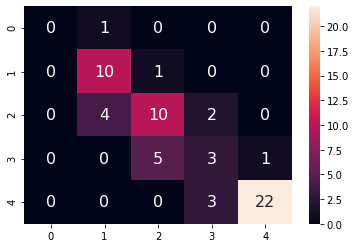

In [323]:
# Naive Bayes
NB_NSMO_T50_casesNew = GaussianNB()
NB_NSMO_T50_casesNew.fit(X_casesNew_T50_class_train,y_casesNew_T50_class_train)
NB_NSMO_T50_casesNew_ypred = NB_NSMO_T50_casesNew.predict(X_casesNew_T50_class_test)
NB_NSMO_T50_casesNew_confmax = confusion_matrix(y_casesNew_T50_class_test,NB_NSMO_T50_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T50_class_test, NB_NSMO_T50_casesNew_ypred)))
print(classification_report(y_casesNew_T50_class_test,NB_NSMO_T50_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(NB_NSMO_T50_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.73
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.61      1.00      0.76        11
           3       0.70      0.44      0.54        16
           4       0.46      0.67      0.55         9
           5       1.00      0.84      0.91        25

    accuracy                           0.73        62
   macro avg       0.55      0.59      0.55        62
weighted avg       0.76      0.73      0.72        62

Confusion matrix :


<AxesSubplot:>

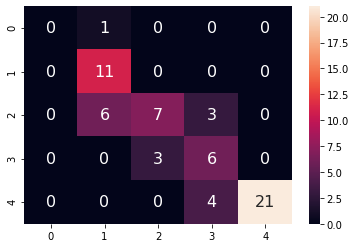

In [327]:
# KNN
KNN_NSMO_T50_casesNew = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_NSMO_T50_casesNew.fit(X_casesNew_T50_class_train,y_casesNew_T50_class_train)
KNN_NSMO_T50_casesNew_ypred = KNN_NSMO_T50_casesNew.predict(X_casesNew_T50_class_test)
KNN_NSMO_T50_casesNew_confmax = confusion_matrix(y_casesNew_T50_class_test,KNN_NSMO_T50_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T50_class_test, KNN_NSMO_T50_casesNew_ypred)))
print(classification_report(y_casesNew_T50_class_test,KNN_NSMO_T50_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_NSMO_T50_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### D) Top 100 Feature

In [240]:
X_casesNew_T100_class_train, X_casesNew_T100_class_test, y_casesNew_T100_class_train, y_casesNew_T100_class_test = train_test_split(X_casesNew_FI_100,y_casesNew_class,test_size=0.25,random_state=0)

sdc = StandardScaler()

X_casesNew_T100_class_train = sdc.fit_transform(X_casesNew_T100_class_train)
X_casesNew_T100_class_test = sdc.fit_transform(X_casesNew_T100_class_test)

Accuracy = 0.84
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11
           3       0.74      0.88      0.80        16
           4       0.75      0.33      0.46         9
           5       0.96      0.96      0.96        25

    accuracy                           0.84        62
   macro avg       0.65      0.63      0.62        62
weighted avg       0.83      0.84      0.82        62

Confusion matrix :


<AxesSubplot:>

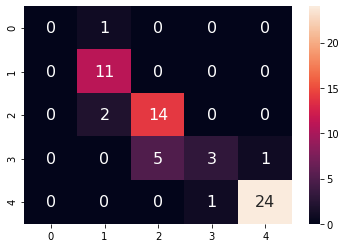

In [241]:
# Decision Tree Classifier
DTC_NSMO_T100_casesNew = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_NSMO_T100_casesNew.fit(X_casesNew_T100_class_train,y_casesNew_T100_class_train)
DTC_NSMO_T100_casesNew_ypred = DTC_NSMO_T100_casesNew.predict(X_casesNew_T100_class_test)
DTC_NSMO_T100_casesNew_confmax = confusion_matrix(y_casesNew_T100_class_test,DTC_NSMO_T100_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T100_class_test, DTC_NSMO_T100_casesNew_ypred)))
print(classification_report(y_casesNew_T100_class_test,DTC_NSMO_T100_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_NSMO_T100_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.77
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.73      1.00      0.85        11
           3       0.73      0.69      0.71        16
           4       0.45      0.56      0.50         9
           5       1.00      0.84      0.91        25

    accuracy                           0.77        62
   macro avg       0.58      0.62      0.59        62
weighted avg       0.79      0.77      0.77        62

Confusion matrix :


<AxesSubplot:>

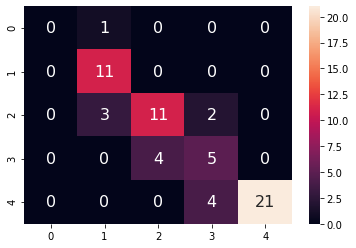

In [349]:
# Random Forest Classifier
RFC_NSMO_T100_casesNew = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_NSMO_T100_casesNew.fit(X_casesNew_T100_class_train,y_casesNew_T100_class_train)
RFC_NSMO_T100_casesNew_ypred = RFC_NSMO_T100_casesNew.predict(X_casesNew_T100_class_test)
RFC_NSMO_T100_casesNew_confmax = confusion_matrix(y_casesNew_T100_class_test,RFC_NSMO_T100_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T100_class_test, RFC_NSMO_T100_casesNew_ypred)))
print(classification_report(y_casesNew_T100_class_test,RFC_NSMO_T100_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_NSMO_T100_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.89
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.73      1.00      0.85        11
           3       0.93      0.81      0.87        16
           4       0.80      0.89      0.84         9
           5       1.00      0.92      0.96        25

    accuracy                           0.89        62
   macro avg       0.69      0.72      0.70        62
weighted avg       0.89      0.89      0.88        62

Confusion matrix :


<AxesSubplot:>

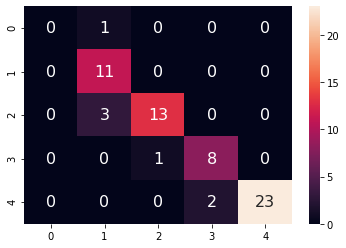

In [320]:
# Support Vector Machine
SVC_NSMO_T100_casesNew = SVC(kernel='linear',random_state=0)
SVC_NSMO_T100_casesNew.fit(X_casesNew_T100_class_train,y_casesNew_T100_class_train)
SVC_NSMO_T100_casesNew_ypred = SVC_NSMO_T100_casesNew.predict(X_casesNew_T100_class_test)
SVC_NSMO_T100_casesNew_confmax = confusion_matrix(y_casesNew_T100_class_test,SVC_NSMO_T100_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T100_class_test, SVC_NSMO_T100_casesNew_ypred)))
print(classification_report(y_casesNew_T100_class_test,SVC_NSMO_T100_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_NSMO_T100_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.76
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.77      0.91      0.83        11
           3       0.67      0.75      0.71        16
           4       0.38      0.33      0.35         9
           5       0.96      0.88      0.92        25

    accuracy                           0.76        62
   macro avg       0.55      0.57      0.56        62
weighted avg       0.75      0.76      0.75        62

Confusion matrix :


<AxesSubplot:>

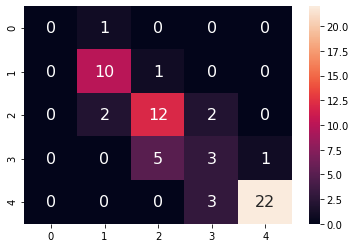

In [324]:
# Naive Bayes
NB_NSMO_T100_casesNew = GaussianNB()
NB_NSMO_T100_casesNew.fit(X_casesNew_T100_class_train,y_casesNew_T100_class_train)
NB_NSMO_T100_casesNew_ypred = NB_NSMO_T100_casesNew.predict(X_casesNew_T100_class_test)
NB_NSMO_T100_casesNew_confmax = confusion_matrix(y_casesNew_T100_class_test,NB_NSMO_T100_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T100_class_test, NB_NSMO_T100_casesNew_ypred)))
print(classification_report(y_casesNew_T100_class_test,NB_NSMO_T100_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(NB_NSMO_T100_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.71
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.65      1.00      0.79        11
           3       0.70      0.44      0.54        16
           4       0.38      0.56      0.45         9
           5       0.95      0.84      0.89        25

    accuracy                           0.71        62
   macro avg       0.54      0.57      0.53        62
weighted avg       0.74      0.71      0.70        62

Confusion matrix :


<AxesSubplot:>

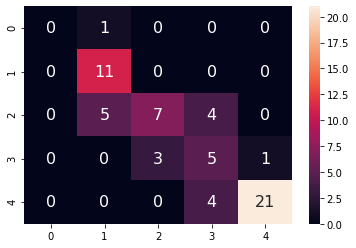

In [328]:
# KNN
KNN_NSMO_T100_casesNew = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_NSMO_T100_casesNew.fit(X_casesNew_T100_class_train,y_casesNew_T100_class_train)
KNN_NSMO_T100_casesNew_ypred = KNN_NSMO_T100_casesNew.predict(X_casesNew_T100_class_test)
KNN_NSMO_T100_casesNew_confmax = confusion_matrix(y_casesNew_T100_class_test,KNN_NSMO_T100_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T100_class_test, KNN_NSMO_T100_casesNew_ypred)))
print(classification_report(y_casesNew_T100_class_test,KNN_NSMO_T100_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_NSMO_T100_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

### II) SMOTE

In [393]:
#Perform Over-Sampling using SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)

#### A) No Feature Selection

In [409]:
X_casesNew_NFS_class_train_SMO, X_casesNew_NFS_class_test_SMO, y_casesNew_NFS_class_train_SMO, y_casesNew_NFS_class_test_SMO = train_test_split(X_casesNew_FI,y_casesNew_class.ravel(),test_size=0.25,random_state=0)

col_NFS_casesNew = X_casesNew_NFS_class_train_SMO.columns
X_casesNew_NFS_class_train_SMO_cp, y_casesNew_NFS_class_train_SMO_cp = smt.fit_resample(X_casesNew_NFS_class_train_SMO,y_casesNew_NFS_class_train_SMO)
#X_casesNew_NFS_class_train_SMO_cp = pd.DataFrame(data=X_casesNew_NFS_class_train_SMO_cp, columns=col_NFS_casesNew)
#y_casesNew_NFS_class_train_SMO_cp = pd.DataFrame(data=y_casesNew_NFS_class_train_SMO_cp, columns=['cases_sev'])
#y_casesNew_NFS_class_train_SMO_cp['cases_sev'].value_counts()

Accuracy = 0.89
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11
           3       0.82      0.88      0.85        16
           4       0.80      0.89      0.84         9
           5       1.00      0.88      0.94        25

    accuracy                           0.89        62
   macro avg       0.69      0.73      0.71        62
weighted avg       0.88      0.89      0.88        62

Confusion matrix :


<AxesSubplot:>

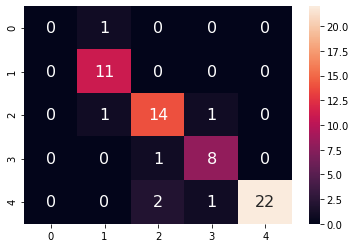

In [410]:
DTC_SMOTE_NFS_casesNew = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_SMOTE_NFS_casesNew.fit(X_casesNew_NFS_class_train_SMO_cp,y_casesNew_NFS_class_train_SMO_cp)
DTC_SMOTE_NFS_casesNew_ypred = DTC_SMOTE_NFS_casesNew.predict(X_casesNew_NFS_class_test_SMO)
DTC_SMOTE_NFS_casesNew_confmax = confusion_matrix(y_casesNew_NFS_class_test_SMO,DTC_SMOTE_NFS_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_NFS_class_test_SMO, DTC_SMOTE_NFS_casesNew_ypred)))
print(classification_report(y_casesNew_NFS_class_test_SMO,DTC_SMOTE_NFS_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_SMOTE_NFS_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.87
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11
           3       1.00      0.75      0.86        16
           4       0.64      1.00      0.78         9
           5       1.00      0.88      0.94        25

    accuracy                           0.87        62
   macro avg       0.69      0.73      0.69        62
weighted avg       0.89      0.87      0.87        62

Confusion matrix :


<AxesSubplot:>

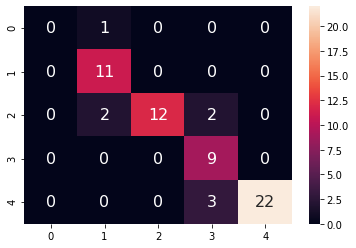

In [419]:
# Random Forest Classifier
RFC_SMOTE_NFS_casesNew = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_SMOTE_NFS_casesNew.fit(X_casesNew_NFS_class_train_SMO_cp,y_casesNew_NFS_class_train_SMO_cp)
RFC_SMOTE_NFS_casesNew_ypred = RFC_SMOTE_NFS_casesNew.predict(X_casesNew_NFS_class_test_SMO)
RFC_SMOTE_NFS_casesNew_confmax = confusion_matrix(y_casesNew_NFS_class_test_SMO,RFC_SMOTE_NFS_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_NFS_class_test_SMO, RFC_SMOTE_NFS_casesNew_ypred)))
print(classification_report(y_casesNew_NFS_class_test_SMO,RFC_SMOTE_NFS_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_SMOTE_NFS_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.85
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11
           3       1.00      0.69      0.81        16
           4       0.62      0.89      0.73         9
           5       0.96      0.92      0.94        25

    accuracy                           0.85        62
   macro avg       0.67      0.70      0.67        62
weighted avg       0.87      0.85      0.85        62

Confusion matrix :


<AxesSubplot:>

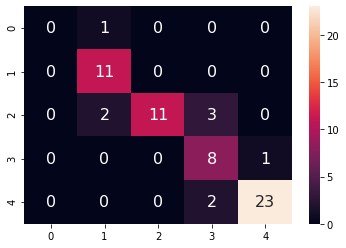

In [423]:
# Support Vector Machine
SVC_SMOTE_NFS_casesNew = SVC(kernel='linear',random_state=0)
SVC_SMOTE_NFS_casesNew.fit(X_casesNew_NFS_class_train_SMO_cp,y_casesNew_NFS_class_train_SMO_cp)
SVC_SMOTE_NFS_casesNew_ypred = SVC_SMOTE_NFS_casesNew.predict(X_casesNew_NFS_class_test_SMO)
SVC_SMOTE_NFS_casesNew_confmax = confusion_matrix(y_casesNew_NFS_class_test_SMO,SVC_SMOTE_NFS_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_NFS_class_test_SMO, SVC_SMOTE_NFS_casesNew_ypred)))
print(classification_report(y_casesNew_NFS_class_test_SMO,SVC_SMOTE_NFS_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_SMOTE_NFS_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.77      0.91      0.83        11
           3       0.79      0.69      0.73        16
           4       0.54      0.78      0.64         9
           5       1.00      0.88      0.94        25

    accuracy                           0.81        62
   macro avg       0.62      0.65      0.63        62
weighted avg       0.82      0.81      0.81        62

Confusion matrix :


<AxesSubplot:>

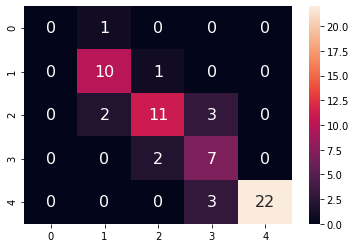

In [427]:
# Naive Bayes
NB_SMOTE_NFS_casesNew = GaussianNB()
NB_SMOTE_NFS_casesNew.fit(X_casesNew_NFS_class_train_SMO_cp,y_casesNew_NFS_class_train_SMO_cp)
NB_SMOTE_NFS_casesNew_ypred = NB_SMOTE_NFS_casesNew.predict(X_casesNew_NFS_class_test_SMO)
NB_SMOTE_NFS_casesNew_confmax = confusion_matrix(y_casesNew_NFS_class_test_SMO,NB_SMOTE_NFS_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_NFS_class_test_SMO, NB_SMOTE_NFS_casesNew_ypred)))
print(classification_report(y_casesNew_NFS_class_test_SMO,NB_SMOTE_NFS_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(NB_SMOTE_NFS_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.82
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11
           3       0.91      0.62      0.74        16
           4       0.50      0.89      0.64         9
           5       1.00      0.88      0.94        25

    accuracy                           0.82        62
   macro avg       0.65      0.68      0.65        62
weighted avg       0.86      0.82      0.82        62

Confusion matrix :


<AxesSubplot:>

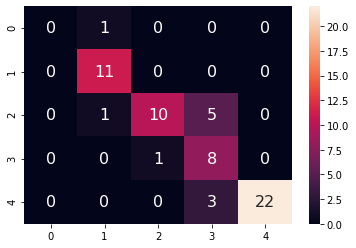

In [431]:
# KNN
KNN_SMOTE_NFS_casesNew = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_SMOTE_NFS_casesNew.fit(X_casesNew_NFS_class_train_SMO_cp,y_casesNew_NFS_class_train_SMO_cp)
KNN_SMOTE_NFS_casesNew_ypred = KNN_SMOTE_NFS_casesNew.predict(X_casesNew_NFS_class_test_SMO)
KNN_SMOTE_NFS_casesNew_confmax = confusion_matrix(y_casesNew_NFS_class_test_SMO,KNN_SMOTE_NFS_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_NFS_class_test_SMO, KNN_SMOTE_NFS_casesNew_ypred)))
print(classification_report(y_casesNew_NFS_class_test_SMO,KNN_SMOTE_NFS_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_SMOTE_NFS_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### B) Top 30 Feature

In [413]:
X_casesNew_T30_class_train_SMO, X_casesNew_T30_class_test_SMO, y_casesNew_T30_class_train_SMO, y_casesNew_T30_class_test_SMO = train_test_split(X_casesNew_FI_30,y_casesNew_class.ravel(),test_size=0.25,random_state=0)

col_T30_casesNew = X_casesNew_T30_class_train_SMO.columns
X_casesNew_T30_class_train_SMO_cp, y_casesNew_T30_class_train_SMO_cp = smt.fit_resample(X_casesNew_T30_class_train_SMO,y_casesNew_T30_class_train_SMO)

Accuracy = 0.79
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11
           3       0.73      0.69      0.71        16
           4       0.50      0.56      0.53         9
           5       0.96      0.88      0.92        25

    accuracy                           0.79        62
   macro avg       0.60      0.62      0.61        62
weighted avg       0.79      0.79      0.79        62

Confusion matrix :


<AxesSubplot:>

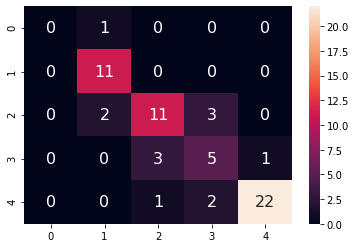

In [414]:
# Decision Tree Classifier
DTC_SMOTE_T30_casesNew = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_SMOTE_T30_casesNew.fit(X_casesNew_T30_class_train_SMO_cp,y_casesNew_T30_class_train_SMO_cp)
DTC_SMOTE_T30_casesNew_ypred = DTC_SMOTE_T30_casesNew.predict(X_casesNew_T30_class_test_SMO)
DTC_SMOTE_T30_casesNew_confmax = confusion_matrix(y_casesNew_T30_class_test_SMO,DTC_SMOTE_T30_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T30_class_test_SMO, DTC_SMOTE_T30_casesNew_ypred)))
print(classification_report(y_casesNew_T30_class_test_SMO,DTC_SMOTE_T30_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_SMOTE_T30_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11
           3       0.82      0.56      0.67        16
           4       0.50      0.78      0.61         9
           5       1.00      0.92      0.96        25

    accuracy                           0.81        62
   macro avg       0.62      0.65      0.62        62
weighted avg       0.83      0.81      0.80        62

Confusion matrix :


<AxesSubplot:>

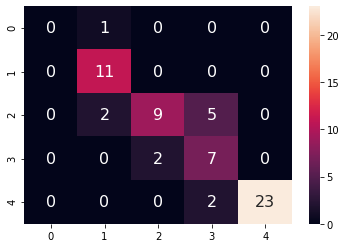

In [420]:
# Random Forest Classifier
RFC_SMOTE_T30_casesNew = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_SMOTE_T30_casesNew.fit(X_casesNew_T30_class_train_SMO_cp,y_casesNew_T30_class_train_SMO_cp)
RFC_SMOTE_T30_casesNew_ypred = RFC_SMOTE_T30_casesNew.predict(X_casesNew_T30_class_test_SMO)
RFC_SMOTE_T30_casesNew_confmax = confusion_matrix(y_casesNew_T30_class_test_SMO,RFC_SMOTE_T30_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T30_class_test_SMO, RFC_SMOTE_T30_casesNew_ypred)))
print(classification_report(y_casesNew_T30_class_test_SMO,RFC_SMOTE_T30_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_SMOTE_T30_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.73      1.00      0.85        11
           3       0.77      0.62      0.69        16
           4       0.55      0.67      0.60         9
           5       1.00      0.92      0.96        25

    accuracy                           0.81        62
   macro avg       0.61      0.64      0.62        62
weighted avg       0.81      0.81      0.80        62

Confusion matrix :


<AxesSubplot:>

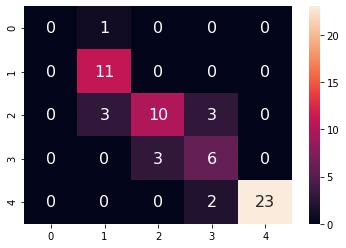

In [424]:
# Support Vector Machine
SVC_SMOTE_T30_casesNew = SVC(kernel='linear',random_state=0)
SVC_SMOTE_T30_casesNew.fit(X_casesNew_T30_class_train_SMO_cp,y_casesNew_T30_class_train_SMO_cp)
SVC_SMOTE_T30_casesNew_ypred = SVC_SMOTE_T30_casesNew.predict(X_casesNew_T30_class_test_SMO)
SVC_SMOTE_T30_casesNew_confmax = confusion_matrix(y_casesNew_T30_class_test_SMO,SVC_SMOTE_T30_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T30_class_test_SMO, SVC_SMOTE_T30_casesNew_ypred)))
print(classification_report(y_casesNew_T30_class_test_SMO,SVC_SMOTE_T30_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_SMOTE_T30_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.77
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.77      0.91      0.83        11
           3       0.69      0.69      0.69        16
           4       0.44      0.44      0.44         9
           5       0.96      0.92      0.94        25

    accuracy                           0.77        62
   macro avg       0.57      0.59      0.58        62
weighted avg       0.76      0.77      0.77        62

Confusion matrix :


<AxesSubplot:>

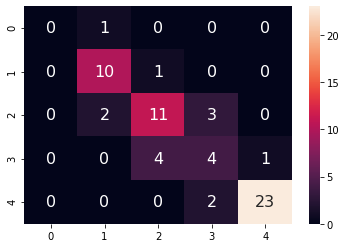

In [428]:
# Naive Bayes
NB_SMOTE_T30_casesNew = GaussianNB()
NB_SMOTE_T30_casesNew.fit(X_casesNew_T30_class_train_SMO_cp,y_casesNew_T30_class_train_SMO_cp)
NB_SMOTE_T30_casesNew_ypred = NB_SMOTE_T30_casesNew.predict(X_casesNew_T30_class_test_SMO)
NB_SMOTE_T30_casesNew_confmax = confusion_matrix(y_casesNew_T30_class_test_SMO,NB_SMOTE_T30_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T30_class_test_SMO, NB_SMOTE_T30_casesNew_ypred)))
print(classification_report(y_casesNew_T30_class_test_SMO,NB_SMOTE_T30_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(NB_SMOTE_T30_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.73
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11
           3       0.60      0.38      0.46        16
           4       0.47      0.78      0.58         9
           5       0.91      0.84      0.87        25

    accuracy                           0.73        62
   macro avg       0.55      0.60      0.56        62
weighted avg       0.73      0.73      0.71        62

Confusion matrix :


<AxesSubplot:>

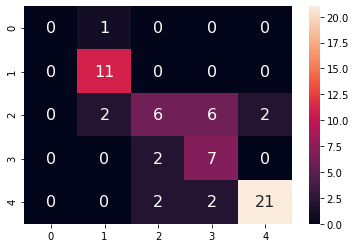

In [432]:
# KNN
KNN_SMOTE_T30_casesNew = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_SMOTE_T30_casesNew.fit(X_casesNew_T30_class_train_SMO_cp,y_casesNew_T30_class_train_SMO_cp)
KNN_SMOTE_T30_casesNew_ypred = KNN_SMOTE_T30_casesNew.predict(X_casesNew_T30_class_test_SMO)
KNN_SMOTE_T30_casesNew_confmax = confusion_matrix(y_casesNew_T30_class_test_SMO,KNN_SMOTE_T30_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T30_class_test_SMO, KNN_SMOTE_T30_casesNew_ypred)))
print(classification_report(y_casesNew_T30_class_test_SMO,KNN_SMOTE_T30_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_SMOTE_T30_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### C) Top 50 Feature

In [415]:
X_casesNew_T50_class_train_SMO, X_casesNew_T50_class_test_SMO, y_casesNew_T50_class_train_SMO, y_casesNew_T50_class_test_SMO = train_test_split(X_casesNew_FI_50,y_casesNew_class.ravel(),test_size=0.25,random_state=0)

col_T50_casesNew = X_casesNew_T50_class_train_SMO.columns
X_casesNew_T50_class_train_SMO_cp, y_casesNew_T50_class_train_SMO_cp = smt.fit_resample(X_casesNew_T50_class_train_SMO,y_casesNew_T50_class_train_SMO)

Accuracy = 0.89
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11
           3       0.82      0.88      0.85        16
           4       0.80      0.89      0.84         9
           5       1.00      0.88      0.94        25

    accuracy                           0.89        62
   macro avg       0.69      0.73      0.71        62
weighted avg       0.88      0.89      0.88        62

Confusion matrix :


<AxesSubplot:>

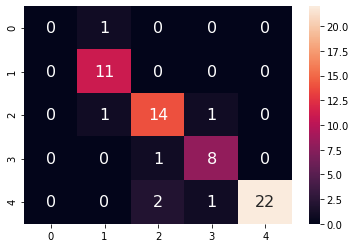

In [416]:
# Decision Tree Classifier
DTC_SMOTE_T50_casesNew = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_SMOTE_T50_casesNew.fit(X_casesNew_T50_class_train_SMO_cp,y_casesNew_T50_class_train_SMO_cp)
DTC_SMOTE_T50_casesNew_ypred = DTC_SMOTE_T50_casesNew.predict(X_casesNew_T50_class_test_SMO)
DTC_SMOTE_T50_casesNew_confmax = confusion_matrix(y_casesNew_T50_class_test_SMO,DTC_SMOTE_T50_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T50_class_test_SMO, DTC_SMOTE_T50_casesNew_ypred)))
print(classification_report(y_casesNew_T50_class_test_SMO,DTC_SMOTE_T50_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_SMOTE_T50_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.87
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11
           3       1.00      0.75      0.86        16
           4       0.64      1.00      0.78         9
           5       1.00      0.88      0.94        25

    accuracy                           0.87        62
   macro avg       0.69      0.73      0.69        62
weighted avg       0.89      0.87      0.87        62

Confusion matrix :


<AxesSubplot:>

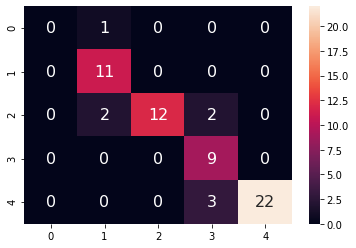

In [421]:
# Random Forest Classifier
RFC_SMOTE_T50_casesNew = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_SMOTE_T50_casesNew.fit(X_casesNew_T50_class_train_SMO_cp,y_casesNew_T50_class_train_SMO_cp)
RFC_SMOTE_T50_casesNew_ypred = RFC_SMOTE_T50_casesNew.predict(X_casesNew_T50_class_test_SMO)
RFC_SMOTE_T50_casesNew_confmax = confusion_matrix(y_casesNew_T50_class_test_SMO,RFC_SMOTE_T50_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T50_class_test_SMO, RFC_SMOTE_T50_casesNew_ypred)))
print(classification_report(y_casesNew_T50_class_test_SMO,RFC_SMOTE_T50_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_SMOTE_T50_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.85
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11
           3       1.00      0.69      0.81        16
           4       0.62      0.89      0.73         9
           5       0.96      0.92      0.94        25

    accuracy                           0.85        62
   macro avg       0.67      0.70      0.67        62
weighted avg       0.87      0.85      0.85        62

Confusion matrix :


<AxesSubplot:>

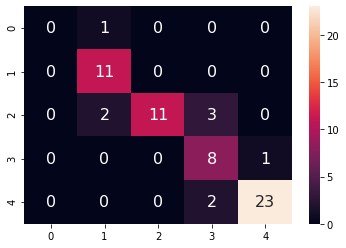

In [425]:
# Support Vector Machine
SVC_SMOTE_T50_casesNew = SVC(kernel='linear',random_state=0)
SVC_SMOTE_T50_casesNew.fit(X_casesNew_T50_class_train_SMO_cp,y_casesNew_T50_class_train_SMO_cp)
SVC_SMOTE_T50_casesNew_ypred = SVC_SMOTE_T50_casesNew.predict(X_casesNew_T50_class_test_SMO)
SVC_SMOTE_T50_casesNew_confmax = confusion_matrix(y_casesNew_T50_class_test_SMO,SVC_SMOTE_T50_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T50_class_test_SMO, SVC_SMOTE_T50_casesNew_ypred)))
print(classification_report(y_casesNew_T50_class_test_SMO,SVC_SMOTE_T50_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_SMOTE_T50_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.77      0.91      0.83        11
           3       0.79      0.69      0.73        16
           4       0.54      0.78      0.64         9
           5       1.00      0.88      0.94        25

    accuracy                           0.81        62
   macro avg       0.62      0.65      0.63        62
weighted avg       0.82      0.81      0.81        62

Confusion matrix :


<AxesSubplot:>

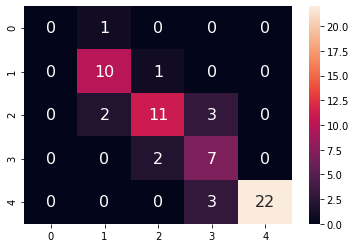

In [429]:
# Naive Bayes
NB_SMOTE_T50_casesNew = GaussianNB()
NB_SMOTE_T50_casesNew.fit(X_casesNew_T50_class_train_SMO_cp,y_casesNew_T50_class_train_SMO_cp)
NB_SMOTE_T50_casesNew_ypred = NB_SMOTE_T50_casesNew.predict(X_casesNew_T50_class_test_SMO)
NB_SMOTE_T50_casesNew_confmax = confusion_matrix(y_casesNew_T50_class_test_SMO,NB_SMOTE_T50_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T50_class_test_SMO, NB_SMOTE_T50_casesNew_ypred)))
print(classification_report(y_casesNew_T50_class_test_SMO,NB_SMOTE_T50_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(NB_SMOTE_T50_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.82
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11
           3       0.91      0.62      0.74        16
           4       0.50      0.89      0.64         9
           5       1.00      0.88      0.94        25

    accuracy                           0.82        62
   macro avg       0.65      0.68      0.65        62
weighted avg       0.86      0.82      0.82        62

Confusion matrix :


<AxesSubplot:>

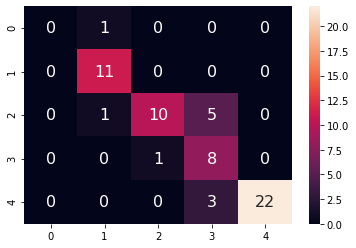

In [433]:
# KNN
KNN_SMOTE_T50_casesNew = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_SMOTE_T50_casesNew.fit(X_casesNew_T50_class_train_SMO_cp,y_casesNew_T50_class_train_SMO_cp)
KNN_SMOTE_T50_casesNew_ypred = KNN_SMOTE_T50_casesNew.predict(X_casesNew_T50_class_test_SMO)
KNN_SMOTE_T50_casesNew_confmax = confusion_matrix(y_casesNew_T50_class_test_SMO,KNN_SMOTE_T50_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T50_class_test_SMO, KNN_SMOTE_T50_casesNew_ypred)))
print(classification_report(y_casesNew_T50_class_test_SMO,KNN_SMOTE_T50_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_SMOTE_T50_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### D) Top 100 Feature

In [417]:
X_casesNew_T100_class_train_SMO, X_casesNew_T100_class_test_SMO, y_casesNew_T100_class_train_SMO, y_casesNew_T100_class_test_SMO = train_test_split(X_casesNew_FI_100,y_casesNew_class.ravel(),test_size=0.25,random_state=0)

col_T100_casesNew = X_casesNew_T100_class_train_SMO.columns
X_casesNew_T100_class_train_SMO_cp, y_casesNew_T100_class_train_SMO_cp = smt.fit_resample(X_casesNew_T100_class_train_SMO,y_casesNew_T100_class_train_SMO)

Accuracy = 0.89
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11
           3       0.93      0.81      0.87        16
           4       0.88      0.78      0.82         9
           5       0.89      0.96      0.92        25

    accuracy                           0.89        62
   macro avg       0.71      0.71      0.71        62
weighted avg       0.88      0.89      0.88        62

Confusion matrix :


<AxesSubplot:>

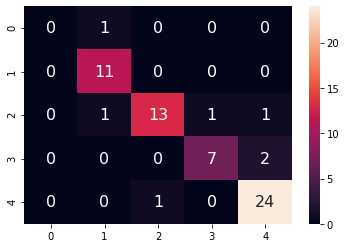

In [418]:
# Decision Tree Classifier
DTC_SMOTE_T100_casesNew = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_SMOTE_T100_casesNew.fit(X_casesNew_T100_class_train_SMO_cp,y_casesNew_T100_class_train_SMO_cp)
DTC_SMOTE_T100_casesNew_ypred = DTC_SMOTE_T100_casesNew.predict(X_casesNew_T100_class_test_SMO)
DTC_SMOTE_T100_casesNew_confmax = confusion_matrix(y_casesNew_T100_class_test_SMO,DTC_SMOTE_T100_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T100_class_test_SMO, DTC_SMOTE_T100_casesNew_ypred)))
print(classification_report(y_casesNew_T100_class_test_SMO,DTC_SMOTE_T100_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_SMOTE_T100_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.84
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11
           3       1.00      0.75      0.86        16
           4       0.57      0.89      0.70         9
           5       0.95      0.84      0.89        25

    accuracy                           0.84        62
   macro avg       0.66      0.70      0.67        62
weighted avg       0.87      0.84      0.84        62

Confusion matrix :


<AxesSubplot:>

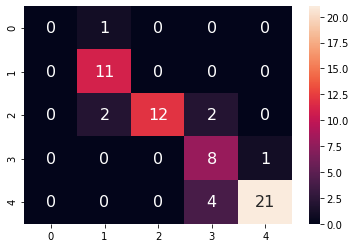

In [422]:
# Random Forest Classifier
RFC_SMOTE_T100_casesNew = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_SMOTE_T100_casesNew.fit(X_casesNew_T100_class_train_SMO_cp,y_casesNew_T100_class_train_SMO_cp)
RFC_SMOTE_T100_casesNew_ypred = RFC_SMOTE_T100_casesNew.predict(X_casesNew_T100_class_test_SMO)
RFC_SMOTE_T100_casesNew_confmax = confusion_matrix(y_casesNew_T100_class_test_SMO,RFC_SMOTE_T100_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T100_class_test_SMO, RFC_SMOTE_T100_casesNew_ypred)))
print(classification_report(y_casesNew_T100_class_test_SMO,RFC_SMOTE_T100_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_SMOTE_T100_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.84
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11
           3       1.00      0.69      0.81        16
           4       0.57      0.89      0.70         9
           5       0.96      0.88      0.92        25

    accuracy                           0.84        62
   macro avg       0.66      0.69      0.66        62
weighted avg       0.87      0.84      0.84        62

Confusion matrix :


<AxesSubplot:>

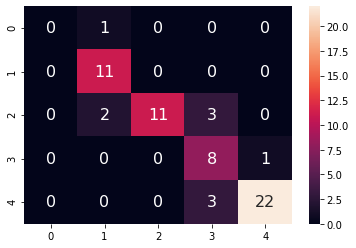

In [426]:
# Support Vector Machine
SVC_SMOTE_T100_casesNew = SVC(kernel='linear',random_state=0)
SVC_SMOTE_T100_casesNew.fit(X_casesNew_T100_class_train_SMO_cp,y_casesNew_T100_class_train_SMO_cp)
SVC_SMOTE_T100_casesNew_ypred = SVC_SMOTE_T100_casesNew.predict(X_casesNew_T100_class_test_SMO)
SVC_SMOTE_T100_casesNew_confmax = confusion_matrix(y_casesNew_T100_class_test_SMO,SVC_SMOTE_T100_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T100_class_test_SMO, SVC_SMOTE_T100_casesNew_ypred)))
print(classification_report(y_casesNew_T100_class_test_SMO,SVC_SMOTE_T100_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_SMOTE_T100_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.79
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.77      0.91      0.83        11
           3       0.71      0.75      0.73        16
           4       0.50      0.44      0.47         9
           5       0.96      0.92      0.94        25

    accuracy                           0.79        62
   macro avg       0.59      0.60      0.59        62
weighted avg       0.78      0.79      0.78        62

Confusion matrix :


<AxesSubplot:>

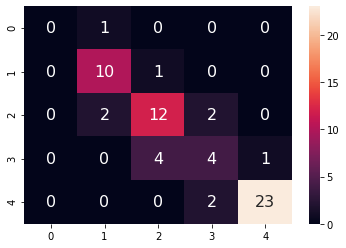

In [430]:
# Naive Bayes
NB_SMOTE_T100_casesNew = GaussianNB()
NB_SMOTE_T100_casesNew.fit(X_casesNew_T100_class_train_SMO_cp,y_casesNew_T100_class_train_SMO_cp)
NB_SMOTE_T100_casesNew_ypred = NB_SMOTE_T100_casesNew.predict(X_casesNew_T100_class_test_SMO)
NB_SMOTE_T100_casesNew_confmax = confusion_matrix(y_casesNew_T100_class_test_SMO,NB_SMOTE_T100_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T100_class_test_SMO, NB_SMOTE_T100_casesNew_ypred)))
print(classification_report(y_casesNew_T100_class_test_SMO,NB_SMOTE_T100_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(NB_SMOTE_T100_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.82
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11
           3       1.00      0.56      0.72        16
           4       0.53      1.00      0.69         9
           5       1.00      0.88      0.94        25

    accuracy                           0.82        62
   macro avg       0.66      0.69      0.65        62
weighted avg       0.88      0.82      0.82        62

Confusion matrix :


<AxesSubplot:>

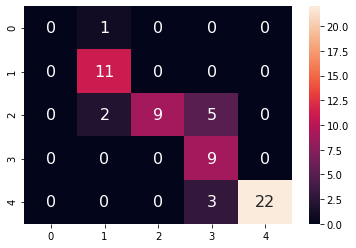

In [434]:
# KNN
KNN_SMOTE_T100_casesNew = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_SMOTE_T100_casesNew.fit(X_casesNew_T100_class_train_SMO_cp,y_casesNew_T100_class_train_SMO_cp)
KNN_SMOTE_T100_casesNew_ypred = KNN_SMOTE_T100_casesNew.predict(X_casesNew_T100_class_test_SMO)
KNN_SMOTE_T100_casesNew_confmax = confusion_matrix(y_casesNew_T100_class_test_SMO,KNN_SMOTE_T100_casesNew_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_casesNew_T100_class_test_SMO, KNN_SMOTE_T100_casesNew_ypred)))
print(classification_report(y_casesNew_T100_class_test_SMO,KNN_SMOTE_T100_casesNew_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_SMOTE_T100_casesNew_confmax,annot=True,annot_kws={"size":16},fmt="d")

## 2. Admitted cases

In [333]:
#admitted_state_vacc_feat_merge_encode[('overall_admitted','')].describe()

For classification, we need to discritize the y variable and make it into category
Thus, we set the severity score for the admitted cases in malaysia:

Let x = No. new admitted cases for each day
1. If x <= 600,severity score class = 1
2. If 600 < x <= 1200, severity score class = 2
3. If 1200 < x <= 1800, severity score class = 3
4. If 1800 < x <= 2400, severity score class 4
5. If x > 2400 severity score class = 5

In [335]:
admitted_state_vacc_feat_merge_encode_bin = admitted_state_vacc_feat_merge_encode.copy()
admitted_state_vacc_feat_merge_encode_bin['admitted_sev'] = pd.cut(admitted_state_vacc_feat_merge_encode_bin[('overall_admitted','')],bins=[-1,600,1200,1800,2400,1000000],labels=[1,2,3,4,5])
admitted_state_vacc_feat_merge_encode_bin['admitted_sev'].value_counts()

y_admitted_class = admitted_state_vacc_feat_merge_encode_bin['admitted_sev']

### I) NO SMOTE

#### A) No Feature Selection

In [336]:
X_admitted_NFS_class_train, X_admitted_NFS_class_test, y_admitted_NFS_class_train, y_admitted_NFS_class_test = train_test_split(X_admitted_FI,y_admitted_class,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sdc = StandardScaler()

X_admitted_NFS_class_train = sdc.fit_transform(X_admitted_NFS_class_train)
X_admitted_NFS_class_test = sdc.fit_transform(X_admitted_NFS_class_test)

Accuracy = 0.79
              precision    recall  f1-score   support

           3       0.86      0.80      0.83        15
           4       0.65      0.87      0.74        15
           5       1.00      0.69      0.82        13

    accuracy                           0.79        43
   macro avg       0.84      0.79      0.80        43
weighted avg       0.83      0.79      0.80        43

Confusion matrix :


<AxesSubplot:>

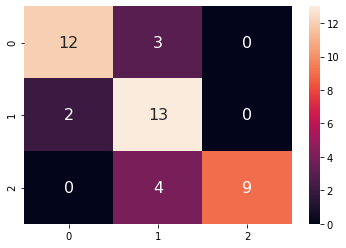

In [337]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

DTC_NSMO_NFS_admitted = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_NSMO_NFS_admitted.fit(X_admitted_NFS_class_train,y_admitted_NFS_class_train)
DTC_NSMO_NFS_admitted_ypred = DTC_NSMO_NFS_admitted.predict(X_admitted_NFS_class_test)
DTC_NSMO_NFS_admitted_confmax = confusion_matrix(y_admitted_NFS_class_test,DTC_NSMO_NFS_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_NFS_class_test, DTC_NSMO_NFS_admitted_ypred)))
print(classification_report(y_admitted_NFS_class_test,DTC_NSMO_NFS_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_NSMO_NFS_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.79
              precision    recall  f1-score   support

           3       0.82      0.60      0.69        15
           4       0.65      0.87      0.74        15
           5       1.00      0.92      0.96        13

    accuracy                           0.79        43
   macro avg       0.82      0.80      0.80        43
weighted avg       0.81      0.79      0.79        43

Confusion matrix :


<AxesSubplot:>

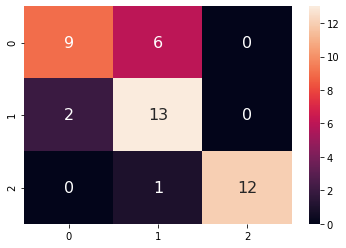

In [350]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

RFC_NSMO_NFS_admitted = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_NSMO_NFS_admitted.fit(X_admitted_NFS_class_train,y_admitted_NFS_class_train)
RFC_NSMO_NFS_admitted_ypred = RFC_NSMO_NFS_admitted.predict(X_admitted_NFS_class_test)
RFC_NSMO_NFS_admitted_confmax = confusion_matrix(y_admitted_NFS_class_test,RFC_NSMO_NFS_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_NFS_class_test, RFC_NSMO_NFS_admitted_ypred)))
print(classification_report(y_admitted_NFS_class_test,RFC_NSMO_NFS_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_NSMO_NFS_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.86
              precision    recall  f1-score   support

           3       0.86      0.80      0.83        15
           4       0.76      0.87      0.81        15
           5       1.00      0.92      0.96        13

    accuracy                           0.86        43
   macro avg       0.87      0.86      0.87        43
weighted avg       0.87      0.86      0.86        43

Confusion matrix :


<AxesSubplot:>

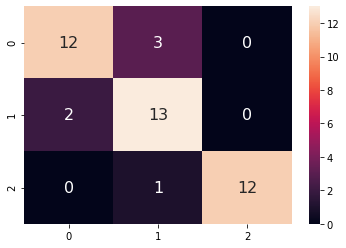

In [354]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

SVC_NSMO_NFS_admitted = SVC(kernel='linear',random_state=0)
SVC_NSMO_NFS_admitted.fit(X_admitted_NFS_class_train,y_admitted_NFS_class_train)
SVC_NSMO_NFS_admitted_ypred = SVC_NSMO_NFS_admitted.predict(X_admitted_NFS_class_test)
SVC_NSMO_NFS_admitted_confmax = confusion_matrix(y_admitted_NFS_class_test,SVC_NSMO_NFS_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_NFS_class_test, SVC_NSMO_NFS_admitted_ypred)))
print(classification_report(y_admitted_NFS_class_test,SVC_NSMO_NFS_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_NSMO_NFS_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.72
              precision    recall  f1-score   support

           3       0.67      0.67      0.67        15
           4       0.60      0.60      0.60        15
           5       0.92      0.92      0.92        13

    accuracy                           0.72        43
   macro avg       0.73      0.73      0.73        43
weighted avg       0.72      0.72      0.72        43

Confusion matrix :


<AxesSubplot:>

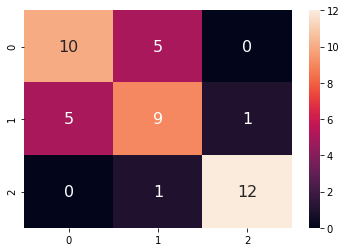

In [358]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

NB_NSMO_NFS_admitted = GaussianNB()
NB_NSMO_NFS_admitted.fit(X_admitted_NFS_class_train,y_admitted_NFS_class_train)
NB_NSMO_NFS_admitted_ypred = NB_NSMO_NFS_admitted.predict(X_admitted_NFS_class_test)
NB_NSMO_NFS_admitted_confmax = confusion_matrix(y_admitted_NFS_class_test,NB_NSMO_NFS_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_NFS_class_test, NB_NSMO_NFS_admitted_ypred)))
print(classification_report(y_admitted_NFS_class_test,NB_NSMO_NFS_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(NB_NSMO_NFS_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.79
              precision    recall  f1-score   support

           3       0.71      0.80      0.75        15
           4       0.71      0.67      0.69        15
           5       1.00      0.92      0.96        13

    accuracy                           0.79        43
   macro avg       0.81      0.80      0.80        43
weighted avg       0.80      0.79      0.79        43

Confusion matrix :


<AxesSubplot:>

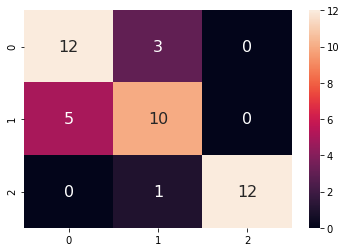

In [362]:
# KNN
KNN_NSMO_NFS_admitted = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_NSMO_NFS_admitted.fit(X_admitted_NFS_class_train,y_admitted_NFS_class_train)
KNN_NSMO_NFS_admitted_ypred = KNN_NSMO_NFS_admitted.predict(X_admitted_NFS_class_test)
KNN_NSMO_NFS_admitted_confmax = confusion_matrix(y_admitted_NFS_class_test,KNN_NSMO_NFS_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_NFS_class_test, KNN_NSMO_NFS_admitted_ypred)))
print(classification_report(y_admitted_NFS_class_test,KNN_NSMO_NFS_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_NSMO_NFS_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### B) Top 30 Feature

In [338]:
X_admitted_T30_class_train, X_admitted_T30_class_test, y_admitted_T30_class_train, y_admitted_T30_class_test = train_test_split(X_admitted_FI_30,y_admitted_class,test_size=0.25,random_state=0)

sdc = StandardScaler()

X_admitted_T30_class_train = sdc.fit_transform(X_admitted_T30_class_train)
X_admitted_T30_class_test = sdc.fit_transform(X_admitted_T30_class_test)

Accuracy = 0.84
              precision    recall  f1-score   support

           3       0.92      0.73      0.81        15
           4       0.72      0.87      0.79        15
           5       0.92      0.92      0.92        13

    accuracy                           0.84        43
   macro avg       0.85      0.84      0.84        43
weighted avg       0.85      0.84      0.84        43

Confusion matrix :


<AxesSubplot:>

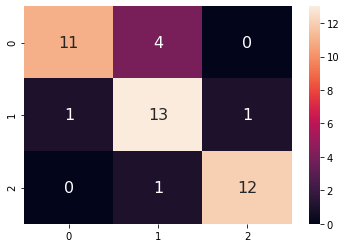

In [339]:
# Decision Tree Classifier
DTC_NSMO_T30_admitted = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_NSMO_T30_admitted.fit(X_admitted_T30_class_train,y_admitted_T30_class_train)
DTC_NSMO_T30_admitted_ypred = DTC_NSMO_T30_admitted.predict(X_admitted_T30_class_test)
DTC_NSMO_T30_admitted_confmax = confusion_matrix(y_admitted_T30_class_test,DTC_NSMO_T30_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T30_class_test, DTC_NSMO_T30_admitted_ypred)))
print(classification_report(y_admitted_T30_class_test,DTC_NSMO_T30_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_NSMO_T30_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.77
              precision    recall  f1-score   support

           3       0.77      0.67      0.71        15
           4       0.63      0.80      0.71        15
           5       1.00      0.85      0.92        13

    accuracy                           0.77        43
   macro avg       0.80      0.77      0.78        43
weighted avg       0.79      0.77      0.77        43

Confusion matrix :


<AxesSubplot:>

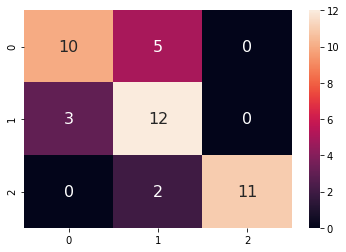

In [351]:
# Random Forest Classifier
RFC_NSMO_T30_admitted = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_NSMO_T30_admitted.fit(X_admitted_T30_class_train,y_admitted_T30_class_train)
RFC_NSMO_T30_admitted_ypred = RFC_NSMO_T30_admitted.predict(X_admitted_T30_class_test)
RFC_NSMO_T30_admitted_confmax = confusion_matrix(y_admitted_T30_class_test,RFC_NSMO_T30_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T30_class_test, RFC_NSMO_T30_admitted_ypred)))
print(classification_report(y_admitted_T30_class_test,RFC_NSMO_T30_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_NSMO_T30_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.84
              precision    recall  f1-score   support

           3       0.85      0.73      0.79        15
           4       0.72      0.87      0.79        15
           5       1.00      0.92      0.96        13

    accuracy                           0.84        43
   macro avg       0.86      0.84      0.84        43
weighted avg       0.85      0.84      0.84        43

Confusion matrix :


<AxesSubplot:>

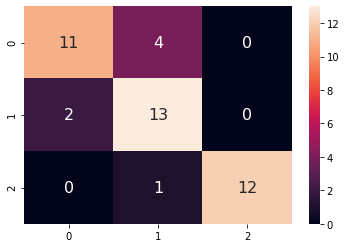

In [355]:
# Support Vector Machine
SVC_NSMO_T30_admitted = SVC(kernel='linear',random_state=0)
SVC_NSMO_T30_admitted.fit(X_admitted_T30_class_train,y_admitted_T30_class_train)
SVC_NSMO_T30_admitted_ypred = SVC_NSMO_T30_admitted.predict(X_admitted_T30_class_test)
SVC_NSMO_T30_admitted_confmax = confusion_matrix(y_admitted_T30_class_test,SVC_NSMO_T30_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T30_class_test, SVC_NSMO_T30_admitted_ypred)))
print(classification_report(y_admitted_T30_class_test,SVC_NSMO_T30_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_NSMO_T30_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.77
              precision    recall  f1-score   support

           3       0.71      0.67      0.69        15
           4       0.65      0.73      0.69        15
           5       1.00      0.92      0.96        13

    accuracy                           0.77        43
   macro avg       0.79      0.77      0.78        43
weighted avg       0.78      0.77      0.77        43

Confusion matrix :


<AxesSubplot:>

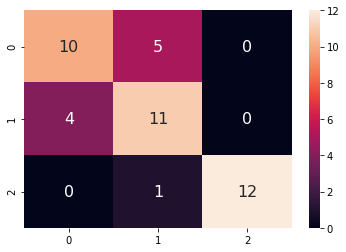

In [359]:
# Naive Bayes
NB_NSMO_T30_admitted = GaussianNB()
NB_NSMO_T30_admitted.fit(X_admitted_T30_class_train,y_admitted_T30_class_train)
NB_NSMO_T30_admitted_ypred = NB_NSMO_T30_admitted.predict(X_admitted_T30_class_test)
NB_NSMO_T30_admitted_confmax = confusion_matrix(y_admitted_T30_class_test,NB_NSMO_T30_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T30_class_test, NB_NSMO_T30_admitted_ypred)))
print(classification_report(y_admitted_T30_class_test,NB_NSMO_T30_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(NB_NSMO_T30_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.74
              precision    recall  f1-score   support

           3       0.65      0.73      0.69        15
           4       0.64      0.60      0.62        15
           5       1.00      0.92      0.96        13

    accuracy                           0.74        43
   macro avg       0.76      0.75      0.76        43
weighted avg       0.75      0.74      0.75        43

Confusion matrix :


<AxesSubplot:>

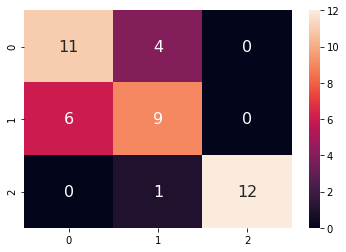

In [363]:
# KNN
KNN_NSMO_T30_admitted = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_NSMO_T30_admitted.fit(X_admitted_T30_class_train,y_admitted_T30_class_train)
KNN_NSMO_T30_admitted_ypred = KNN_NSMO_T30_admitted.predict(X_admitted_T30_class_test)
KNN_NSMO_T30_admitted_confmax = confusion_matrix(y_admitted_T30_class_test,KNN_NSMO_T30_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T30_class_test, KNN_NSMO_T30_admitted_ypred)))
print(classification_report(y_admitted_T30_class_test,KNN_NSMO_T30_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_NSMO_T30_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### C) Top 50 Feature

In [340]:
X_admitted_T50_class_train, X_admitted_T50_class_test, y_admitted_T50_class_train, y_admitted_T50_class_test = train_test_split(X_admitted_FI_50,y_admitted_class,test_size=0.25,random_state=0)

sdc = StandardScaler()

X_admitted_T50_class_train = sdc.fit_transform(X_admitted_T50_class_train)
X_admitted_T50_class_test = sdc.fit_transform(X_admitted_T50_class_test)

Accuracy = 0.86
              precision    recall  f1-score   support

           3       0.87      0.87      0.87        15
           4       0.80      0.80      0.80        15
           5       0.92      0.92      0.92        13

    accuracy                           0.86        43
   macro avg       0.86      0.86      0.86        43
weighted avg       0.86      0.86      0.86        43

Confusion matrix :


<AxesSubplot:>

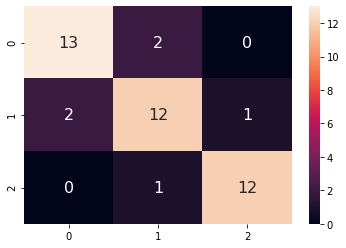

In [341]:
# Decision Tree Classifier
DTC_NSMO_T50_admitted = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_NSMO_T50_admitted.fit(X_admitted_T50_class_train,y_admitted_T50_class_train)
DTC_NSMO_T50_admitted_ypred = DTC_NSMO_T50_admitted.predict(X_admitted_T50_class_test)
DTC_NSMO_T50_admitted_confmax = confusion_matrix(y_admitted_T50_class_test,DTC_NSMO_T50_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T50_class_test, DTC_NSMO_T50_admitted_ypred)))
print(classification_report(y_admitted_T50_class_test,DTC_NSMO_T50_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_NSMO_T50_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.84
              precision    recall  f1-score   support

           3       0.85      0.73      0.79        15
           4       0.72      0.87      0.79        15
           5       1.00      0.92      0.96        13

    accuracy                           0.84        43
   macro avg       0.86      0.84      0.84        43
weighted avg       0.85      0.84      0.84        43

Confusion matrix :


<AxesSubplot:>

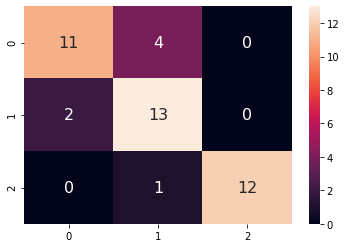

In [352]:
# Random Forest Classifier
RFC_NSMO_T50_admitted = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_NSMO_T50_admitted.fit(X_admitted_T50_class_train,y_admitted_T50_class_train)
RFC_NSMO_T50_admitted_ypred = RFC_NSMO_T50_admitted.predict(X_admitted_T50_class_test)
RFC_NSMO_T50_admitted_confmax = confusion_matrix(y_admitted_T50_class_test,RFC_NSMO_T50_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T50_class_test, RFC_NSMO_T50_admitted_ypred)))
print(classification_report(y_admitted_T50_class_test,RFC_NSMO_T50_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_NSMO_T50_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.86
              precision    recall  f1-score   support

           3       0.92      0.73      0.81        15
           4       0.74      0.93      0.82        15
           5       1.00      0.92      0.96        13

    accuracy                           0.86        43
   macro avg       0.88      0.86      0.87        43
weighted avg       0.88      0.86      0.86        43

Confusion matrix :


<AxesSubplot:>

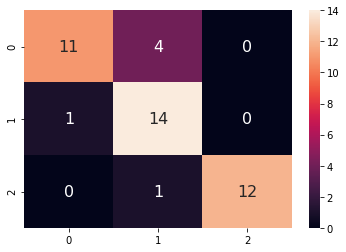

In [356]:
# Support Vector Machine
SVC_NSMO_T50_admitted = SVC(kernel='linear',random_state=0)
SVC_NSMO_T50_admitted.fit(X_admitted_T50_class_train,y_admitted_T50_class_train)
SVC_NSMO_T50_admitted_ypred = SVC_NSMO_T50_admitted.predict(X_admitted_T50_class_test)
SVC_NSMO_T50_admitted_confmax = confusion_matrix(y_admitted_T50_class_test,SVC_NSMO_T50_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T50_class_test, SVC_NSMO_T50_admitted_ypred)))
print(classification_report(y_admitted_T50_class_test,SVC_NSMO_T50_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_NSMO_T50_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.77
              precision    recall  f1-score   support

           3       0.71      0.67      0.69        15
           4       0.65      0.73      0.69        15
           5       1.00      0.92      0.96        13

    accuracy                           0.77        43
   macro avg       0.79      0.77      0.78        43
weighted avg       0.78      0.77      0.77        43

Confusion matrix :


<AxesSubplot:>

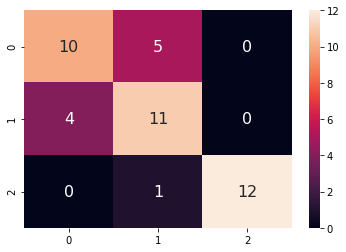

In [360]:
# Naive Bayes
NB_NSMO_T50_admitted = GaussianNB()
NB_NSMO_T50_admitted.fit(X_admitted_T50_class_train,y_admitted_T50_class_train)
NB_NSMO_T50_admitted_ypred = NB_NSMO_T50_admitted.predict(X_admitted_T50_class_test)
NB_NSMO_T50_admitted_confmax = confusion_matrix(y_admitted_T50_class_test,NB_NSMO_T50_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T50_class_test, NB_NSMO_T50_admitted_ypred)))
print(classification_report(y_admitted_T50_class_test,NB_NSMO_T50_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(NB_NSMO_T50_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.79
              precision    recall  f1-score   support

           3       0.73      0.73      0.73        15
           4       0.69      0.73      0.71        15
           5       1.00      0.92      0.96        13

    accuracy                           0.79        43
   macro avg       0.81      0.80      0.80        43
weighted avg       0.80      0.79      0.79        43

Confusion matrix :


<AxesSubplot:>

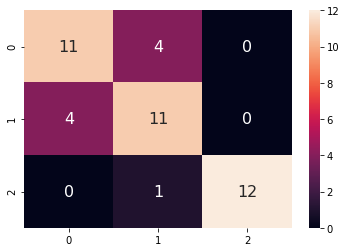

In [364]:
# KNN
KNN_NSMO_T50_admitted = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_NSMO_T50_admitted.fit(X_admitted_T50_class_train,y_admitted_T50_class_train)
KNN_NSMO_T50_admitted_ypred = KNN_NSMO_T50_admitted.predict(X_admitted_T50_class_test)
KNN_NSMO_T50_admitted_confmax = confusion_matrix(y_admitted_T50_class_test,KNN_NSMO_T50_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T50_class_test, KNN_NSMO_T50_admitted_ypred)))
print(classification_report(y_admitted_T50_class_test,KNN_NSMO_T50_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_NSMO_T50_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### D) Top 100 Feature

In [342]:
X_admitted_T100_class_train, X_admitted_T100_class_test, y_admitted_T100_class_train, y_admitted_T100_class_test = train_test_split(X_admitted_FI_100,y_admitted_class,test_size=0.25,random_state=0)

sdc = StandardScaler()

X_admitted_T100_class_train = sdc.fit_transform(X_admitted_T100_class_train)
X_admitted_T100_class_test = sdc.fit_transform(X_admitted_T100_class_test)

Accuracy = 0.88
              precision    recall  f1-score   support

           3       0.93      0.87      0.90        15
           4       0.78      0.93      0.85        15
           5       1.00      0.85      0.92        13

    accuracy                           0.88        43
   macro avg       0.90      0.88      0.89        43
weighted avg       0.90      0.88      0.89        43

Confusion matrix :


<AxesSubplot:>

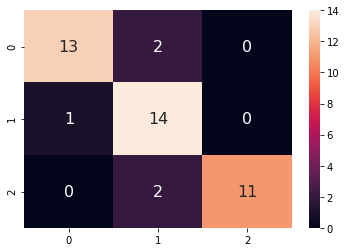

In [343]:
# Decision Tree Classifier
DTC_NSMO_T100_admitted = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_NSMO_T100_admitted.fit(X_admitted_T100_class_train,y_admitted_T100_class_train)
DTC_NSMO_T100_admitted_ypred = DTC_NSMO_T100_admitted.predict(X_admitted_T100_class_test)
DTC_NSMO_T100_admitted_confmax = confusion_matrix(y_admitted_T100_class_test,DTC_NSMO_T100_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T100_class_test, DTC_NSMO_T100_admitted_ypred)))
print(classification_report(y_admitted_T100_class_test,DTC_NSMO_T100_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_NSMO_T100_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.84
              precision    recall  f1-score   support

           3       0.86      0.80      0.83        15
           4       0.72      0.87      0.79        15
           5       1.00      0.85      0.92        13

    accuracy                           0.84        43
   macro avg       0.86      0.84      0.84        43
weighted avg       0.85      0.84      0.84        43

Confusion matrix :


<AxesSubplot:>

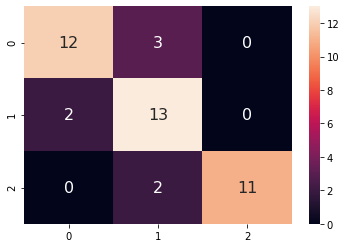

In [353]:
# Random Forest Classifier
RFC_NSMO_T100_admitted = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_NSMO_T100_admitted.fit(X_admitted_T100_class_train,y_admitted_T100_class_train)
RFC_NSMO_T100_admitted_ypred = RFC_NSMO_T100_admitted.predict(X_admitted_T100_class_test)
RFC_NSMO_T100_admitted_confmax = confusion_matrix(y_admitted_T100_class_test,RFC_NSMO_T100_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T100_class_test, RFC_NSMO_T100_admitted_ypred)))
print(classification_report(y_admitted_T100_class_test,RFC_NSMO_T100_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_NSMO_T100_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.86
              precision    recall  f1-score   support

           3       0.92      0.73      0.81        15
           4       0.74      0.93      0.82        15
           5       1.00      0.92      0.96        13

    accuracy                           0.86        43
   macro avg       0.88      0.86      0.87        43
weighted avg       0.88      0.86      0.86        43

Confusion matrix :


<AxesSubplot:>

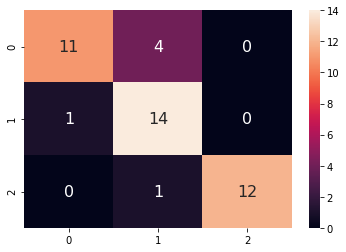

In [357]:
# Support Vector Machine
SVC_NSMO_T100_admitted = SVC(kernel='linear',random_state=0)
SVC_NSMO_T100_admitted.fit(X_admitted_T100_class_train,y_admitted_T100_class_train)
SVC_NSMO_T100_admitted_ypred = SVC_NSMO_T100_admitted.predict(X_admitted_T100_class_test)
SVC_NSMO_T100_admitted_confmax = confusion_matrix(y_admitted_T100_class_test,SVC_NSMO_T100_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T100_class_test, SVC_NSMO_T100_admitted_ypred)))
print(classification_report(y_admitted_T100_class_test,SVC_NSMO_T100_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_NSMO_T100_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.72
              precision    recall  f1-score   support

           3       0.67      0.67      0.67        15
           4       0.60      0.60      0.60        15
           5       0.92      0.92      0.92        13

    accuracy                           0.72        43
   macro avg       0.73      0.73      0.73        43
weighted avg       0.72      0.72      0.72        43

Confusion matrix :


<AxesSubplot:>

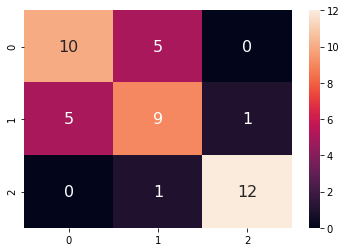

In [361]:
# Naive Bayes
NB_NSMO_T100_admitted = GaussianNB()
NB_NSMO_T100_admitted.fit(X_admitted_T100_class_train,y_admitted_T100_class_train)
NB_NSMO_T100_admitted_ypred = NB_NSMO_T100_admitted.predict(X_admitted_T100_class_test)
NB_NSMO_T100_admitted_confmax = confusion_matrix(y_admitted_T100_class_test,NB_NSMO_T100_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T100_class_test, NB_NSMO_T100_admitted_ypred)))
print(classification_report(y_admitted_T100_class_test,NB_NSMO_T100_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(NB_NSMO_T100_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           3       0.83      0.67      0.74        15
           4       0.68      0.87      0.76        15
           5       1.00      0.92      0.96        13

    accuracy                           0.81        43
   macro avg       0.84      0.82      0.82        43
weighted avg       0.83      0.81      0.82        43

Confusion matrix :


<AxesSubplot:>

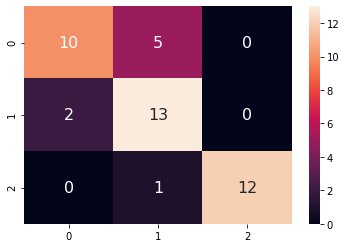

In [365]:
# KNN
KNN_NSMO_T100_admitted = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_NSMO_T100_admitted.fit(X_admitted_T100_class_train,y_admitted_T100_class_train)
KNN_NSMO_T100_admitted_ypred = KNN_NSMO_T100_admitted.predict(X_admitted_T100_class_test)
KNN_NSMO_T100_admitted_confmax = confusion_matrix(y_admitted_T100_class_test,KNN_NSMO_T100_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T100_class_test, KNN_NSMO_T100_admitted_ypred)))
print(classification_report(y_admitted_T100_class_test,KNN_NSMO_T100_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_NSMO_T100_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

### II) SMOTE

In [435]:
#Perform Over-Sampling using SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)

#### A) No Feature Selection

In [437]:
X_admitted_NFS_class_train_SMO, X_admitted_NFS_class_test_SMO, y_admitted_NFS_class_train_SMO, y_admitted_NFS_class_test_SMO = train_test_split(X_admitted_FI,y_admitted_class.ravel(),test_size=0.25,random_state=0)

col_NFS_admitted = X_admitted_NFS_class_train_SMO.columns
X_admitted_NFS_class_train_SMO_cp, y_admitted_NFS_class_train_SMO_cp = smt.fit_resample(X_admitted_NFS_class_train_SMO,y_admitted_NFS_class_train_SMO)
# X_admitted_NFS_class_train_SMO_cp = pd.DataFrame(data=X_admitted_NFS_class_train_SMO_cp, columns=col_NFS_admitted)
# y_admitted_NFS_class_train_SMO_cp = pd.DataFrame(data=y_admitted_NFS_class_train_SMO_cp, columns=['admitted_sev'])
# y_admitted_NFS_class_train_SMO_cp['admitted_sev'].value_counts()

Accuracy = 0.86
              precision    recall  f1-score   support

           3       0.92      0.80      0.86        15
           4       0.74      0.93      0.82        15
           5       1.00      0.85      0.92        13

    accuracy                           0.86        43
   macro avg       0.89      0.86      0.87        43
weighted avg       0.88      0.86      0.86        43

Confusion matrix :


<AxesSubplot:>

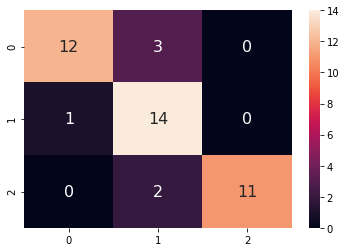

In [438]:
# Decision Tree Classifier
DTC_SMOTE_NFS_admitted = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_SMOTE_NFS_admitted.fit(X_admitted_NFS_class_train_SMO_cp,y_admitted_NFS_class_train_SMO_cp)
DTC_SMOTE_NFS_admitted_ypred = DTC_SMOTE_NFS_admitted.predict(X_admitted_NFS_class_test_SMO)
DTC_SMOTE_NFS_admitted_confmax = confusion_matrix(y_admitted_NFS_class_test_SMO,DTC_SMOTE_NFS_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_NFS_class_test_SMO, DTC_SMOTE_NFS_admitted_ypred)))
print(classification_report(y_admitted_NFS_class_test_SMO,DTC_SMOTE_NFS_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_SMOTE_NFS_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           3       0.79      0.73      0.76        15
           4       0.71      0.80      0.75        15
           5       1.00      0.92      0.96        13

    accuracy                           0.81        43
   macro avg       0.83      0.82      0.82        43
weighted avg       0.82      0.81      0.82        43

Confusion matrix :


<AxesSubplot:>

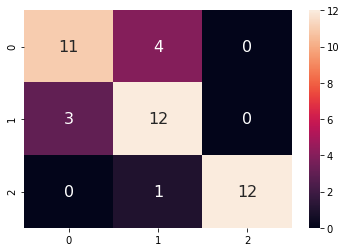

In [458]:
# Random Forest Classifier
RFC_SMOTE_NFS_admitted = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_SMOTE_NFS_admitted.fit(X_admitted_NFS_class_train_SMO_cp,y_admitted_NFS_class_train_SMO_cp)
RFC_SMOTE_NFS_admitted_ypred = RFC_SMOTE_NFS_admitted.predict(X_admitted_NFS_class_test_SMO)
RFC_SMOTE_NFS_admitted_confmax = confusion_matrix(y_admitted_NFS_class_test_SMO,RFC_SMOTE_NFS_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_NFS_class_test_SMO, RFC_SMOTE_NFS_admitted_ypred)))
print(classification_report(y_admitted_NFS_class_test_SMO,RFC_SMOTE_NFS_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_SMOTE_NFS_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.74
              precision    recall  f1-score   support

           3       0.69      0.60      0.64        15
           4       0.61      0.73      0.67        15
           5       1.00      0.92      0.96        13

    accuracy                           0.74        43
   macro avg       0.77      0.75      0.76        43
weighted avg       0.76      0.74      0.75        43

Confusion matrix :


<AxesSubplot:>

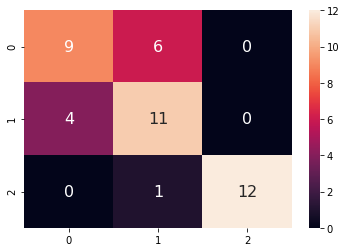

In [466]:
# Support Vector Machine
SVC_SMOTE_NFS_admitted = SVC(kernel='linear',random_state=0)
SVC_SMOTE_NFS_admitted.fit(X_admitted_NFS_class_train_SMO_cp,y_admitted_NFS_class_train_SMO_cp)
SVC_SMOTE_NFS_admitted_ypred = SVC_SMOTE_NFS_admitted.predict(X_admitted_NFS_class_test_SMO)
SVC_SMOTE_NFS_admitted_confmax = confusion_matrix(y_admitted_NFS_class_test_SMO,SVC_SMOTE_NFS_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_NFS_class_test_SMO, SVC_SMOTE_NFS_admitted_ypred)))
print(classification_report(y_admitted_NFS_class_test_SMO,SVC_SMOTE_NFS_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_SMOTE_NFS_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.72
              precision    recall  f1-score   support

           3       0.67      0.67      0.67        15
           4       0.60      0.60      0.60        15
           5       0.92      0.92      0.92        13

    accuracy                           0.72        43
   macro avg       0.73      0.73      0.73        43
weighted avg       0.72      0.72      0.72        43

Confusion matrix :


<AxesSubplot:>

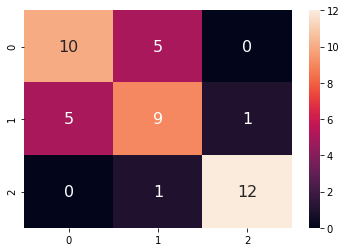

In [474]:
# Naive Bayes
NB_SMOTE_NFS_admitted = GaussianNB()
NB_SMOTE_NFS_admitted.fit(X_admitted_NFS_class_train_SMO_cp,y_admitted_NFS_class_train_SMO_cp)
NB_SMOTE_NFS_admitted_ypred = NB_SMOTE_NFS_admitted.predict(X_admitted_NFS_class_test_SMO)
NB_SMOTE_NFS_admitted_confmax = confusion_matrix(y_admitted_NFS_class_test_SMO,NB_SMOTE_NFS_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_NFS_class_test_SMO, NB_SMOTE_NFS_admitted_ypred)))
print(classification_report(y_admitted_NFS_class_test_SMO,NB_SMOTE_NFS_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(NB_SMOTE_NFS_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.77
              precision    recall  f1-score   support

           3       0.69      0.73      0.71        15
           4       0.67      0.67      0.67        15
           5       1.00      0.92      0.96        13

    accuracy                           0.77        43
   macro avg       0.78      0.77      0.78        43
weighted avg       0.77      0.77      0.77        43

Confusion matrix :


<AxesSubplot:>

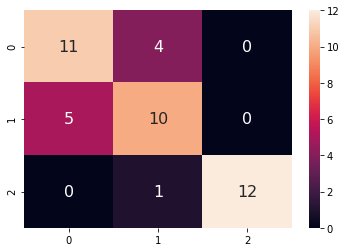

In [482]:
# KNN
KNN_SMOTE_NFS_admitted = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_SMOTE_NFS_admitted.fit(X_admitted_NFS_class_train_SMO_cp,y_admitted_NFS_class_train_SMO_cp)
KNN_SMOTE_NFS_admitted_ypred = KNN_SMOTE_NFS_admitted.predict(X_admitted_NFS_class_test_SMO)
KNN_SMOTE_NFS_admitted_confmax = confusion_matrix(y_admitted_NFS_class_test_SMO,KNN_SMOTE_NFS_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_NFS_class_test_SMO, KNN_SMOTE_NFS_admitted_ypred)))
print(classification_report(y_admitted_NFS_class_test_SMO,KNN_SMOTE_NFS_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_SMOTE_NFS_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### B) Top 30 Feature

In [439]:
X_admitted_T30_class_train_SMO, X_admitted_T30_class_test_SMO, y_admitted_T30_class_train_SMO, y_admitted_T30_class_test_SMO = train_test_split(X_admitted_FI_30,y_admitted_class.ravel(),test_size=0.25,random_state=0)

col_T30_admitted = X_admitted_T30_class_train_SMO.columns
X_admitted_T30_class_train_SMO_cp, y_admitted_T30_class_train_SMO_cp = smt.fit_resample(X_admitted_T30_class_train_SMO,y_admitted_T30_class_train_SMO)

Accuracy = 0.91
              precision    recall  f1-score   support

           3       0.92      0.80      0.86        15
           4       0.82      0.93      0.87        15
           5       1.00      1.00      1.00        13

    accuracy                           0.91        43
   macro avg       0.92      0.91      0.91        43
weighted avg       0.91      0.91      0.91        43

Confusion matrix :


<AxesSubplot:>

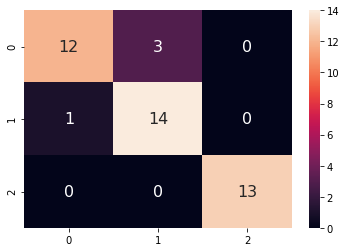

In [440]:
# Decision Tree Classifier
DTC_SMOTE_T30_admitted = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_SMOTE_T30_admitted.fit(X_admitted_T30_class_train_SMO_cp,y_admitted_T30_class_train_SMO_cp)
DTC_SMOTE_T30_admitted_ypred = DTC_SMOTE_T30_admitted.predict(X_admitted_T30_class_test_SMO)
DTC_SMOTE_T30_admitted_confmax = confusion_matrix(y_admitted_T30_class_test_SMO,DTC_SMOTE_T30_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T30_class_test_SMO, DTC_SMOTE_T30_admitted_ypred)))
print(classification_report(y_admitted_T30_class_test_SMO,DTC_SMOTE_T30_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_SMOTE_T30_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.77
              precision    recall  f1-score   support

           3       0.71      0.67      0.69        15
           4       0.65      0.73      0.69        15
           5       1.00      0.92      0.96        13

    accuracy                           0.77        43
   macro avg       0.79      0.77      0.78        43
weighted avg       0.78      0.77      0.77        43

Confusion matrix :


<AxesSubplot:>

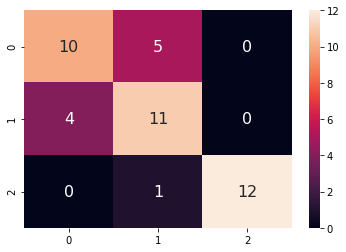

In [459]:
# Random Forest Classifier
RFC_SMOTE_T30_admitted = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_SMOTE_T30_admitted.fit(X_admitted_T30_class_train_SMO_cp,y_admitted_T30_class_train_SMO_cp)
RFC_SMOTE_T30_admitted_ypred = RFC_SMOTE_T30_admitted.predict(X_admitted_T30_class_test_SMO)
RFC_SMOTE_T30_admitted_confmax = confusion_matrix(y_admitted_T30_class_test_SMO,RFC_SMOTE_T30_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T30_class_test_SMO, RFC_SMOTE_T30_admitted_ypred)))
print(classification_report(y_admitted_T30_class_test_SMO,RFC_SMOTE_T30_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_SMOTE_T30_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           3       0.83      0.67      0.74        15
           4       0.68      0.87      0.76        15
           5       1.00      0.92      0.96        13

    accuracy                           0.81        43
   macro avg       0.84      0.82      0.82        43
weighted avg       0.83      0.81      0.82        43

Confusion matrix :


<AxesSubplot:>

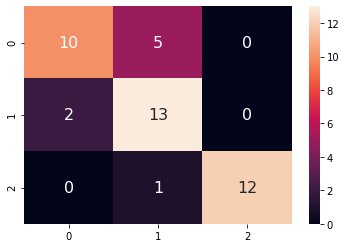

In [467]:
# Support Vector Machine
SVC_SMOTE_T30_admitted = SVC(kernel='linear',random_state=0)
SVC_SMOTE_T30_admitted.fit(X_admitted_T30_class_train_SMO_cp,y_admitted_T30_class_train_SMO_cp)
SVC_SMOTE_T30_admitted_ypred = SVC_SMOTE_T30_admitted.predict(X_admitted_T30_class_test_SMO)
SVC_SMOTE_T30_admitted_confmax = confusion_matrix(y_admitted_T30_class_test_SMO,SVC_SMOTE_T30_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T30_class_test_SMO, SVC_SMOTE_T30_admitted_ypred)))
print(classification_report(y_admitted_T30_class_test_SMO,SVC_SMOTE_T30_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_SMOTE_T30_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.74
              precision    recall  f1-score   support

           3       0.71      0.67      0.69        15
           4       0.62      0.67      0.65        15
           5       0.92      0.92      0.92        13

    accuracy                           0.74        43
   macro avg       0.75      0.75      0.75        43
weighted avg       0.75      0.74      0.74        43

Confusion matrix :


<AxesSubplot:>

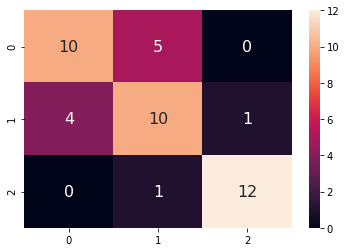

In [475]:
# Naive Bayes
NB_SMOTE_T30_admitted = GaussianNB()
NB_SMOTE_T30_admitted.fit(X_admitted_T30_class_train_SMO_cp,y_admitted_T30_class_train_SMO_cp)
NB_SMOTE_T30_admitted_ypred = NB_SMOTE_T30_admitted.predict(X_admitted_T30_class_test_SMO)
NB_SMOTE_T30_admitted_confmax = confusion_matrix(y_admitted_T30_class_test_SMO,NB_SMOTE_T30_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T30_class_test_SMO, NB_SMOTE_T30_admitted_ypred)))
print(classification_report(y_admitted_T30_class_test_SMO,NB_SMOTE_T30_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(NB_SMOTE_T30_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.70
              precision    recall  f1-score   support

           3       0.62      0.67      0.65        15
           4       0.62      0.53      0.57        15
           5       0.86      0.92      0.89        13

    accuracy                           0.70        43
   macro avg       0.70      0.71      0.70        43
weighted avg       0.69      0.70      0.69        43

Confusion matrix :


<AxesSubplot:>

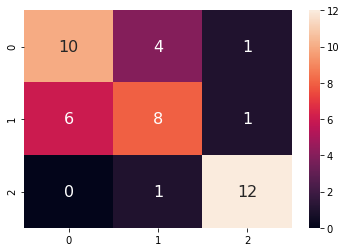

In [483]:
# KNN
KNN_SMOTE_T30_admitted = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_SMOTE_T30_admitted.fit(X_admitted_T30_class_train_SMO_cp,y_admitted_T30_class_train_SMO_cp)
KNN_SMOTE_T30_admitted_ypred = KNN_SMOTE_T30_admitted.predict(X_admitted_T30_class_test_SMO)
KNN_SMOTE_T30_admitted_confmax = confusion_matrix(y_admitted_T30_class_test_SMO,KNN_SMOTE_T30_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T30_class_test_SMO, KNN_SMOTE_T30_admitted_ypred)))
print(classification_report(y_admitted_T30_class_test_SMO,KNN_SMOTE_T30_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_SMOTE_T30_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### C) Top 50 Feature

In [441]:
X_admitted_T50_class_train_SMO, X_admitted_T50_class_test_SMO, y_admitted_T50_class_train_SMO, y_admitted_T50_class_test_SMO = train_test_split(X_admitted_FI_50,y_admitted_class.ravel(),test_size=0.25,random_state=0)

col_T50_admitted = X_admitted_T50_class_train_SMO.columns
X_admitted_T50_class_train_SMO_cp, y_admitted_T50_class_train_SMO_cp = smt.fit_resample(X_admitted_T50_class_train_SMO,y_admitted_T50_class_train_SMO)

Accuracy = 0.91
              precision    recall  f1-score   support

           3       1.00      0.87      0.93        15
           4       0.79      1.00      0.88        15
           5       1.00      0.85      0.92        13

    accuracy                           0.91        43
   macro avg       0.93      0.90      0.91        43
weighted avg       0.93      0.91      0.91        43

Confusion matrix :


<AxesSubplot:>

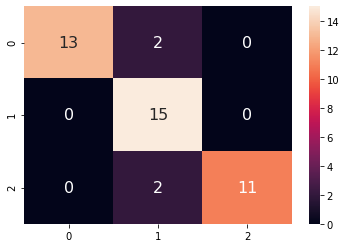

In [442]:
# Decision Tree Classifier
DTC_SMOTE_T50_admitted = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_SMOTE_T50_admitted.fit(X_admitted_T50_class_train_SMO_cp,y_admitted_T50_class_train_SMO_cp)
DTC_SMOTE_T50_admitted_ypred = DTC_SMOTE_T50_admitted.predict(X_admitted_T50_class_test_SMO)
DTC_SMOTE_T50_admitted_confmax = confusion_matrix(y_admitted_T50_class_test_SMO,DTC_SMOTE_T50_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T50_class_test_SMO, DTC_SMOTE_T50_admitted_ypred)))
print(classification_report(y_admitted_T50_class_test_SMO,DTC_SMOTE_T50_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_SMOTE_T50_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           3       0.79      0.73      0.76        15
           4       0.71      0.80      0.75        15
           5       1.00      0.92      0.96        13

    accuracy                           0.81        43
   macro avg       0.83      0.82      0.82        43
weighted avg       0.82      0.81      0.82        43

Confusion matrix :


<AxesSubplot:>

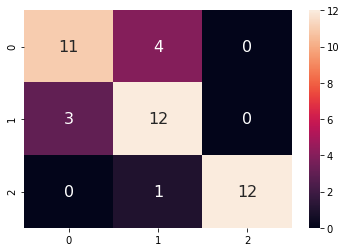

In [460]:
# Random Forest Classifier
RFC_SMOTE_T50_admitted = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_SMOTE_T50_admitted.fit(X_admitted_T50_class_train_SMO_cp,y_admitted_T50_class_train_SMO_cp)
RFC_SMOTE_T50_admitted_ypred = RFC_SMOTE_T50_admitted.predict(X_admitted_T50_class_test_SMO)
RFC_SMOTE_T50_admitted_confmax = confusion_matrix(y_admitted_T50_class_test_SMO,RFC_SMOTE_T50_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T50_class_test_SMO, RFC_SMOTE_T50_admitted_ypred)))
print(classification_report(y_admitted_T50_class_test_SMO,RFC_SMOTE_T50_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_SMOTE_T50_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.91
              precision    recall  f1-score   support

           3       0.93      0.87      0.90        15
           4       0.82      0.93      0.87        15
           5       1.00      0.92      0.96        13

    accuracy                           0.91        43
   macro avg       0.92      0.91      0.91        43
weighted avg       0.91      0.91      0.91        43

Confusion matrix :


<AxesSubplot:>

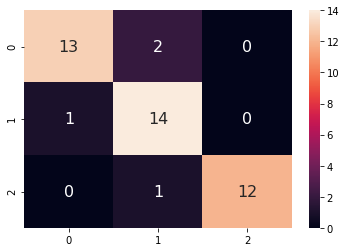

In [468]:
# Support Vector Machine
SVC_SMOTE_T50_admitted = SVC(kernel='linear',random_state=0)
SVC_SMOTE_T50_admitted.fit(X_admitted_T50_class_train_SMO_cp,y_admitted_T50_class_train_SMO_cp)
SVC_SMOTE_T50_admitted_ypred = SVC_SMOTE_T50_admitted.predict(X_admitted_T50_class_test_SMO)
SVC_SMOTE_T50_admitted_confmax = confusion_matrix(y_admitted_T50_class_test_SMO,SVC_SMOTE_T50_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T50_class_test_SMO, SVC_SMOTE_T50_admitted_ypred)))
print(classification_report(y_admitted_T50_class_test_SMO,SVC_SMOTE_T50_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_SMOTE_T50_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.74
              precision    recall  f1-score   support

           3       0.71      0.67      0.69        15
           4       0.62      0.67      0.65        15
           5       0.92      0.92      0.92        13

    accuracy                           0.74        43
   macro avg       0.75      0.75      0.75        43
weighted avg       0.75      0.74      0.74        43

Confusion matrix :


<AxesSubplot:>

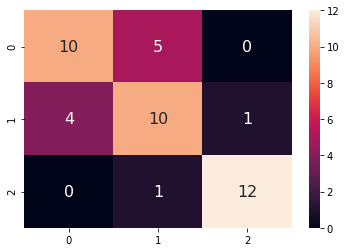

In [476]:
# Naive Bayes
NB_SMOTE_T50_admitted = GaussianNB()
NB_SMOTE_T50_admitted.fit(X_admitted_T50_class_train_SMO_cp,y_admitted_T50_class_train_SMO_cp)
NB_SMOTE_T50_admitted_ypred = NB_SMOTE_T50_admitted.predict(X_admitted_T50_class_test_SMO)
NB_SMOTE_T50_admitted_confmax = confusion_matrix(y_admitted_T50_class_test_SMO,NB_SMOTE_T50_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T50_class_test_SMO, NB_SMOTE_T50_admitted_ypred)))
print(classification_report(y_admitted_T50_class_test_SMO,NB_SMOTE_T50_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(NB_SMOTE_T50_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.67
              precision    recall  f1-score   support

           3       0.57      0.53      0.55        15
           4       0.53      0.60      0.56        15
           5       1.00      0.92      0.96        13

    accuracy                           0.67        43
   macro avg       0.70      0.69      0.69        43
weighted avg       0.69      0.67      0.68        43

Confusion matrix :


<AxesSubplot:>

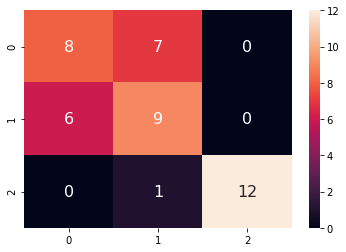

In [484]:
# KNN
KNN_SMOTE_T50_admitted = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_SMOTE_T50_admitted.fit(X_admitted_T50_class_train_SMO_cp,y_admitted_T50_class_train_SMO_cp)
KNN_SMOTE_T50_admitted_ypred = KNN_SMOTE_T50_admitted.predict(X_admitted_T50_class_test_SMO)
KNN_SMOTE_T50_admitted_confmax = confusion_matrix(y_admitted_T50_class_test_SMO,KNN_SMOTE_T50_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T50_class_test_SMO, KNN_SMOTE_T50_admitted_ypred)))
print(classification_report(y_admitted_T50_class_test_SMO,KNN_SMOTE_T50_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_SMOTE_T50_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### D) Top 100 Feature

In [444]:
X_admitted_T100_class_train_SMO, X_admitted_T100_class_test_SMO, y_admitted_T100_class_train_SMO, y_admitted_T100_class_test_SMO = train_test_split(X_admitted_FI_100,y_admitted_class.ravel(),test_size=0.25,random_state=0)

col_T100_admitted = X_admitted_T100_class_train_SMO.columns
X_admitted_T100_class_train_SMO_cp, y_admitted_T100_class_train_SMO_cp = smt.fit_resample(X_admitted_T100_class_train_SMO,y_admitted_T100_class_train_SMO)

Accuracy = 0.88
              precision    recall  f1-score   support

           3       0.93      0.87      0.90        15
           4       0.78      0.93      0.85        15
           5       1.00      0.85      0.92        13

    accuracy                           0.88        43
   macro avg       0.90      0.88      0.89        43
weighted avg       0.90      0.88      0.89        43

Confusion matrix :


<AxesSubplot:>

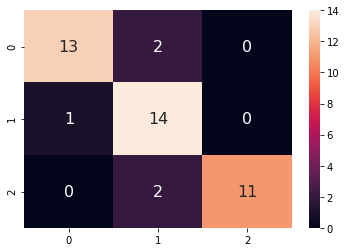

In [445]:
# Decision Tree Classifier
DTC_SMOTE_T100_admitted = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_SMOTE_T100_admitted.fit(X_admitted_T100_class_train_SMO_cp,y_admitted_T100_class_train_SMO_cp)
DTC_SMOTE_T100_admitted_ypred = DTC_SMOTE_T100_admitted.predict(X_admitted_T100_class_test_SMO)
DTC_SMOTE_T100_admitted_confmax = confusion_matrix(y_admitted_T100_class_test_SMO,DTC_SMOTE_T100_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T100_class_test_SMO, DTC_SMOTE_T100_admitted_ypred)))
print(classification_report(y_admitted_T100_class_test_SMO,DTC_SMOTE_T100_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_SMOTE_T100_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           3       0.76      0.87      0.81        15
           4       0.73      0.73      0.73        15
           5       1.00      0.85      0.92        13

    accuracy                           0.81        43
   macro avg       0.83      0.82      0.82        43
weighted avg       0.82      0.81      0.82        43

Confusion matrix :


<AxesSubplot:>

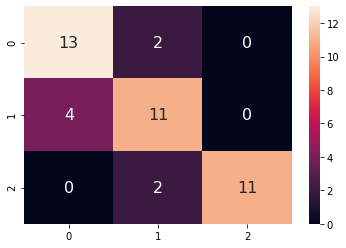

In [461]:
# Random Forest Classifier
RFC_SMOTE_T100_admitted = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_SMOTE_T100_admitted.fit(X_admitted_T100_class_train_SMO_cp,y_admitted_T100_class_train_SMO_cp)
RFC_SMOTE_T100_admitted_ypred = RFC_SMOTE_T100_admitted.predict(X_admitted_T100_class_test_SMO)
RFC_SMOTE_T100_admitted_confmax = confusion_matrix(y_admitted_T100_class_test_SMO,RFC_SMOTE_T100_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T100_class_test_SMO, RFC_SMOTE_T100_admitted_ypred)))
print(classification_report(y_admitted_T100_class_test_SMO,RFC_SMOTE_T100_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_SMOTE_T100_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.88
              precision    recall  f1-score   support

           3       0.92      0.80      0.86        15
           4       0.78      0.93      0.85        15
           5       1.00      0.92      0.96        13

    accuracy                           0.88        43
   macro avg       0.90      0.89      0.89        43
weighted avg       0.90      0.88      0.89        43

Confusion matrix :


<AxesSubplot:>

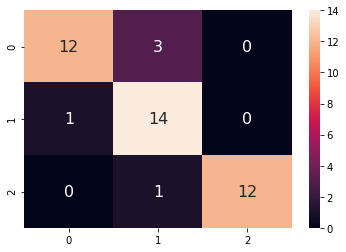

In [469]:
# Support Vector Machine
SVC_SMOTE_T100_admitted = SVC(kernel='linear',random_state=0)
SVC_SMOTE_T100_admitted.fit(X_admitted_T100_class_train_SMO_cp,y_admitted_T100_class_train_SMO_cp)
SVC_SMOTE_T100_admitted_ypred = SVC_SMOTE_T100_admitted.predict(X_admitted_T100_class_test_SMO)
SVC_SMOTE_T100_admitted_confmax = confusion_matrix(y_admitted_T100_class_test_SMO,SVC_SMOTE_T100_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T100_class_test_SMO, SVC_SMOTE_T100_admitted_ypred)))
print(classification_report(y_admitted_T100_class_test_SMO,SVC_SMOTE_T100_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_SMOTE_T100_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.72
              precision    recall  f1-score   support

           3       0.67      0.67      0.67        15
           4       0.60      0.60      0.60        15
           5       0.92      0.92      0.92        13

    accuracy                           0.72        43
   macro avg       0.73      0.73      0.73        43
weighted avg       0.72      0.72      0.72        43

Confusion matrix :


<AxesSubplot:>

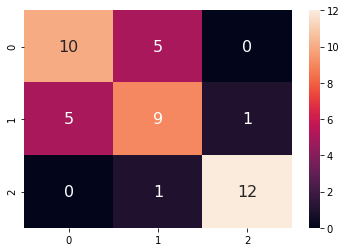

In [477]:
# Naive Bayes
NB_SMOTE_T100_admitted = GaussianNB()
NB_SMOTE_T100_admitted.fit(X_admitted_T100_class_train_SMO_cp,y_admitted_T100_class_train_SMO_cp)
NB_SMOTE_T100_admitted_ypred = NB_SMOTE_T100_admitted.predict(X_admitted_T100_class_test_SMO)
NB_SMOTE_T100_admitted_confmax = confusion_matrix(y_admitted_T100_class_test_SMO,NB_SMOTE_T100_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T100_class_test_SMO, NB_SMOTE_T100_admitted_ypred)))
print(classification_report(y_admitted_T100_class_test_SMO,NB_SMOTE_T100_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(NB_SMOTE_T100_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           3       0.75      0.80      0.77        15
           4       0.73      0.73      0.73        15
           5       1.00      0.92      0.96        13

    accuracy                           0.81        43
   macro avg       0.83      0.82      0.82        43
weighted avg       0.82      0.81      0.82        43

Confusion matrix :


<AxesSubplot:>

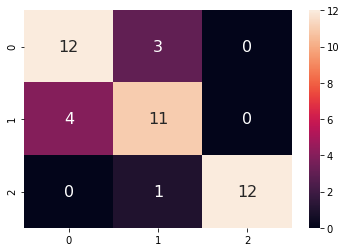

In [485]:
# KNN
KNN_SMOTE_T100_admitted = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_SMOTE_T100_admitted.fit(X_admitted_T100_class_train_SMO_cp,y_admitted_T100_class_train_SMO_cp)
KNN_SMOTE_T100_admitted_ypred = KNN_SMOTE_T100_admitted.predict(X_admitted_T100_class_test_SMO)
KNN_SMOTE_T100_admitted_confmax = confusion_matrix(y_admitted_T100_class_test_SMO,KNN_SMOTE_T100_admitted_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_admitted_T100_class_test_SMO, KNN_SMOTE_T100_admitted_ypred)))
print(classification_report(y_admitted_T100_class_test_SMO,KNN_SMOTE_T100_admitted_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_SMOTE_T100_admitted_confmax,annot=True,annot_kws={"size":16},fmt="d")

## 3. ICU cases

In [222]:
#ICU_state_vacc_feat_merge_encode[('overall_icu','')].describe()

For classification, we need to discritize the y variable and make it into category
Thus, we set the severity score for the ICU cases in malaysia:

Let x = No. new admitted cases for each day
1. If x <= 500,severity score class = 1
2. If 500 < x <= 750, severity score class = 2
3. If 750 < x <= 1000, severity score class = 3
4. If 1000 < x <= 1250, severity score class 4
5. If x > 1250 severity score class = 5

In [368]:
ICU_state_vacc_feat_merge_encode_bin = ICU_state_vacc_feat_merge_encode.copy()
ICU_state_vacc_feat_merge_encode_bin['icu_sev'] = pd.cut(ICU_state_vacc_feat_merge_encode_bin[('overall_icu','')],bins=[-1,500,750,1000,1250,1000000],labels=[1,2,3,4,5])
ICU_state_vacc_feat_merge_encode_bin['icu_sev'].value_counts()

#Set the y to ICU_sev
y_ICU_class = ICU_state_vacc_feat_merge_encode_bin['icu_sev']

### I) NO SMOTE

#### A) No Feature Selection

In [369]:
X_ICU_NFS_class_train, X_ICU_NFS_class_test, y_ICU_NFS_class_train, y_ICU_NFS_class_test = train_test_split(X_ICU_FI,y_ICU_class,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sdc = StandardScaler()

X_ICU_NFS_class_train = sdc.fit_transform(X_ICU_NFS_class_train)
X_ICU_NFS_class_test = sdc.fit_transform(X_ICU_NFS_class_test)

Accuracy = 0.93
              precision    recall  f1-score   support

           2       0.60      0.75      0.67         4
           3       0.86      0.75      0.80         8
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        17

    accuracy                           0.93        43
   macro avg       0.86      0.88      0.87        43
weighted avg       0.94      0.93      0.93        43

Confusion matrix :


<AxesSubplot:>

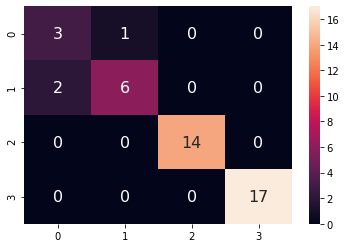

In [370]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

DTC_NSMO_NFS_ICU = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_NSMO_NFS_ICU.fit(X_ICU_NFS_class_train,y_ICU_NFS_class_train)
DTC_NSMO_NFS_ICU_ypred = DTC_NSMO_NFS_ICU.predict(X_ICU_NFS_class_test)
DTC_NSMO_NFS_ICU_confmax = confusion_matrix(y_ICU_NFS_class_test,DTC_NSMO_NFS_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_NFS_class_test, DTC_NSMO_NFS_ICU_ypred)))
print(classification_report(y_ICU_NFS_class_test,DTC_NSMO_NFS_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_NSMO_NFS_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.88
              precision    recall  f1-score   support

           2       0.75      0.75      0.75         4
           3       0.86      0.75      0.80         8
           4       0.82      1.00      0.90        14
           5       1.00      0.88      0.94        17

    accuracy                           0.88        43
   macro avg       0.86      0.85      0.85        43
weighted avg       0.89      0.88      0.88        43

Confusion matrix :


<AxesSubplot:>

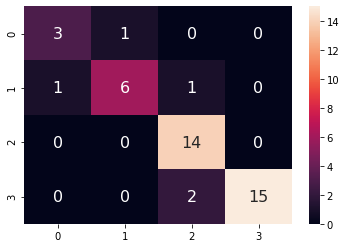

In [377]:
# Random Forest Classifier
RFC_NSMO_NFS_ICU = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_NSMO_NFS_ICU.fit(X_ICU_NFS_class_train,y_ICU_NFS_class_train)
RFC_NSMO_NFS_ICU_ypred = RFC_NSMO_NFS_ICU.predict(X_ICU_NFS_class_test)
RFC_NSMO_NFS_ICU_confmax = confusion_matrix(y_ICU_NFS_class_test,RFC_NSMO_NFS_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_NFS_class_test, RFC_NSMO_NFS_ICU_ypred)))
print(classification_report(y_ICU_NFS_class_test,RFC_NSMO_NFS_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_NSMO_NFS_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.88
              precision    recall  f1-score   support

           2       0.57      1.00      0.73         4
           3       1.00      0.50      0.67         8
           4       0.88      1.00      0.93        14
           5       1.00      0.94      0.97        17

    accuracy                           0.88        43
   macro avg       0.86      0.86      0.82        43
weighted avg       0.92      0.88      0.88        43

Confusion matrix :


<AxesSubplot:>

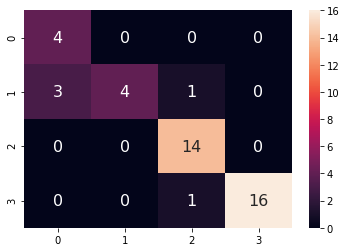

In [381]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

SVC_NSMO_NFS_ICU = SVC(kernel='linear',random_state=0)
SVC_NSMO_NFS_ICU.fit(X_ICU_NFS_class_train,y_ICU_NFS_class_train)
SVC_NSMO_NFS_ICU_ypred = SVC_NSMO_NFS_ICU.predict(X_ICU_NFS_class_test)
SVC_NSMO_NFS_ICU_confmax = confusion_matrix(y_ICU_NFS_class_test,SVC_NSMO_NFS_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_NFS_class_test, SVC_NSMO_NFS_ICU_ypred)))
print(classification_report(y_ICU_NFS_class_test,SVC_NSMO_NFS_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_NSMO_NFS_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.62      1.00      0.76         8
           4       0.86      0.86      0.86        14
           5       0.94      0.88      0.91        17

    accuracy                           0.81        43
   macro avg       0.60      0.68      0.63        43
weighted avg       0.76      0.81      0.78        43

Confusion matrix :


<AxesSubplot:>

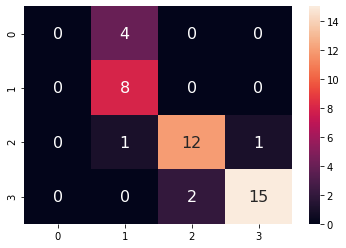

In [385]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

NB_NSMO_NFS_ICU = GaussianNB()
NB_NSMO_NFS_ICU.fit(X_ICU_NFS_class_train,y_ICU_NFS_class_train)
NB_NSMO_NFS_ICU_ypred = NB_NSMO_NFS_ICU.predict(X_ICU_NFS_class_test)
NB_NSMO_NFS_ICU_confmax = confusion_matrix(y_ICU_NFS_class_test,NB_NSMO_NFS_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_NFS_class_test, NB_NSMO_NFS_ICU_ypred)))
print(classification_report(y_ICU_NFS_class_test,NB_NSMO_NFS_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(NB_NSMO_NFS_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.86
              precision    recall  f1-score   support

           2       0.50      1.00      0.67         4
           3       0.80      0.50      0.62         8
           4       0.93      0.93      0.93        14
           5       1.00      0.94      0.97        17

    accuracy                           0.86        43
   macro avg       0.81      0.84      0.80        43
weighted avg       0.89      0.86      0.86        43

Confusion matrix :


<AxesSubplot:>

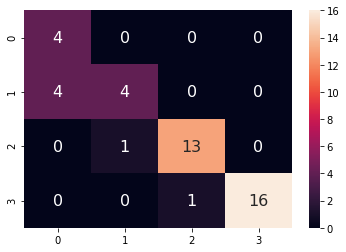

In [389]:
# KNN
KNN_NSMO_NFS_ICU = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_NSMO_NFS_ICU.fit(X_ICU_NFS_class_train,y_ICU_NFS_class_train)
KNN_NSMO_NFS_ICU_ypred = KNN_NSMO_NFS_ICU.predict(X_ICU_NFS_class_test)
KNN_NSMO_NFS_ICU_confmax = confusion_matrix(y_ICU_NFS_class_test,KNN_NSMO_NFS_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_NFS_class_test, KNN_NSMO_NFS_ICU_ypred)))
print(classification_report(y_ICU_NFS_class_test,KNN_NSMO_NFS_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_NSMO_NFS_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### B) Top 30 Feature

In [371]:
X_ICU_T30_class_train, X_ICU_T30_class_test, y_ICU_T30_class_train, y_ICU_T30_class_test = train_test_split(X_ICU_FI_30,y_ICU_class,test_size=0.25,random_state=0)

sdc = StandardScaler()

X_ICU_T30_class_train = sdc.fit_transform(X_ICU_T30_class_train)
X_ICU_T30_class_test = sdc.fit_transform(X_ICU_T30_class_test)

Accuracy = 0.81
              precision    recall  f1-score   support

           2       0.75      0.75      0.75         4
           3       0.88      0.88      0.88         8
           4       0.75      0.86      0.80        14
           5       0.87      0.76      0.81        17

    accuracy                           0.81        43
   macro avg       0.81      0.81      0.81        43
weighted avg       0.82      0.81      0.81        43

Confusion matrix :


<AxesSubplot:>

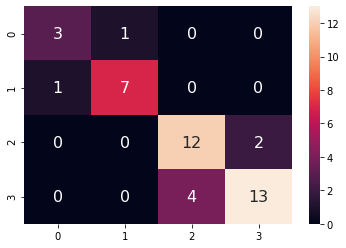

In [372]:
# Decision Tree Classifier
DTC_NSMO_T30_ICU = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_NSMO_T30_ICU.fit(X_ICU_T30_class_train,y_ICU_T30_class_train)
DTC_NSMO_T30_ICU_ypred = DTC_NSMO_T30_ICU.predict(X_ICU_T30_class_test)
DTC_NSMO_T30_ICU_confmax = confusion_matrix(y_ICU_T30_class_test,DTC_NSMO_T30_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T30_class_test, DTC_NSMO_T30_ICU_ypred)))
print(classification_report(y_ICU_T30_class_test,DTC_NSMO_T30_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_NSMO_T30_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.84
              precision    recall  f1-score   support

           2       0.60      0.75      0.67         4
           3       0.75      0.75      0.75         8
           4       0.81      0.93      0.87        14
           5       1.00      0.82      0.90        17

    accuracy                           0.84        43
   macro avg       0.79      0.81      0.80        43
weighted avg       0.86      0.84      0.84        43

Confusion matrix :


<AxesSubplot:>

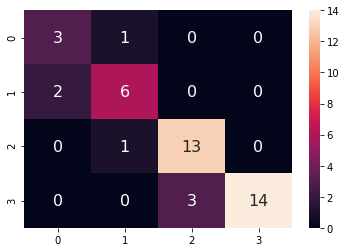

In [378]:
# Random Forest Classifier
RFC_NSMO_T30_ICU = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_NSMO_T30_ICU.fit(X_ICU_T30_class_train,y_ICU_T30_class_train)
RFC_NSMO_T30_ICU_ypred = RFC_NSMO_T30_ICU.predict(X_ICU_T30_class_test)
RFC_NSMO_T30_ICU_confmax = confusion_matrix(y_ICU_T30_class_test,RFC_NSMO_T30_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T30_class_test, RFC_NSMO_T30_ICU_ypred)))
print(classification_report(y_ICU_T30_class_test,RFC_NSMO_T30_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_NSMO_T30_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           2       0.50      0.75      0.60         4
           3       0.80      0.50      0.62         8
           4       0.78      1.00      0.88        14
           5       1.00      0.82      0.90        17

    accuracy                           0.81        43
   macro avg       0.77      0.77      0.75        43
weighted avg       0.84      0.81      0.81        43

Confusion matrix :


<AxesSubplot:>

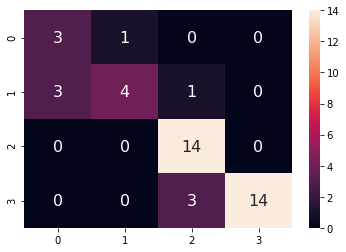

In [382]:
# Support Vector Machine
SVC_NSMO_T30_ICU = SVC(kernel='linear',random_state=0)
SVC_NSMO_T30_ICU.fit(X_ICU_T30_class_train,y_ICU_T30_class_train)
SVC_NSMO_T30_ICU_ypred = SVC_NSMO_T30_ICU.predict(X_ICU_T30_class_test)
SVC_NSMO_T30_ICU_confmax = confusion_matrix(y_ICU_T30_class_test,SVC_NSMO_T30_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T30_class_test, SVC_NSMO_T30_ICU_ypred)))
print(classification_report(y_ICU_T30_class_test,SVC_NSMO_T30_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_NSMO_T30_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.88
              precision    recall  f1-score   support

           2       0.57      1.00      0.73         4
           3       1.00      0.62      0.77         8
           4       0.93      0.93      0.93        14
           5       0.94      0.94      0.94        17

    accuracy                           0.88        43
   macro avg       0.86      0.87      0.84        43
weighted avg       0.91      0.88      0.89        43

Confusion matrix :


<AxesSubplot:>

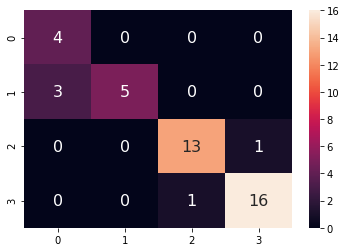

In [386]:
# Naive Bayes
NB_NSMO_T30_ICU = GaussianNB()
NB_NSMO_T30_ICU.fit(X_ICU_T30_class_train,y_ICU_T30_class_train)
NB_NSMO_T30_ICU_ypred = NB_NSMO_T30_ICU.predict(X_ICU_T30_class_test)
NB_NSMO_T30_ICU_confmax = confusion_matrix(y_ICU_T30_class_test,NB_NSMO_T30_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T30_class_test, NB_NSMO_T30_ICU_ypred)))
print(classification_report(y_ICU_T30_class_test,NB_NSMO_T30_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(NB_NSMO_T30_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           2       0.44      1.00      0.62         4
           3       1.00      0.38      0.55         8
           4       0.92      0.86      0.89        14
           5       0.89      0.94      0.91        17

    accuracy                           0.81        43
   macro avg       0.81      0.79      0.74        43
weighted avg       0.88      0.81      0.81        43

Confusion matrix :


<AxesSubplot:>

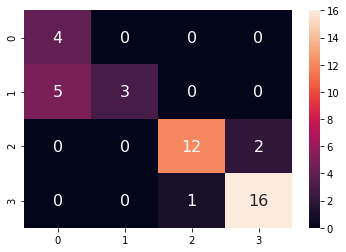

In [390]:
# KNN
KNN_NSMO_T30_ICU = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_NSMO_T30_ICU.fit(X_ICU_T30_class_train,y_ICU_T30_class_train)
KNN_NSMO_T30_ICU_ypred = KNN_NSMO_T30_ICU.predict(X_ICU_T30_class_test)
KNN_NSMO_T30_ICU_confmax = confusion_matrix(y_ICU_T30_class_test,KNN_NSMO_T30_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T30_class_test, KNN_NSMO_T30_ICU_ypred)))
print(classification_report(y_ICU_T30_class_test,KNN_NSMO_T30_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_NSMO_T30_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### C) Top 50 Feature

In [373]:
X_ICU_T50_class_train, X_ICU_T50_class_test, y_ICU_T50_class_train, y_ICU_T50_class_test = train_test_split(X_ICU_FI_50,y_ICU_class,test_size=0.25,random_state=0)

sdc = StandardScaler()

X_ICU_T50_class_train = sdc.fit_transform(X_ICU_T50_class_train)
X_ICU_T50_class_test = sdc.fit_transform(X_ICU_T50_class_test)

Accuracy = 0.81
              precision    recall  f1-score   support

           2       0.75      0.75      0.75         4
           3       0.88      0.88      0.88         8
           4       0.75      0.86      0.80        14
           5       0.87      0.76      0.81        17

    accuracy                           0.81        43
   macro avg       0.81      0.81      0.81        43
weighted avg       0.82      0.81      0.81        43

Confusion matrix :


<AxesSubplot:>

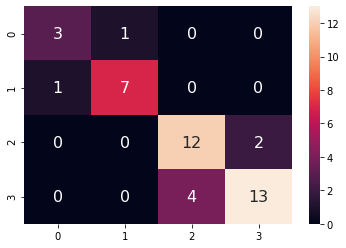

In [375]:
# Decision Tree Classifier
DTC_NSMO_T50_ICU = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_NSMO_T50_ICU.fit(X_ICU_T50_class_train,y_ICU_T50_class_train)
DTC_NSMO_T50_ICU_ypred = DTC_NSMO_T50_ICU.predict(X_ICU_T50_class_test)
DTC_NSMO_T50_ICU_confmax = confusion_matrix(y_ICU_T50_class_test,DTC_NSMO_T50_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T50_class_test, DTC_NSMO_T50_ICU_ypred)))
print(classification_report(y_ICU_T50_class_test,DTC_NSMO_T50_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_NSMO_T50_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.88
              precision    recall  f1-score   support

           2       0.67      1.00      0.80         4
           3       1.00      0.75      0.86         8
           4       0.82      1.00      0.90        14
           5       1.00      0.82      0.90        17

    accuracy                           0.88        43
   macro avg       0.87      0.89      0.87        43
weighted avg       0.91      0.88      0.89        43

Confusion matrix :


<AxesSubplot:>

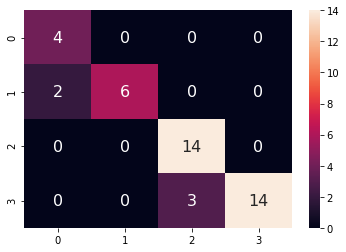

In [379]:
# Random Forest Classifier
RFC_NSMO_T50_ICU = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_NSMO_T50_ICU.fit(X_ICU_T50_class_train,y_ICU_T50_class_train)
RFC_NSMO_T50_ICU_ypred = RFC_NSMO_T50_ICU.predict(X_ICU_T50_class_test)
RFC_NSMO_T50_ICU_confmax = confusion_matrix(y_ICU_T50_class_test,RFC_NSMO_T50_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T50_class_test, RFC_NSMO_T50_ICU_ypred)))
print(classification_report(y_ICU_T50_class_test,RFC_NSMO_T50_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_NSMO_T50_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           2       0.50      0.75      0.60         4
           3       0.75      0.38      0.50         8
           4       0.78      1.00      0.88        14
           5       1.00      0.88      0.94        17

    accuracy                           0.81        43
   macro avg       0.76      0.75      0.73        43
weighted avg       0.83      0.81      0.80        43

Confusion matrix :


<AxesSubplot:>

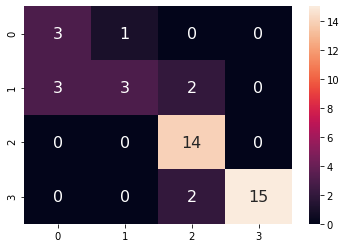

In [383]:
# Support Vector Machine
SVC_NSMO_T50_ICU = SVC(kernel='linear',random_state=0)
SVC_NSMO_T50_ICU.fit(X_ICU_T50_class_train,y_ICU_T50_class_train)
SVC_NSMO_T50_ICU_ypred = SVC_NSMO_T50_ICU.predict(X_ICU_T50_class_test)
SVC_NSMO_T50_ICU_confmax = confusion_matrix(y_ICU_T50_class_test,SVC_NSMO_T50_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T50_class_test, SVC_NSMO_T50_ICU_ypred)))
print(classification_report(y_ICU_T50_class_test,SVC_NSMO_T50_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_NSMO_T50_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.86
              precision    recall  f1-score   support

           2       0.57      1.00      0.73         4
           3       0.83      0.62      0.71         8
           4       0.92      0.86      0.89        14
           5       0.94      0.94      0.94        17

    accuracy                           0.86        43
   macro avg       0.82      0.86      0.82        43
weighted avg       0.88      0.86      0.86        43

Confusion matrix :


<AxesSubplot:>

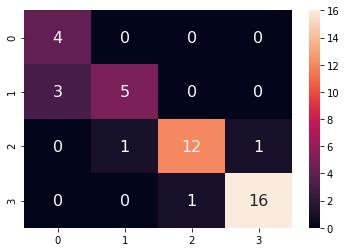

In [387]:
# Naive Bayes
NB_NSMO_T50_ICU = GaussianNB()
NB_NSMO_T50_ICU.fit(X_ICU_T50_class_train,y_ICU_T50_class_train)
NB_NSMO_T50_ICU_ypred = NB_NSMO_T50_ICU.predict(X_ICU_T50_class_test)
NB_NSMO_T50_ICU_confmax = confusion_matrix(y_ICU_T50_class_test,NB_NSMO_T50_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T50_class_test,NB_NSMO_T50_ICU_ypred)))
print(classification_report(y_ICU_T50_class_test,NB_NSMO_T50_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(NB_NSMO_T50_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.79
              precision    recall  f1-score   support

           2       0.44      1.00      0.62         4
           3       1.00      0.38      0.55         8
           4       0.86      0.86      0.86        14
           5       0.88      0.88      0.88        17

    accuracy                           0.79        43
   macro avg       0.80      0.78      0.73        43
weighted avg       0.86      0.79      0.79        43

Confusion matrix :


<AxesSubplot:>

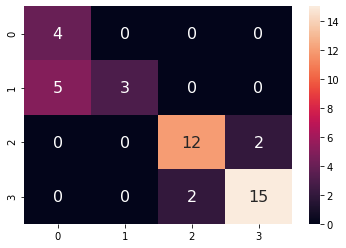

In [391]:
# KNN
KNN_NSMO_T50_ICU = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_NSMO_T50_ICU.fit(X_ICU_T50_class_train,y_ICU_T50_class_train)
KNN_NSMO_T50_ICU_ypred = KNN_NSMO_T50_ICU.predict(X_ICU_T50_class_test)
KNN_NSMO_T50_ICU_confmax = confusion_matrix(y_ICU_T50_class_test,KNN_NSMO_T50_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T50_class_test, KNN_NSMO_T50_ICU_ypred)))
print(classification_report(y_ICU_T50_class_test,KNN_NSMO_T50_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_NSMO_T50_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### D) Top 100 Feature

In [374]:
X_ICU_T100_class_train, X_ICU_T100_class_test, y_ICU_T100_class_train, y_ICU_T100_class_test = train_test_split(X_ICU_FI_100,y_ICU_class,test_size=0.25,random_state=0)

sdc = StandardScaler()

X_ICU_T100_class_train = sdc.fit_transform(X_ICU_T100_class_train)
X_ICU_T100_class_test = sdc.fit_transform(X_ICU_T100_class_test)

Accuracy = 0.91
              precision    recall  f1-score   support

           2       0.75      0.75      0.75         4
           3       0.88      0.88      0.88         8
           4       0.93      0.93      0.93        14
           5       0.94      0.94      0.94        17

    accuracy                           0.91        43
   macro avg       0.87      0.87      0.87        43
weighted avg       0.91      0.91      0.91        43

Confusion matrix :


<AxesSubplot:>

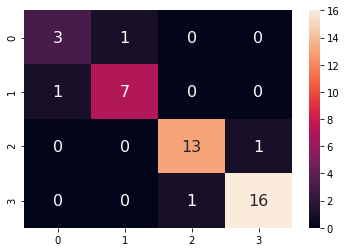

In [376]:
# Decision Tree Classifier
DTC_NSMO_T100_ICU = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_NSMO_T100_ICU.fit(X_ICU_T100_class_train,y_ICU_T100_class_train)
DTC_NSMO_T100_ICU_ypred = DTC_NSMO_T100_ICU.predict(X_ICU_T100_class_test)
DTC_NSMO_T100_ICU_confmax = confusion_matrix(y_ICU_T100_class_test,DTC_NSMO_T100_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T100_class_test, DTC_NSMO_T100_ICU_ypred)))
print(classification_report(y_ICU_T100_class_test,DTC_NSMO_T100_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_NSMO_T100_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.93
              precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           3       1.00      0.88      0.93         8
           4       0.88      1.00      0.93        14
           5       1.00      0.88      0.94        17

    accuracy                           0.93        43
   macro avg       0.92      0.94      0.92        43
weighted avg       0.94      0.93      0.93        43

Confusion matrix :


<AxesSubplot:>

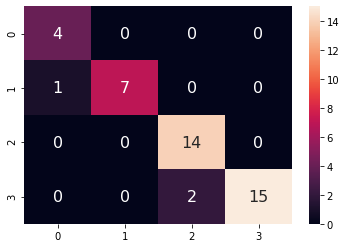

In [380]:
# Random Forest Classifier
RFC_NSMO_T100_ICU = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_NSMO_T100_ICU.fit(X_ICU_T100_class_train,y_ICU_T100_class_train)
RFC_NSMO_T100_ICU_ypred = RFC_NSMO_T100_ICU.predict(X_ICU_T100_class_test)
RFC_NSMO_T100_ICU_confmax = confusion_matrix(y_ICU_T100_class_test,RFC_NSMO_T100_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T100_class_test, RFC_NSMO_T100_ICU_ypred)))
print(classification_report(y_ICU_T100_class_test,RFC_NSMO_T100_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_NSMO_T100_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.86
              precision    recall  f1-score   support

           2       0.57      1.00      0.73         4
           3       1.00      0.50      0.67         8
           4       0.87      0.93      0.90        14
           5       0.94      0.94      0.94        17

    accuracy                           0.86        43
   macro avg       0.84      0.84      0.81        43
weighted avg       0.89      0.86      0.86        43

Confusion matrix :


<AxesSubplot:>

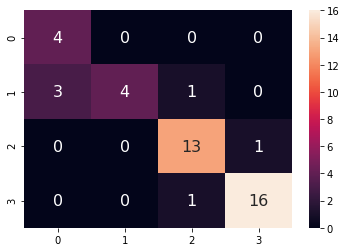

In [384]:
# Support Vector Machine
SVC_NSMO_T100_ICU = SVC(kernel='linear',random_state=0)
SVC_NSMO_T100_ICU.fit(X_ICU_T100_class_train,y_ICU_T100_class_train)
SVC_NSMO_T100_ICU_ypred = SVC_NSMO_T100_ICU.predict(X_ICU_T100_class_test)
SVC_NSMO_T100_ICU_confmax = confusion_matrix(y_ICU_T100_class_test,SVC_NSMO_T100_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T100_class_test, SVC_NSMO_T100_ICU_ypred)))
print(classification_report(y_ICU_T100_class_test,SVC_NSMO_T100_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_NSMO_T100_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.88
              precision    recall  f1-score   support

           2       0.57      1.00      0.73         4
           3       0.83      0.62      0.71         8
           4       0.93      0.93      0.93        14
           5       1.00      0.94      0.97        17

    accuracy                           0.88        43
   macro avg       0.83      0.87      0.83        43
weighted avg       0.91      0.88      0.89        43

Confusion matrix :


<AxesSubplot:>

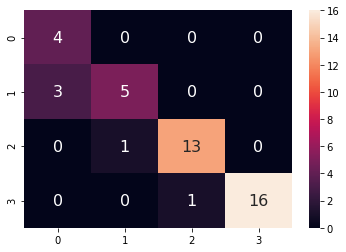

In [388]:
# Naive Bayes
NB_NSMO_T100_ICU = GaussianNB()
NB_NSMO_T100_ICU.fit(X_ICU_T100_class_train,y_ICU_T100_class_train)
NB_NSMO_T100_ICU_ypred = NB_NSMO_T100_ICU.predict(X_ICU_T100_class_test)
NB_NSMO_T100_ICU_confmax = confusion_matrix(y_ICU_T100_class_test,NB_NSMO_T100_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T100_class_test, NB_NSMO_T100_ICU_ypred)))
print(classification_report(y_ICU_T100_class_test,NB_NSMO_T100_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(NB_NSMO_T100_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.93
              precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           3       1.00      0.88      0.93         8
           4       1.00      0.86      0.92        14
           5       0.89      1.00      0.94        17

    accuracy                           0.93        43
   macro avg       0.92      0.93      0.92        43
weighted avg       0.94      0.93      0.93        43

Confusion matrix :


<AxesSubplot:>

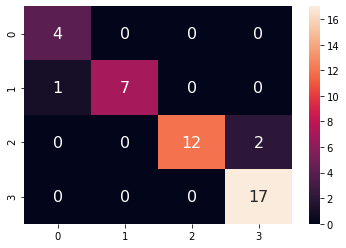

In [392]:
# KNN
KNN_NSMO_T100_ICU = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_NSMO_T100_ICU.fit(X_ICU_T100_class_train,y_ICU_T100_class_train)
KNN_NSMO_T100_ICU_ypred = KNN_NSMO_T100_ICU.predict(X_ICU_T100_class_test)
KNN_NSMO_T100_ICU_confmax = confusion_matrix(y_ICU_T100_class_test,KNN_NSMO_T100_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T100_class_test, KNN_NSMO_T100_ICU_ypred)))
print(classification_report(y_ICU_T100_class_test,KNN_NSMO_T100_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_NSMO_T100_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

### II) SMOTE

In [446]:
#Perform Over-Sampling using SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)

#### A) No Feature Selection

In [449]:
X_ICU_NFS_class_train_SMO, X_ICU_NFS_class_test_SMO, y_ICU_NFS_class_train_SMO, y_ICU_NFS_class_test_SMO = train_test_split(X_ICU_FI,y_ICU_class.ravel(),test_size=0.25,random_state=0)

col_NFS_ICU = X_ICU_NFS_class_train_SMO.columns
X_ICU_NFS_class_train_SMO_cp, y_ICU_NFS_class_train_SMO_cp = smt.fit_resample(X_ICU_NFS_class_train_SMO,y_ICU_NFS_class_train_SMO)
# X_ICU_NFS_class_train_SMO_cp = pd.DataFrame(data=X_ICU_NFS_class_train_SMO_cp, columns=col_NFS_ICU)
# y_ICU_NFS_class_train_SMO_cp = pd.DataFrame(data=y_ICU_NFS_class_train_SMO_cp, columns=['icu_sev'])
# y_ICU_NFS_class_train_SMO_cp['icu_sev'].value_counts()

Accuracy = 0.95
              precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           3       0.88      0.88      0.88         8
           4       1.00      0.93      0.96        14
           5       1.00      1.00      1.00        17

    accuracy                           0.95        43
   macro avg       0.92      0.95      0.93        43
weighted avg       0.96      0.95      0.95        43

Confusion matrix :


<AxesSubplot:>

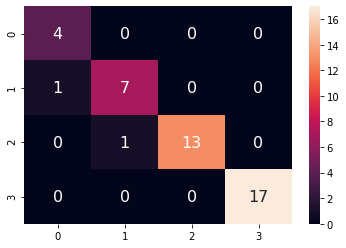

In [450]:
# Decision Tree Classifier
DTC_SMOTE_NFS_ICU = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_SMOTE_NFS_ICU.fit(X_ICU_NFS_class_train_SMO_cp,y_ICU_NFS_class_train_SMO_cp)
DTC_SMOTE_NFS_ICU_ypred = DTC_SMOTE_NFS_ICU.predict(X_ICU_NFS_class_test_SMO)
DTC_SMOTE_NFS_ICU_confmax = confusion_matrix(y_ICU_NFS_class_test_SMO,DTC_SMOTE_NFS_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_NFS_class_test_SMO, DTC_SMOTE_NFS_ICU_ypred)))
print(classification_report(y_ICU_NFS_class_test_SMO,DTC_SMOTE_NFS_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_SMOTE_NFS_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.88
              precision    recall  f1-score   support

           2       0.67      1.00      0.80         4
           3       1.00      0.75      0.86         8
           4       0.82      1.00      0.90        14
           5       1.00      0.82      0.90        17

    accuracy                           0.88        43
   macro avg       0.87      0.89      0.87        43
weighted avg       0.91      0.88      0.89        43

Confusion matrix :


<AxesSubplot:>

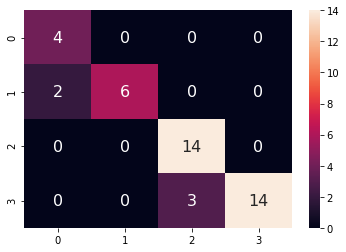

In [462]:
# Random Forest Classifier
RFC_SMOTE_NFS_ICU = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_SMOTE_NFS_ICU.fit(X_ICU_NFS_class_train_SMO_cp,y_ICU_NFS_class_train_SMO_cp)
RFC_SMOTE_NFS_ICU_ypred = RFC_SMOTE_NFS_ICU.predict(X_ICU_NFS_class_test_SMO)
RFC_SMOTE_NFS_ICU_confmax = confusion_matrix(y_ICU_NFS_class_test_SMO,RFC_SMOTE_NFS_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_NFS_class_test_SMO, RFC_SMOTE_NFS_ICU_ypred)))
print(classification_report(y_ICU_NFS_class_test_SMO,RFC_SMOTE_NFS_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_SMOTE_NFS_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           2       0.38      0.75      0.50         4
           3       0.75      0.38      0.50         8
           4       1.00      0.86      0.92        14
           5       0.89      1.00      0.94        17

    accuracy                           0.81        43
   macro avg       0.75      0.75      0.72        43
weighted avg       0.85      0.81      0.81        43

Confusion matrix :


<AxesSubplot:>

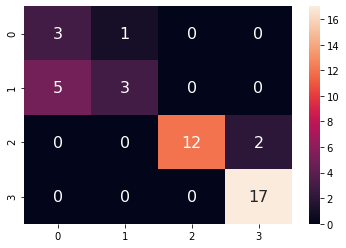

In [470]:
# Support Vector Machine
SVC_SMOTE_NFS_ICU = SVC(kernel='linear',random_state=0)
SVC_SMOTE_NFS_ICU.fit(X_ICU_NFS_class_train_SMO_cp,y_ICU_NFS_class_train_SMO_cp)
SVC_SMOTE_NFS_ICU_ypred = SVC_SMOTE_NFS_ICU.predict(X_ICU_NFS_class_test_SMO)
SVC_SMOTE_NFS_ICU_confmax = confusion_matrix(y_ICU_NFS_class_test_SMO,SVC_SMOTE_NFS_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_NFS_class_test_SMO, SVC_SMOTE_NFS_ICU_ypred)))
print(classification_report(y_ICU_NFS_class_test_SMO,SVC_SMOTE_NFS_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_SMOTE_NFS_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           2       0.67      1.00      0.80         4
           3       0.83      0.62      0.71         8
           4       0.75      0.86      0.80        14
           5       0.93      0.82      0.87        17

    accuracy                           0.81        43
   macro avg       0.80      0.83      0.80        43
weighted avg       0.83      0.81      0.81        43

Confusion matrix :


<AxesSubplot:>

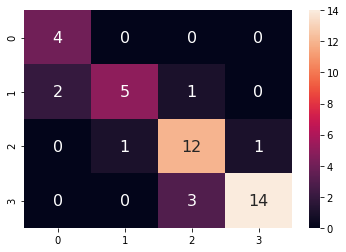

In [478]:
# Naive Bayes
NB_SMOTE_NFS_ICU = GaussianNB()
NB_SMOTE_NFS_ICU.fit(X_ICU_NFS_class_train_SMO_cp,y_ICU_NFS_class_train_SMO_cp)
NB_SMOTE_NFS_ICU_ypred = NB_SMOTE_NFS_ICU.predict(X_ICU_NFS_class_test_SMO)
NB_SMOTE_NFS_ICU_confmax = confusion_matrix(y_ICU_NFS_class_test_SMO,NB_SMOTE_NFS_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_NFS_class_test_SMO, NB_SMOTE_NFS_ICU_ypred)))
print(classification_report(y_ICU_NFS_class_test_SMO,NB_SMOTE_NFS_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(NB_SMOTE_NFS_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.84
              precision    recall  f1-score   support

           2       0.50      1.00      0.67         4
           3       0.83      0.62      0.71         8
           4       1.00      0.71      0.83        14
           5       0.89      1.00      0.94        17

    accuracy                           0.84        43
   macro avg       0.81      0.83      0.79        43
weighted avg       0.88      0.84      0.84        43

Confusion matrix :


<AxesSubplot:>

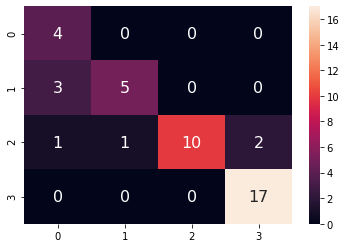

In [486]:
# KNN
KNN_SMOTE_NFS_ICU = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_SMOTE_NFS_ICU.fit(X_ICU_NFS_class_train_SMO_cp,y_ICU_NFS_class_train_SMO_cp)
KNN_SMOTE_NFS_ICU_ypred = KNN_SMOTE_NFS_ICU.predict(X_ICU_NFS_class_test_SMO)
KNN_SMOTE_NFS_ICU_confmax = confusion_matrix(y_ICU_NFS_class_test_SMO,KNN_SMOTE_NFS_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_NFS_class_test_SMO, KNN_SMOTE_NFS_ICU_ypred)))
print(classification_report(y_ICU_NFS_class_test_SMO,KNN_SMOTE_NFS_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_SMOTE_NFS_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### B) Top 30 Feature

In [452]:
X_ICU_T30_class_train_SMO, X_ICU_T30_class_test_SMO, y_ICU_T30_class_train_SMO, y_ICU_T30_class_test_SMO = train_test_split(X_ICU_FI_30,y_ICU_class.ravel(),test_size=0.25,random_state=0)

col_T30_ICU = X_ICU_T30_class_train_SMO.columns
X_ICU_T30_class_train_SMO_cp, y_ICU_T30_class_train_SMO_cp = smt.fit_resample(X_ICU_T30_class_train_SMO,y_ICU_T30_class_train_SMO)

Accuracy = 0.81
              precision    recall  f1-score   support

           2       0.67      1.00      0.80         4
           3       1.00      0.62      0.77         8
           4       0.75      0.86      0.80        14
           5       0.88      0.82      0.85        17

    accuracy                           0.81        43
   macro avg       0.82      0.83      0.80        43
weighted avg       0.84      0.81      0.81        43

Confusion matrix :


<AxesSubplot:>

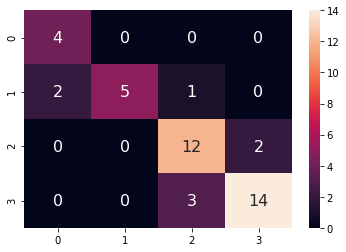

In [455]:
# Decision Tree Classifier
DTC_SMOTE_T30_ICU = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_SMOTE_T30_ICU.fit(X_ICU_T30_class_train_SMO_cp,y_ICU_T30_class_train_SMO_cp)
DTC_SMOTE_T30_ICU_ypred = DTC_SMOTE_T30_ICU.predict(X_ICU_T30_class_test_SMO)
DTC_SMOTE_T30_ICU_confmax = confusion_matrix(y_ICU_T30_class_test_SMO,DTC_SMOTE_T30_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T30_class_test_SMO, DTC_SMOTE_T30_ICU_ypred)))
print(classification_report(y_ICU_T30_class_test_SMO,DTC_SMOTE_T30_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_SMOTE_T30_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.86
              precision    recall  f1-score   support

           2       0.67      1.00      0.80         4
           3       0.86      0.75      0.80         8
           4       0.86      0.86      0.86        14
           5       0.94      0.88      0.91        17

    accuracy                           0.86        43
   macro avg       0.83      0.87      0.84        43
weighted avg       0.87      0.86      0.86        43

Confusion matrix :


<AxesSubplot:>

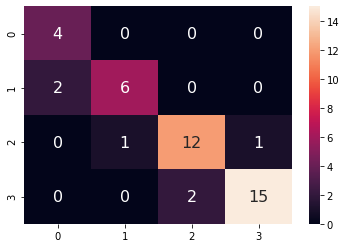

In [463]:
# Random Forest Classifier
RFC_SMOTE_T30_ICU = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_SMOTE_T30_ICU.fit(X_ICU_T30_class_train_SMO_cp,y_ICU_T30_class_train_SMO_cp)
RFC_SMOTE_T30_ICU_ypred = RFC_SMOTE_T30_ICU.predict(X_ICU_T30_class_test_SMO)
RFC_SMOTE_T30_ICU_confmax = confusion_matrix(y_ICU_T30_class_test_SMO,RFC_SMOTE_T30_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T30_class_test_SMO, RFC_SMOTE_T30_ICU_ypred)))
print(classification_report(y_ICU_T30_class_test_SMO,RFC_SMOTE_T30_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_SMOTE_T30_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           2       0.57      1.00      0.73         4
           3       0.71      0.62      0.67         8
           4       0.80      0.86      0.83        14
           5       1.00      0.82      0.90        17

    accuracy                           0.81        43
   macro avg       0.77      0.83      0.78        43
weighted avg       0.84      0.81      0.82        43

Confusion matrix :


<AxesSubplot:>

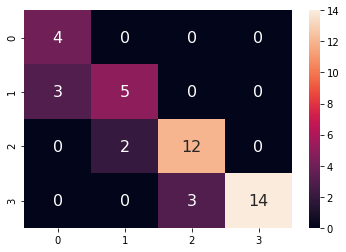

In [471]:
# Support Vector Machine
SVC_SMOTE_T30_ICU = SVC(kernel='linear',random_state=0)
SVC_SMOTE_T30_ICU.fit(X_ICU_T30_class_train_SMO_cp,y_ICU_T30_class_train_SMO_cp)
SVC_SMOTE_T30_ICU_ypred = SVC_SMOTE_T30_ICU.predict(X_ICU_T30_class_test_SMO)
SVC_SMOTE_T30_ICU_confmax = confusion_matrix(y_ICU_T30_class_test_SMO,SVC_SMOTE_T30_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T30_class_test_SMO, SVC_SMOTE_T30_ICU_ypred)))
print(classification_report(y_ICU_T30_class_test_SMO,SVC_SMOTE_T30_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_SMOTE_T30_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.84
              precision    recall  f1-score   support

           2       0.44      1.00      0.62         4
           3       1.00      0.38      0.55         8
           4       0.93      0.93      0.93        14
           5       0.94      0.94      0.94        17

    accuracy                           0.84        43
   macro avg       0.83      0.81      0.76        43
weighted avg       0.90      0.84      0.83        43

Confusion matrix :


<AxesSubplot:>

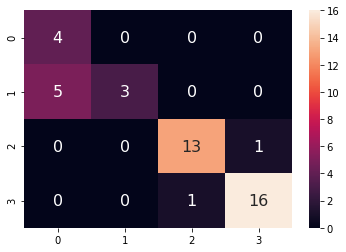

In [479]:
# Naive Bayes
NB_SMOTE_T30_ICU = GaussianNB()
NB_SMOTE_T30_ICU.fit(X_ICU_T30_class_train_SMO_cp,y_ICU_T30_class_train_SMO_cp)
NB_SMOTE_T30_ICU_ypred = NB_SMOTE_T30_ICU.predict(X_ICU_T30_class_test_SMO)
NB_SMOTE_T30_ICU_confmax = confusion_matrix(y_ICU_T30_class_test_SMO,NB_SMOTE_T30_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T30_class_test_SMO, NB_SMOTE_T30_ICU_ypred)))
print(classification_report(y_ICU_T30_class_test_SMO,NB_SMOTE_T30_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(NB_SMOTE_T30_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.63
              precision    recall  f1-score   support

           2       0.33      1.00      0.50         4
           3       0.50      0.12      0.20         8
           4       0.62      0.57      0.59        14
           5       0.88      0.82      0.85        17

    accuracy                           0.63        43
   macro avg       0.58      0.63      0.54        43
weighted avg       0.67      0.63      0.61        43

Confusion matrix :


<AxesSubplot:>

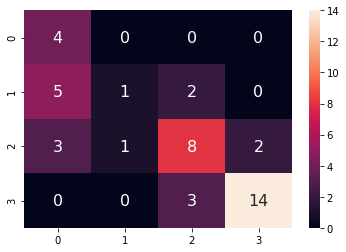

In [487]:
# KNN
KNN_SMOTE_T30_ICU = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_SMOTE_T30_ICU.fit(X_ICU_T30_class_train_SMO_cp,y_ICU_T30_class_train_SMO_cp)
KNN_SMOTE_T30_ICU_ypred = KNN_SMOTE_T30_ICU.predict(X_ICU_T30_class_test_SMO)
KNN_SMOTE_T30_ICU_confmax = confusion_matrix(y_ICU_T30_class_test_SMO,KNN_SMOTE_T30_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T30_class_test_SMO, KNN_SMOTE_T30_ICU_ypred)))
print(classification_report(y_ICU_T30_class_test_SMO,KNN_SMOTE_T30_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_SMOTE_T30_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### C) Top 50 Feature

In [453]:
X_ICU_T50_class_train_SMO, X_ICU_T50_class_test_SMO, y_ICU_T50_class_train_SMO, y_ICU_T50_class_test_SMO = train_test_split(X_ICU_FI_50,y_ICU_class.ravel(),test_size=0.25,random_state=0)

col_T50_ICU = X_ICU_T50_class_train_SMO.columns
X_ICU_T50_class_train_SMO_cp, y_ICU_T50_class_train_SMO_cp = smt.fit_resample(X_ICU_T50_class_train_SMO,y_ICU_T50_class_train_SMO)

Accuracy = 0.84
              precision    recall  f1-score   support

           2       0.67      1.00      0.80         4
           3       1.00      0.75      0.86         8
           4       0.76      0.93      0.84        14
           5       0.93      0.76      0.84        17

    accuracy                           0.84        43
   macro avg       0.84      0.86      0.83        43
weighted avg       0.86      0.84      0.84        43

Confusion matrix :


<AxesSubplot:>

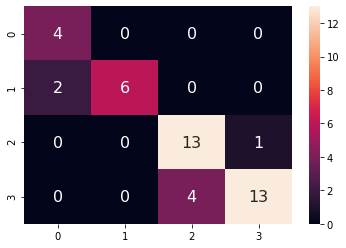

In [456]:
# Decision Tree Classifier
DTC_SMOTE_T50_ICU = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_SMOTE_T50_ICU.fit(X_ICU_T50_class_train_SMO_cp,y_ICU_T50_class_train_SMO_cp)
DTC_SMOTE_T50_ICU_ypred = DTC_SMOTE_T50_ICU.predict(X_ICU_T50_class_test_SMO)
DTC_SMOTE_T50_ICU_confmax = confusion_matrix(y_ICU_T50_class_test_SMO,DTC_SMOTE_T50_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T50_class_test_SMO, DTC_SMOTE_T50_ICU_ypred)))
print(classification_report(y_ICU_T50_class_test_SMO,DTC_SMOTE_T50_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_SMOTE_T50_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.86
              precision    recall  f1-score   support

           2       0.67      1.00      0.80         4
           3       1.00      0.75      0.86         8
           4       0.81      0.93      0.87        14
           5       0.93      0.82      0.87        17

    accuracy                           0.86        43
   macro avg       0.85      0.88      0.85        43
weighted avg       0.88      0.86      0.86        43

Confusion matrix :


<AxesSubplot:>

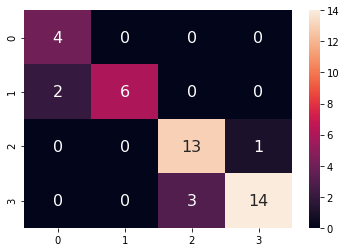

In [464]:
# Random Forest Classifier
RFC_SMOTE_T50_ICU = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_SMOTE_T50_ICU.fit(X_ICU_T50_class_train_SMO_cp,y_ICU_T50_class_train_SMO_cp)
RFC_SMOTE_T50_ICU_ypred = RFC_SMOTE_T50_ICU.predict(X_ICU_T50_class_test_SMO)
RFC_SMOTE_T50_ICU_confmax = confusion_matrix(y_ICU_T50_class_test_SMO,RFC_SMOTE_T50_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T50_class_test_SMO, RFC_SMOTE_T50_ICU_ypred)))
print(classification_report(y_ICU_T50_class_test_SMO,RFC_SMOTE_T50_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_SMOTE_T50_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.84
              precision    recall  f1-score   support

           2       0.33      0.50      0.40         4
           3       0.78      0.88      0.82         8
           4       1.00      0.71      0.83        14
           5       0.94      1.00      0.97        17

    accuracy                           0.84        43
   macro avg       0.76      0.77      0.76        43
weighted avg       0.87      0.84      0.85        43

Confusion matrix :


<AxesSubplot:>

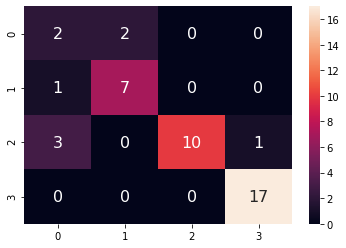

In [472]:
# Support Vector Machine
SVC_SMOTE_T50_ICU = SVC(kernel='linear',random_state=0)
SVC_SMOTE_T50_ICU.fit(X_ICU_T50_class_train_SMO_cp,y_ICU_T50_class_train_SMO_cp)
SVC_SMOTE_T50_ICU_ypred = SVC_SMOTE_T50_ICU.predict(X_ICU_T50_class_test_SMO)
SVC_SMOTE_T50_ICU_confmax = confusion_matrix(y_ICU_T50_class_test_SMO,SVC_SMOTE_T50_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T50_class_test_SMO, SVC_SMOTE_T50_ICU_ypred)))
print(classification_report(y_ICU_T50_class_test_SMO,SVC_SMOTE_T50_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_SMOTE_T50_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           2       0.44      1.00      0.62         4
           3       1.00      0.38      0.55         8
           4       0.92      0.86      0.89        14
           5       0.89      0.94      0.91        17

    accuracy                           0.81        43
   macro avg       0.81      0.79      0.74        43
weighted avg       0.88      0.81      0.81        43

Confusion matrix :


<AxesSubplot:>

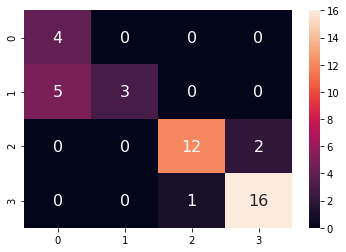

In [480]:
# Naive Bayes
NB_SMOTE_T50_ICU = GaussianNB()
NB_SMOTE_T50_ICU.fit(X_ICU_T50_class_train_SMO_cp,y_ICU_T50_class_train_SMO_cp)
NB_SMOTE_T50_ICU_ypred = NB_SMOTE_T50_ICU.predict(X_ICU_T50_class_test_SMO)
NB_SMOTE_T50_ICU_confmax = confusion_matrix(y_ICU_T50_class_test_SMO,NB_SMOTE_T50_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T50_class_test_SMO, NB_SMOTE_T50_ICU_ypred)))
print(classification_report(y_ICU_T50_class_test_SMO,NB_SMOTE_T50_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(NB_SMOTE_T50_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.79
              precision    recall  f1-score   support

           2       0.40      1.00      0.57         4
           3       1.00      0.50      0.67         8
           4       0.91      0.71      0.80        14
           5       0.89      0.94      0.91        17

    accuracy                           0.79        43
   macro avg       0.80      0.79      0.74        43
weighted avg       0.87      0.79      0.80        43

Confusion matrix :


<AxesSubplot:>

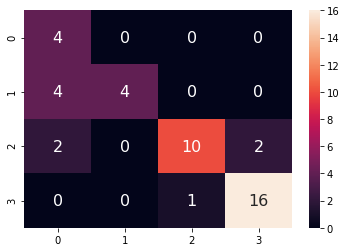

In [488]:
# KNN
KNN_SMOTE_T50_ICU = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_SMOTE_T50_ICU.fit(X_ICU_T50_class_train_SMO_cp,y_ICU_T50_class_train_SMO_cp)
KNN_SMOTE_T50_ICU_ypred = KNN_SMOTE_T50_ICU.predict(X_ICU_T50_class_test_SMO)
KNN_SMOTE_T50_ICU_confmax = confusion_matrix(y_ICU_T50_class_test_SMO,KNN_SMOTE_T50_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T50_class_test_SMO, KNN_SMOTE_T50_ICU_ypred)))
print(classification_report(y_ICU_T50_class_test_SMO,KNN_SMOTE_T50_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_SMOTE_T50_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

#### D) Top 100 Feature

In [454]:
X_ICU_T100_class_train_SMO, X_ICU_T100_class_test_SMO, y_ICU_T100_class_train_SMO, y_ICU_T100_class_test_SMO = train_test_split(X_ICU_FI_100,y_ICU_class.ravel(),test_size=0.25,random_state=0)

col_T100_ICU = X_ICU_T100_class_train_SMO.columns
X_ICU_T100_class_train_SMO_cp, y_ICU_T100_class_train_SMO_cp = smt.fit_resample(X_ICU_T100_class_train_SMO,y_ICU_T100_class_train_SMO)

Accuracy = 0.88
              precision    recall  f1-score   support

           2       0.67      1.00      0.80         4
           3       0.86      0.75      0.80         8
           4       0.87      0.93      0.90        14
           5       1.00      0.88      0.94        17

    accuracy                           0.88        43
   macro avg       0.85      0.89      0.86        43
weighted avg       0.90      0.88      0.89        43

Confusion matrix :


<AxesSubplot:>

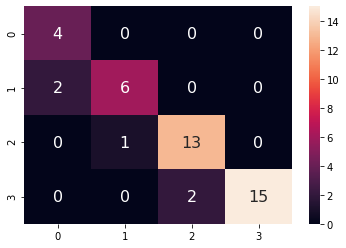

In [457]:
# Decision Tree Classifier
DTC_SMOTE_T100_ICU = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_SMOTE_T100_ICU.fit(X_ICU_T100_class_train_SMO_cp,y_ICU_T100_class_train_SMO_cp)
DTC_SMOTE_T100_ICU_ypred = DTC_SMOTE_T100_ICU.predict(X_ICU_T100_class_test_SMO)
DTC_SMOTE_T100_ICU_confmax = confusion_matrix(y_ICU_T100_class_test_SMO,DTC_SMOTE_T100_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T100_class_test_SMO, DTC_SMOTE_T100_ICU_ypred)))
print(classification_report(y_ICU_T100_class_test_SMO,DTC_SMOTE_T100_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(DTC_SMOTE_T100_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.88
              precision    recall  f1-score   support

           2       0.57      1.00      0.73         4
           3       0.83      0.62      0.71         8
           4       0.93      0.93      0.93        14
           5       1.00      0.94      0.97        17

    accuracy                           0.88        43
   macro avg       0.83      0.87      0.83        43
weighted avg       0.91      0.88      0.89        43

Confusion matrix :


<AxesSubplot:>

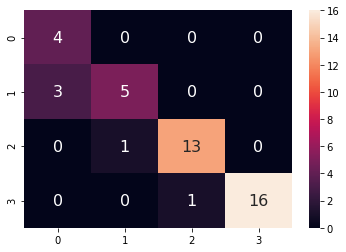

In [465]:
# Random Forest Classifier
RFC_SMOTE_T100_ICU = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_SMOTE_T100_ICU.fit(X_ICU_T100_class_train_SMO_cp,y_ICU_T100_class_train_SMO_cp)
RFC_SMOTE_T100_ICU_ypred = RFC_SMOTE_T100_ICU.predict(X_ICU_T100_class_test_SMO)
RFC_SMOTE_T100_ICU_confmax = confusion_matrix(y_ICU_T100_class_test_SMO,RFC_SMOTE_T100_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T100_class_test_SMO, RFC_SMOTE_T100_ICU_ypred)))
print(classification_report(y_ICU_T100_class_test_SMO,RFC_SMOTE_T100_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(RFC_SMOTE_T100_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.93
              precision    recall  f1-score   support

           2       0.75      0.75      0.75         4
           3       0.88      0.88      0.88         8
           4       1.00      0.93      0.96        14
           5       0.94      1.00      0.97        17

    accuracy                           0.93        43
   macro avg       0.89      0.89      0.89        43
weighted avg       0.93      0.93      0.93        43

Confusion matrix :


<AxesSubplot:>

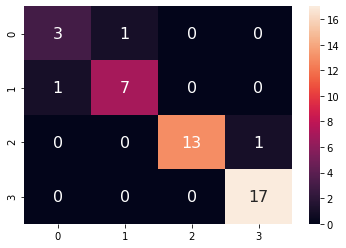

In [473]:
# Support Vector Machine
SVC_SMOTE_T100_ICU = SVC(kernel='linear',random_state=0)
SVC_SMOTE_T100_ICU.fit(X_ICU_T100_class_train_SMO_cp,y_ICU_T100_class_train_SMO_cp)
SVC_SMOTE_T100_ICU_ypred = SVC_SMOTE_T100_ICU.predict(X_ICU_T100_class_test_SMO)
SVC_SMOTE_T100_ICU_confmax = confusion_matrix(y_ICU_T100_class_test_SMO,SVC_SMOTE_T100_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T100_class_test_SMO, SVC_SMOTE_T100_ICU_ypred)))
print(classification_report(y_ICU_T100_class_test_SMO,SVC_SMOTE_T100_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(SVC_SMOTE_T100_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.84
              precision    recall  f1-score   support

           2       0.50      1.00      0.67         4
           3       0.80      0.50      0.62         8
           4       0.92      0.86      0.89        14
           5       0.94      0.94      0.94        17

    accuracy                           0.84        43
   macro avg       0.79      0.82      0.78        43
weighted avg       0.87      0.84      0.84        43

Confusion matrix :


<AxesSubplot:>

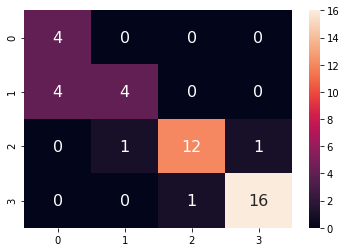

In [481]:
# Naive Bayes
NB_SMOTE_T100_ICU = GaussianNB()
NB_SMOTE_T100_ICU.fit(X_ICU_T100_class_train_SMO_cp,y_ICU_T100_class_train_SMO_cp)
NB_SMOTE_T100_ICU_ypred = NB_SMOTE_T100_ICU.predict(X_ICU_T100_class_test_SMO)
NB_SMOTE_T100_ICU_confmax = confusion_matrix(y_ICU_T100_class_test_SMO,NB_SMOTE_T100_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T100_class_test_SMO, NB_SMOTE_T100_ICU_ypred)))
print(classification_report(y_ICU_T100_class_test_SMO,NB_SMOTE_T100_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(NB_SMOTE_T100_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

Accuracy = 0.81
              precision    recall  f1-score   support

           2       0.44      1.00      0.62         4
           3       1.00      0.62      0.77         8
           4       0.85      0.79      0.81        14
           5       0.94      0.88      0.91        17

    accuracy                           0.81        43
   macro avg       0.81      0.82      0.78        43
weighted avg       0.87      0.81      0.83        43

Confusion matrix :


<AxesSubplot:>

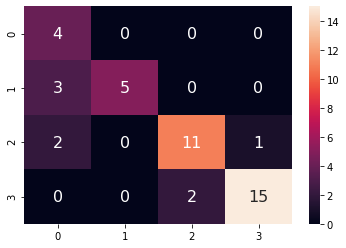

In [489]:
# KNN
KNN_SMOTE_T100_ICU = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_SMOTE_T100_ICU.fit(X_ICU_T100_class_train_SMO_cp,y_ICU_T100_class_train_SMO_cp)
KNN_SMOTE_T100_ICU_ypred = KNN_SMOTE_T100_ICU.predict(X_ICU_T100_class_test_SMO)
KNN_SMOTE_T100_ICU_confmax = confusion_matrix(y_ICU_T100_class_test_SMO,KNN_SMOTE_T100_ICU_ypred)

print('Accuracy = {:.2f}'. format(accuracy_score(y_ICU_T100_class_test_SMO, KNN_SMOTE_T100_ICU_ypred)))
print(classification_report(y_ICU_T100_class_test_SMO,KNN_SMOTE_T100_ICU_ypred))
print("Confusion matrix :")
sns.heatmap(KNN_SMOTE_T100_ICU_confmax,annot=True,annot_kws={"size":16},fmt="d")

# Clustering

### 1. Cases_new vs admitted cases in each state

#### A) KMeans

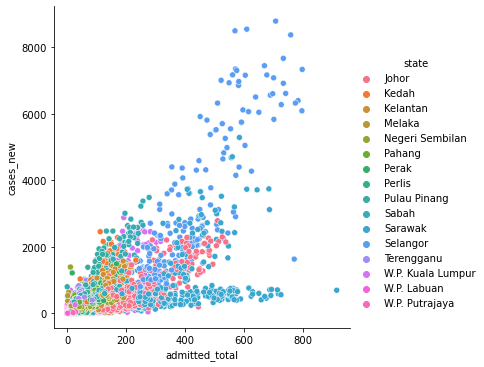

In [675]:
cases_new_hospital = df_cases_state.merge(df_hosp,left_on=['date','state'],right_on=['date','state'],how='left')
cases_new_hospital['date'] = pd.to_datetime(cases_new_hospital['date'],errors='coerce')

cases_new_hospital = cases_new_hospital[cases_new_hospital['date'] >= '2020-03-24']

#Check the last one, if date no yet update then just ignore first
cases_new_hospital = cases_new_hospital[cases_new_hospital['date'] < '2021-10-24']
cases_new_hospital = cases_new_hospital.dropna()

sns.relplot(x='admitted_total',y='cases_new',hue='state',data=cases_new_hospital)

In [676]:
X = cases_new_hospital.drop(['state','date'],axis=1)
y = cases_new_hospital['state']

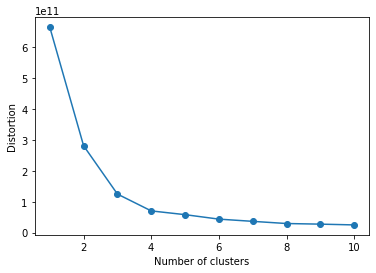

In [677]:
distortions = []
for i in range(1,11):
    km = KMeans(
        n_clusters=i,init='random',
        n_init=10,max_iter=300,
        tol=1e-04,random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

#plot
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

<AxesSubplot:xlabel='admitted_total', ylabel='cases_new'>

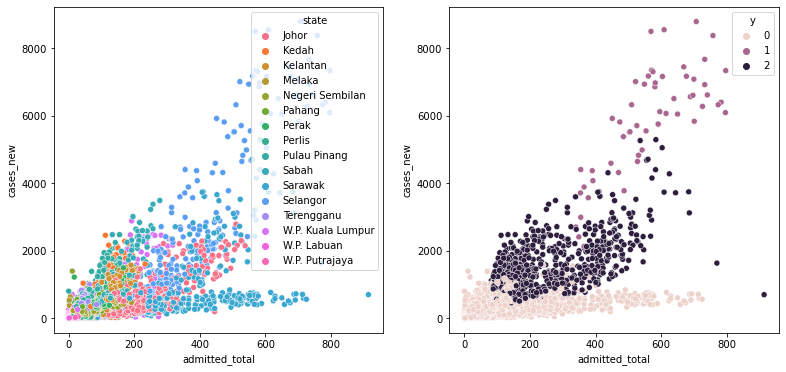

In [678]:
km = KMeans(n_clusters=3,random_state=1)
km.fit(X)
cases_new_hospital_new = cases_new_hospital.copy()
#df_checkinS_new = df_checkinS_new.drop('state',axis=1)
cases_new_hospital_new['y'] = km.labels_

fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x='admitted_total',y="cases_new",hue="state",data=cases_new_hospital,ax=axes[0])
sns.scatterplot(x='admitted_total',y="cases_new",hue="y",data=cases_new_hospital_new,ax=axes[1])

In [679]:
cases_new_hospital_new.tail(5)

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid,y
10203,2021-10-23,Selangor,1039,2,1367,14523,13.0,50.0,691.0,184.0,59.0,713.0,71.0,5902.0,1450.0,5629.0,185.0,114.0,299.0,130.0,159.0,289.0,603.0,401.0,2458.0,2
10204,2021-10-23,Terengganu,398,0,731,3781,0.0,43.0,246.0,87.0,23.0,231.0,54.0,1557.0,491.0,1500.0,15.0,70.0,85.0,12.0,23.0,35.0,229.0,33.0,883.0,0
10205,2021-10-23,W.P. Kuala Lumpur,252,2,276,3526,2.0,8.0,185.0,40.0,9.0,178.0,25.0,3963.0,653.0,3843.0,1.0,26.0,27.0,5.0,22.0,27.0,213.0,59.0,1385.0,0
10206,2021-10-23,W.P. Labuan,3,0,0,39,0.0,0.0,3.0,0.0,0.0,2.0,1.0,122.0,12.0,110.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,63.0,0
10207,2021-10-23,W.P. Putrajaya,20,0,16,438,1.0,1.0,13.0,5.0,0.0,14.0,1.0,609.0,84.0,585.0,20.0,0.0,20.0,33.0,2.0,35.0,5.0,20.0,305.0,0


#### B) DBSCAN

<AxesSubplot:xlabel='admitted_total', ylabel='cases_new'>

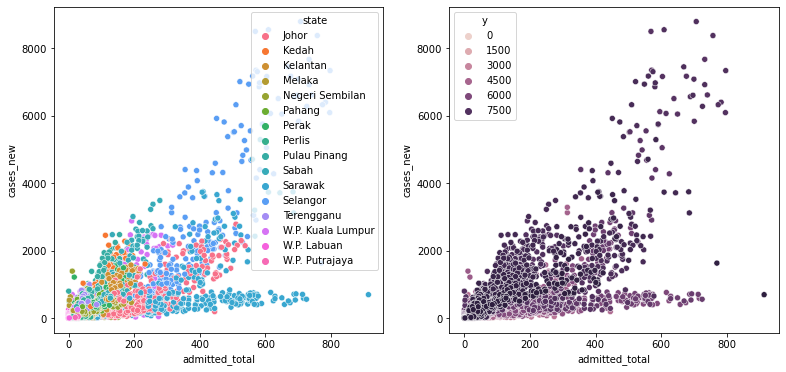

In [680]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.01,min_samples=1).fit(X)

cases_new_hospital_new['y'] = db.labels_

fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x='admitted_total',y="cases_new",hue="state",data=cases_new_hospital,ax=axes[0])
sns.scatterplot(x='admitted_total',y="cases_new",hue="y",data=cases_new_hospital_new,ax=axes[1])

#### C) Agglomerative Clustering

<AxesSubplot:xlabel='admitted_total', ylabel='cases_new'>

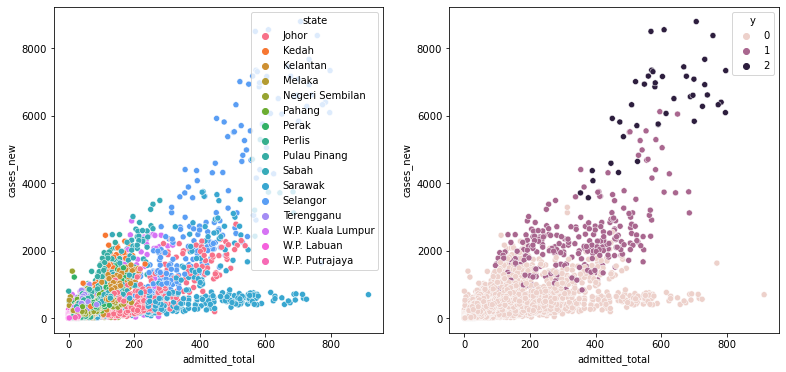

In [681]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(X)
df_checkinS_new = df_checkinS.copy()
#df_checkinS_new = df_checkinS_new.drop('state',axis=1)
cases_new_hospital_new['y'] = cluster.labels_

fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x='admitted_total',y="cases_new",hue="state",data=cases_new_hospital,ax=axes[0])
sns.scatterplot(x='admitted_total',y="cases_new",hue="y",data=cases_new_hospital_new,ax=axes[1])

### 2. cases_new vs death_new in each state

#### A) KMeans

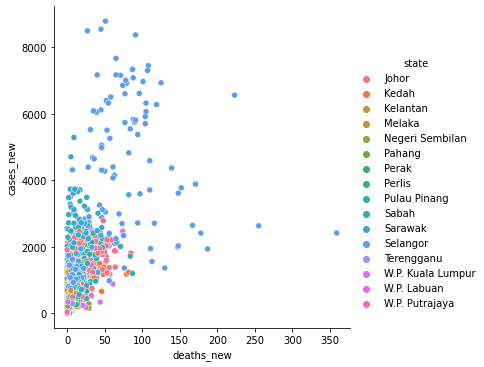

In [682]:
state_cases_death = state_cases.copy()
state_cases_death['date'] = pd.to_datetime(state_cases_death['date'],errors='coerce')

sns.relplot(x='deaths_new',y='cases_new',hue='state',data=state_cases_death)

In [683]:
X = state_cases_death.drop(['state','date','year_month','year','month'],axis=1)
y = state_cases_death['state']

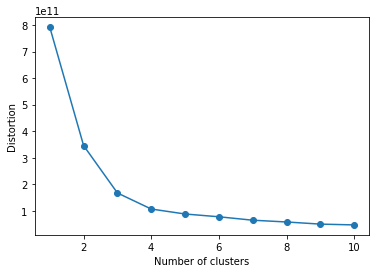

In [684]:
distortions = []
for i in range(1,11):
    km = KMeans(
        n_clusters=i,init='random',
        n_init=10,max_iter=300,
        tol=1e-04,random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

#plot
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

<AxesSubplot:xlabel='deaths_new', ylabel='cases_new'>

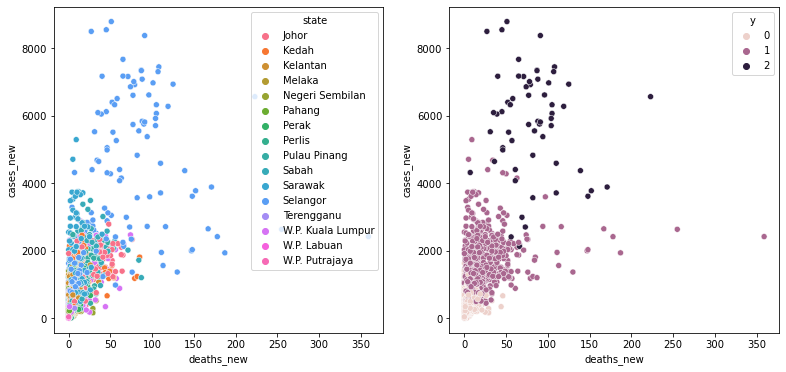

In [685]:
km = KMeans(n_clusters=3,random_state=1)
km.fit(X)
state_cases_death_new = state_cases_death.copy()
#df_checkinS_new = df_checkinS_new.drop('state',axis=1)
state_cases_death_new['y'] = km.labels_

fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x='deaths_new',y="cases_new",hue="state",data=state_cases_death,ax=axes[0])
sns.scatterplot(x='deaths_new',y="cases_new",hue="y",data=state_cases_death_new,ax=axes[1])

#### B) DBSCAN

<AxesSubplot:xlabel='deaths_new', ylabel='cases_new'>

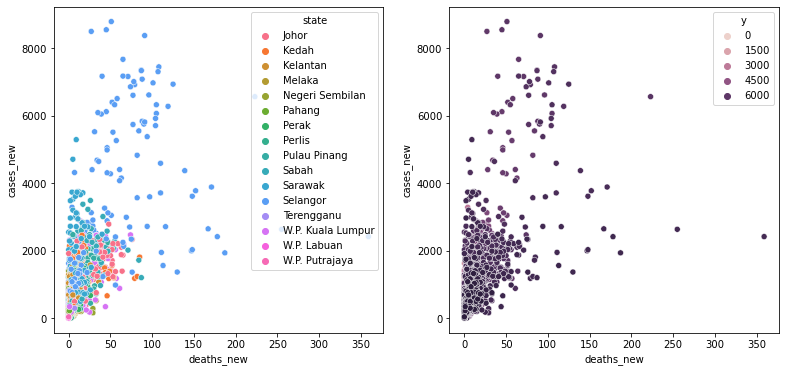

In [686]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.01,min_samples=1).fit(X)

state_cases_death_new['y'] = db.labels_

fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x='deaths_new',y="cases_new",hue="state",data=state_cases_death,ax=axes[0])
sns.scatterplot(x='deaths_new',y="cases_new",hue="y",data=state_cases_death_new,ax=axes[1])

#### C) Agglomerative Clustering

<AxesSubplot:xlabel='deaths_new', ylabel='cases_new'>

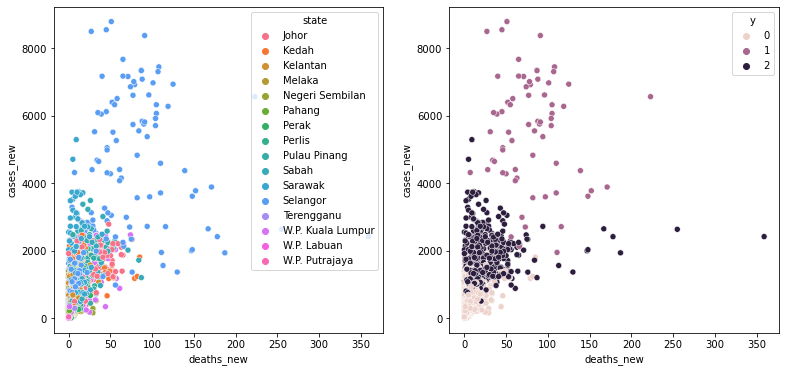

In [687]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(X)
df_checkinS_new = df_checkinS.copy()
#df_checkinS_new = df_checkinS_new.drop('state',axis=1)
state_cases_death_new['y'] = cluster.labels_

fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x='deaths_new',y="cases_new",hue="state",data=state_cases_death,ax=axes[0])
sns.scatterplot(x='deaths_new',y="cases_new",hue="y",data=state_cases_death_new,ax=axes[1])

End of content.
Prepared by Chang Kai Boon (1181101282) and Soe Zhao Hong (1181101614).

Link to Heroku : https://bukancovidnowdua.herokuapp.com/